In [258]:
import pandas as pd
import numpy as np
import json
from google.cloud import storage
from google.oauth2 import service_account
from google.cloud import bigquery
import pandas as pd

credentials = service_account.Credentials.from_service_account_info(json.load(open('gsc_creds.json','r')))
client = bigquery.Client(credentials = credentials)

In [ ]:
def url_impression_and_clicks(start_date,end_date,domain_num,client):
    QUERY = f"""
    SELECT url, SUM(impressions) AS Imp, SUM(clicks) AS Clk
    FROM `leafgroup-gsc-integration.searchconsole_{domain_num}.searchdata_url_impression`
    WHERE data_date BETWEEN '{start_date}' AND '{start_date}'
    GROUP BY url"""
    query_job = client.query(QUERY,location='US')
    result = query_job.result()
    df = result.to_dataframe()
    df['url'] = df['url'].str.replace("https://","")
    return df

def topic_overlapping(df):
    df = pd.DataFrame(df.groupby(["topic","domain"]).agg({'url':'count','Imp':'mean','Clk':'mean'}).reset_index())
    df = df.rename(columns={'url':'Count'})
    return df

def topic_distribution_within_domain(df, domain):
    df = topic_overlapping(df)
    df.fillna(0, inplace=True)
    topic_len = len(list(df[df['domain'] == domain]['topic']))
    df_topic = df[df['domain'] == domain].sort_values(by = 'Count',ascending=False)[0:min(topic_len,10)]
    # Create a figure and axis
    fig, ax1 = plt.subplots()

    # Scatter plot on the primary y-axis
    ax1.scatter(df_topic['topic'], df_topic['Clk'], color='blue', label='Click Mean')
    ax1.plot(df_topic['topic'], df_topic['Clk'], linestyle='-', color='blue')

    ax2 = ax1.twinx()
    ax2.bar(df_topic['topic'], df_topic['Count'], alpha=0.5, color='red', label='Count')

    # Set labels and title
    ax1.set_xlabel(domain)
    ax1.set_xticklabels(df_topic['topic'], rotation=90, ha='right')
    ax1.set_ylabel('Clicks Avg')
    ax2.set_ylabel('Count')

    # Show legends
    ax1.legend(loc='upper right')
    ax2.legend(loc='upper left')
    fig.set_figheight(9)
    fig.set_figwidth(15)
    # Show the plot
    plt.show()
    
    return df_topic
    
def domain_distribution_within_topic(df,topic):
    df = topic_overlapping(df)
    df.fillna(0, inplace=True)
    df_domain = df[df['topic'] == topic].sort_values(by = 'Count',ascending=False)[0:20]
    # Create a figure and axis
    fig, ax1 = plt.subplots()

    # Scatter plot on the primary y-axis
    ax1.scatter(df_domain['domain'], df_domain['Clk'], color='blue', label='Click Mean')
    ax1.plot(df_domain['domain'], df_domain['Clk'], linestyle='-', color='blue')

    ax2 = ax1.twinx()
    ax2.bar(df_domain['domain'], df_domain['Count'], alpha=0.5, color='red', label='Count')

    # Set labels and title
    ax1.set_xlabel(topic)
    ax1.set_xticklabels(df_domain['domain'], rotation=90, ha='right')
    ax1.set_ylabel('Clicks Avg')
    ax2.set_ylabel('Count')

    # Show legends
    ax1.legend(loc='upper right')
    ax2.legend(loc='upper left')
    fig.set_figheight(9)
    fig.set_figwidth(15)
    # Show the plot
    plt.show()
    return df_domain

In [238]:
domain_dict = {
    # 'work.chron.com': 1490001,
    # 'livehealthy.chron.com': 1700001,
    # 'smallbusiness.chron.com': 1250001,
    # 'homeguides.sfgate.com': 1210001,
    # 'healthyeating.sfgate.com': 1480001,
    'animals.mom.com': 1850001,
    'bizfluent.com': 1860048,
    'careertrend.com': 1860041,
    'classroom.synonym.com': 1640001,
    'dogcare.dailypuppy.com': 520001,
    'healthfully.com': 1860047,
    'homesteady.com': 1860049,
    'howtoadult.com': 1860033,
    'itstillworks.com': 1860039,
    'itstillruns.com': 1860042,
    'www.gardenguides.com': 330001,
    'goneoutdoors.com': 1860037,
    'legalbeagle.com': 1860031,
    'www.leaf.tv': 1860006,
    'oureverydaylife.com': 1860022,
    'ourpastimes.com': 1860032,
    'penandthepad.com': 1860034,
    'pocketsense.com': 1860046,
    'www.sapling.com': 1860028,
    'sciencing.com': 1860035,
    'www.sportsrec.com': 1860056,
    'www.theclassroom.com': 1860058,
    'www.techwalla.com': 1860005,
    'traveltips.usatoday.com': 1280001,
    'finance.zacks.com': 1530001,
    'www.ehow.com': 180001,
    'www.ehow.co.uk': 170001,
    'www.cuteness.com': 1860001,
    'www.hellomotherhood.com': 1860062,
    'www.lawforfamilies.com': 1860066,
    'budgeting.thenest.com': 1180001,
    'pets.thenest.com': 1520001,
    'woman.thenest.com': 1500001,
    'healthyliving.azcentral.com': 1470001,
    'yourbusiness.azcentral.com': 1510001,
    'getawaytips.azcentral.com': 1600001,
    'getaway.10best.com': 1860043
}

# Basic Statistics

In [259]:
df = pd.read_csv("all_domain_topic_traffic.csv")
df = df.drop('Unnamed: 0', axis=1)
df.head(10)

url  \
0  animals.mom.com/new-hamster-used-being-held-10...   
1  animals.mom.com/life-span-teddy-bear-hamster-1...   
2     animals.mom.com/symptoms-horse-colic-1007.html   
3  animals.mom.com/should-change-hamster-shavings...   
4  animals.mom.com/list-everything-dwarf-hamster-...   
5  animals.mom.com/can-feed-hamster-run-out-hamst...   
6  animals.mom.com/give-teddy-bear-hamster-bath-1...   
7  animals.mom.com/make-aquarium-gerbil-cage-1012...   
8  animals.mom.com/can-keep-pet-bunnies-inside-ho...   
9  animals.mom.com/make-hamster-smell-better-1014...   

                                               title           domain   topic  \
0        How to Get a New Hamster Used to Being Held  animals.mom.com  animal   
1                  Life Span of a Teddy Bear Hamster  animals.mom.com  animal   
2                            Symptoms of Horse Colic  animals.mom.com  animal   
3      How Often Should You Change Hamster Shavings?  animals.mom.com  animal   
4       A List of Everything a Dwarf Hamster Can Eat  animals.mom.com  animal   
5  What Can You Feed a Hamster if You Run Out of ...  animals.mom.com  animal   
6            How to Give a Teddy Bear Hamster a Bath  animals.mom.com  animal   
7         How to Make an Aquarium into a Gerbil Cage  animals.mom.com  animal   
8         Can You Keep Pet Bunnies Inside Your Home?  animals.mom.com  animal   
9              How to Make Your Hamster Smell Better  animals.mom.com  animal   

      Imp   Clk  
0    72.0   1.0  
1   463.0   3.0  
2    31.0   0.0  
3   201.0   0.0  
4  1468.0  30.0  
5   417.0   2.0  
6    49.0   1.0  
7    65.0   2.0  
8    23.0   0.0  
9   169.0   4.0

In [240]:
df['domain'].value_counts()

www.ehow.com                   37151
traveltips.usatoday.com        27730
oureverydaylife.com            19978
homesteady.com                 17811
classroom.synonym.com          17643
www.gardenguides.com           17487
bizfluent.com                  16917
healthfully.com                16177
itstillworks.com               16078
sciencing.com                  15672
www.ehow.co.uk                 15219
itstillruns.com                14999
www.techwalla.com              14562
careertrend.com                12077
www.leaf.tv                    11929
ourpastimes.com                 9977
pocketsense.com                 9939
animals.mom.com                 9900
woman.thenest.com               9299
www.sapling.com                 9035
legalbeagle.com                 8792
yourbusiness.azcentral.com      7066
budgeting.thenest.com           6934
www.cuteness.com                6898
www.sportsrec.com               6149
pets.thenest.com                6089
www.theclassroom.com            5656
f

## Breakdown by topic only

In [287]:
df_group_by_topic =df.groupby(['topic']).agg({'Imp': ['sum','mean'], 'Clk':['sum','mean'],'url':'count'}).sort_values(by = [(   'Imp',   'sum')],ascending=False).reset_index()
df_group_by_topic[0:20]

topic        Imp                   Clk  \
                                            sum        mean       sum   
0                   plant and garden  6666768.0  111.374530  103351.0   
1                             animal  4893644.0  187.920740   58659.0   
2                            finance  2589338.0   71.180636   54941.0   
3                    food for health  1979196.0   74.336000   31888.0   
4                             travel  1676000.0   55.594255   17611.0   
5                            science  1541709.0  446.096354   16584.0   
6        children baby and pregnancy  1398821.0   97.539990   25825.0   
7    technology,software and science  1209585.0  123.338942   29619.0   
8                                law  1150874.0   69.864263   31880.0   
9                              sport  1060672.0   80.992059   22463.0   
10                            career  1055116.0   50.583249   23209.0   
11                            school  1043406.0  140.886578   23293.0   
12                          exercise   887866.0   67.513193   15555.0   
13              symptom and solution   476212.0   62.193026    9650.0   
14                  home improvement   475103.0   69.929791    9612.0   
15                               tax   219041.0   47.288644    3754.0   
16  technology, software and science   214267.0   63.580712    3723.0   
17                       mathematics   207020.0  420.772358    3614.0   
18                 fashion and style   187150.0  106.638177    3035.0   
19                        automotive   136074.0   68.793731    3196.0   

                url  
        mean  count  
0   1.726574  62058  
1   2.252563  32926  
2   1.510322  44312  
3   1.197671  29383  
4   0.584171  32708  
5   4.798611   3523  
6   1.800781  15400  
7   3.020190  10479  
8   1.935288  19084  
9   1.715257  14033  
10  1.112661  24884  
11  3.145153   7763  
12  1.182800  17141  
13  1.260285  10008  
14  1.414778   6953  
15  0.810449   5993  
16  1.104748   3993  
17  7.345528    495  
18  1.729345   1824  
19  1.615774   2088

Top 10 topics rated by Impression sum is 'plant and garden', 'animal', 'finance', 'food for health', 'travel', 'science', 'children baby and pregnancy', 'technology,software and science', 'law', 'sport'. We have quite a lot of content related to 'plant and garden' and 'animal'.

1. Plant and Garden:  
    1.1 Impressions: 6,666,768  
    1.2 Clicks: 103,351  
    1.3 CTR: 1.55%  
2. Animal:  
    2.1 Impressions: 4,893,644  
    2.2 Clicks: 58,659  
    2.3 CTR: 1.20%  
3. Finance:  
    3.1 Impressions: 2,589,338  
    3.2 Clicks: 54,941  
    3.3 CTR: 2.12%  

## Breakdown by topic and domain

In [294]:
df_topic_check = df.groupby(['topic','domain']).agg({'Imp': ['sum','mean'], 'Clk':['sum','mean'],'url':'count'}).sort_values(by = [(   'Imp',   'sum')],ascending=False).reset_index()
df_topic_check[0:30]

topic                   domain        Imp  \
                                                                    sum   
0                  plant and garden            sciencing.com  2506260.0   
1                  plant and garden             www.ehow.com  2176954.0   
2                            animal          animals.mom.com  1875690.0   
3                           science            sciencing.com  1508562.0   
4                            animal            sciencing.com  1464925.0   
5                  plant and garden     www.gardenguides.com  1009894.0   
6                            travel  traveltips.usatoday.com   989035.0   
7   technology,software and science        www.techwalla.com   909800.0   
8                   food for health             www.ehow.com   811068.0   
9                            animal         www.cuteness.com   801429.0   
10                          finance        www.techwalla.com   594956.0   
11                            sport        www.sportsrec.com   479927.0   
12                          finance            sciencing.com   418110.0   
13                              law          legalbeagle.com   409957.0   
14                  food for health              www.leaf.tv   408213.0   
15                          finance          www.sapling.com   367862.0   
16                 home improvement             www.ehow.com   364513.0   
17      children baby and pregnancy             www.ehow.com   346976.0   
18                           animal         pets.thenest.com   340019.0   
19                           school    classroom.synonym.com   325452.0   
20                          finance            bizfluent.com   294999.0   
21                  food for health      oureverydaylife.com   293506.0   
22                           career          careertrend.com   254300.0   
23                           school     www.theclassroom.com   233503.0   
24                           school            sciencing.com   228881.0   
25                          finance          pocketsense.com   220035.0   
26                           career            bizfluent.com   216363.0   
27                         exercise        www.sportsrec.com   209178.0   
28                      mathematics            sciencing.com   195319.0   
29      children baby and pregnancy            sciencing.com   186769.0   

                    Clk               url  
          mean      sum       mean  count  
0   565.109357  24702.0   5.569786   4466  
1   140.730105  38276.0   2.474368  15815  
2   207.648622  25581.0   2.831950   9067  
3   491.388274  16143.0   5.258306   3096  
4   669.833105  13046.0   5.965249   2210  
5    62.578634  20940.0   1.297559  16802  
6    45.293781   7016.0   0.321304  23314  
7   176.181255  23979.0   4.643493   5316  
8   130.041366  14480.0   2.321629   6747  
9   174.679381   8591.0   1.872493   6317  
10  173.103288  14861.0   4.323829   3587  
11  156.685276   8737.0   2.852432   3475  
12  570.409277   8992.0  12.267394    738  
13   72.124736  11880.0   2.090077   6764  
14   87.825516   6323.0   1.360370   4901  
15   75.288989   8532.0   1.746214   5850  
16  136.164737   7225.0   2.698917   2709  
17  170.336770   4703.0   2.308787   2077  
18   67.237295   4954.0   0.979632   5324  
19  118.131397   8281.0   3.005808   2871  
20   50.853129   7024.0   1.210826   7984  
21   45.483651   3673.0   0.569193   7016  
22   31.847214   4049.0   0.507076   8872  
23  120.860766   5522.0   2.858178   2033  
24  292.686701   3790.0   4.846547    792  
25   41.344419   2992.0   0.562195   6539  
26   53.996257   5557.0   1.386823   5431  
27  130.410224   2642.0   1.647132   2445  
28  472.927361   3351.0   8.113801    414  
29  255.148907   2658.0   3.631148    734

There is definitely problem with finance topic labeling. Fixing later. Here is break down of which domains perform the best within which topic.

# Performance Analysis

## Metrics to look at

1. Impressions and Clicks by Topic: Understanding which topics currently generate the most impressions and clicks can offer insight into user interest and engagement.

2. Click-Through Rate (CTR) by Topic: The ratio of clicks to impressions for each topic will show which topics have higher engagement relative to visibility.

3. Potential Growth Opportunities: Identifying topics with high impressions but relatively low clicks might suggest areas for improvement in content or layout to increase user engagement.

4. Comparative Analysis with Competitors: This would require additional data about competitors' performance in similar topics.

### Impressions and Clicks by Topic

Refer to **Basic Statistics**
1. Plant and Garden: Highest in both impressions (6,666,768) and clicks (103,351).  
2. Animal: Second in impressions (4,893,644) and clicks (58,659).  
3. Finance: Third in impressions (2,589,338) and clicks (54,941).

### Click-Through Rate (CTR) by Topic

In [302]:
df_group_by_topic['CTR'] = df_group_by_topic[(   'Clk',   'sum')]/df_group_by_topic[(   'Imp',   'sum')]
df_group_by_topic[df_group_by_topic['topic'].isin(set(list(df_group_by_topic['topic'])[0:20]))].sort_values(by = ['CTR',(   'Imp',   'sum')],ascending=[False,True])[0:30]

topic        Imp                   Clk  \
                                            sum        mean       sum   
8                                law  1150874.0   69.864263   31880.0   
7    technology,software and science  1209585.0  123.338942   29619.0   
19                        automotive   136074.0   68.793731    3196.0   
11                            school  1043406.0  140.886578   23293.0   
10                            career  1055116.0   50.583249   23209.0   
2                            finance  2589338.0   71.180636   54941.0   
9                              sport  1060672.0   80.992059   22463.0   
13              symptom and solution   476212.0   62.193026    9650.0   
14                  home improvement   475103.0   69.929791    9612.0   
6        children baby and pregnancy  1398821.0   97.539990   25825.0   
12                          exercise   887866.0   67.513193   15555.0   
17                       mathematics   207020.0  420.772358    3614.0   
16  technology, software and science   214267.0   63.580712    3723.0   
15                               tax   219041.0   47.288644    3754.0   
18                 fashion and style   187150.0  106.638177    3035.0   
3                    food for health  1979196.0   74.336000   31888.0   
0                   plant and garden  6666768.0  111.374530  103351.0   
1                             animal  4893644.0  187.920740   58659.0   
5                            science  1541709.0  446.096354   16584.0   
4                             travel  1676000.0   55.594255   17611.0   

                url       CTR  
        mean  count            
8   1.935288  19084  0.027701  
7   3.020190  10479  0.024487  
19  1.615774   2088  0.023487  
11  3.145153   7763  0.022324  
10  1.112661  24884  0.021997  
2   1.510322  44312  0.021218  
9   1.715257  14033  0.021178  
13  1.260285  10008  0.020264  
14  1.414778   6953  0.020231  
6   1.800781  15400  0.018462  
12  1.182800  17141  0.017520  
17  7.345528    495  0.017457  
16  1.104748   3993  0.017376  
15  0.810449   5993  0.017138  
18  1.729345   1824  0.016217  
3   1.197671  29383  0.016112  
0   1.726574  62058  0.015502  
1   2.252563  32926  0.011987  
5   4.798611   3523  0.010757  
4   0.584171  32708  0.010508

1. The CTR for different topics varies, indicating the effectiveness of the content in engaging users who see it.
2. The overall average CTR across all topics is about 2.30%.
3. Topics like 'Plant and Garden','travel', 'animal' and etc have a moderate CTR of 1.55% to 1.05%, which is significant given the high volume of impressions and clicks.

### Potential Growth Opportunities

1. Topics with high impressions but lower clicks (like "Travel" or "Food for Health") could be optimized for better engagement. This could involve enhancing the content quality, layout, or something else.
2. Topics with high CTR but lower impressions could indicate niche areas that are very engaging to a specific audience. Increasing visibility in these areas might be a good way to do it. For example, we can try to do it for 'Plant and Garden'. However, we have like 60,000+ urls tagged as a website, we might consider drop some of the content using takedown report? Or we can break down the site into two or three sites for a better content concentration.

### Comparative Analysis with Competitors

## Visualization

/var/folders/kl/d2c3nvkj5kxbxwd0q65sgs1r0000gp/T/ipykernel_1805/2491425948.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_topic['topic'], rotation=90, ha='right')


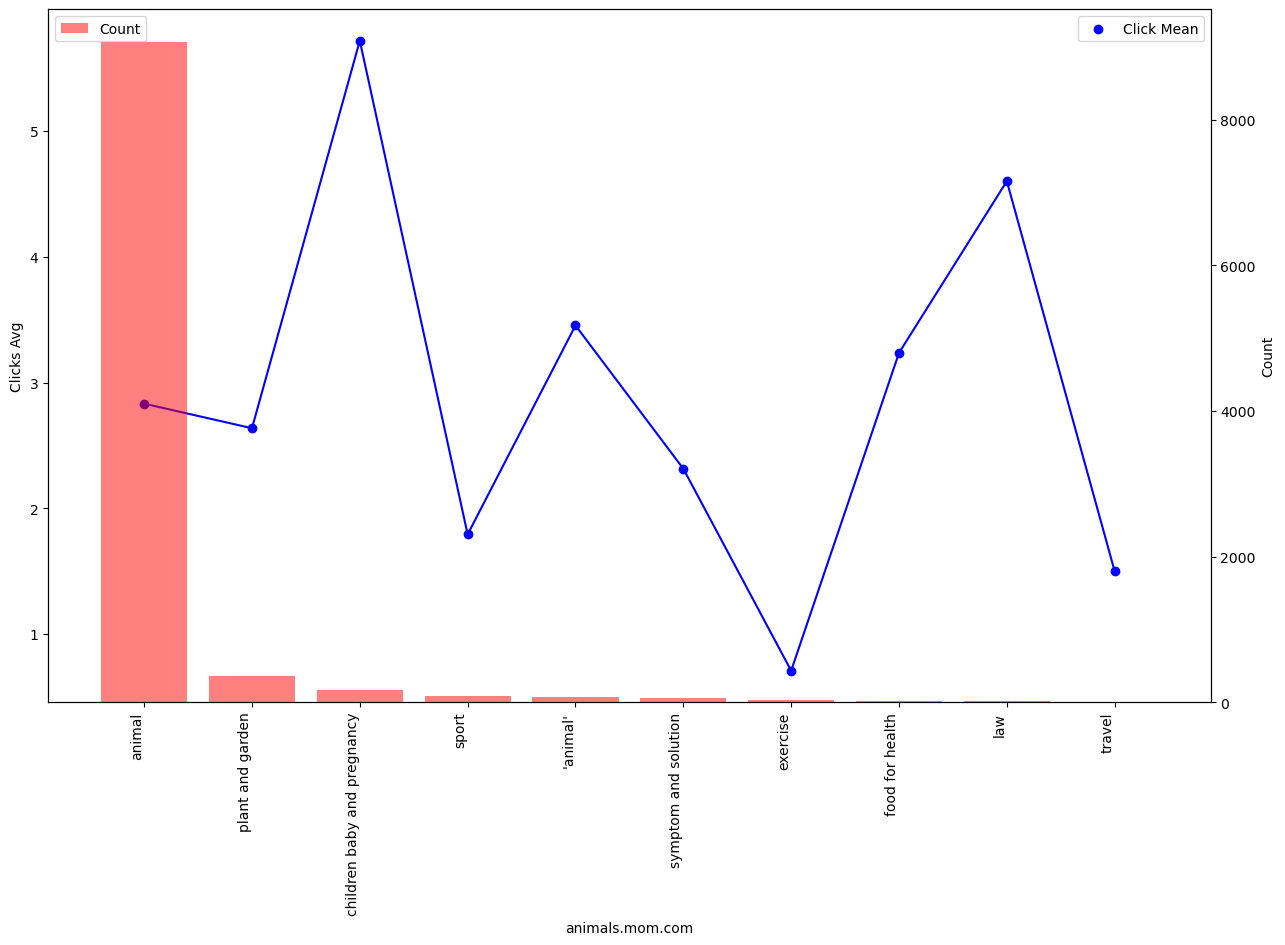

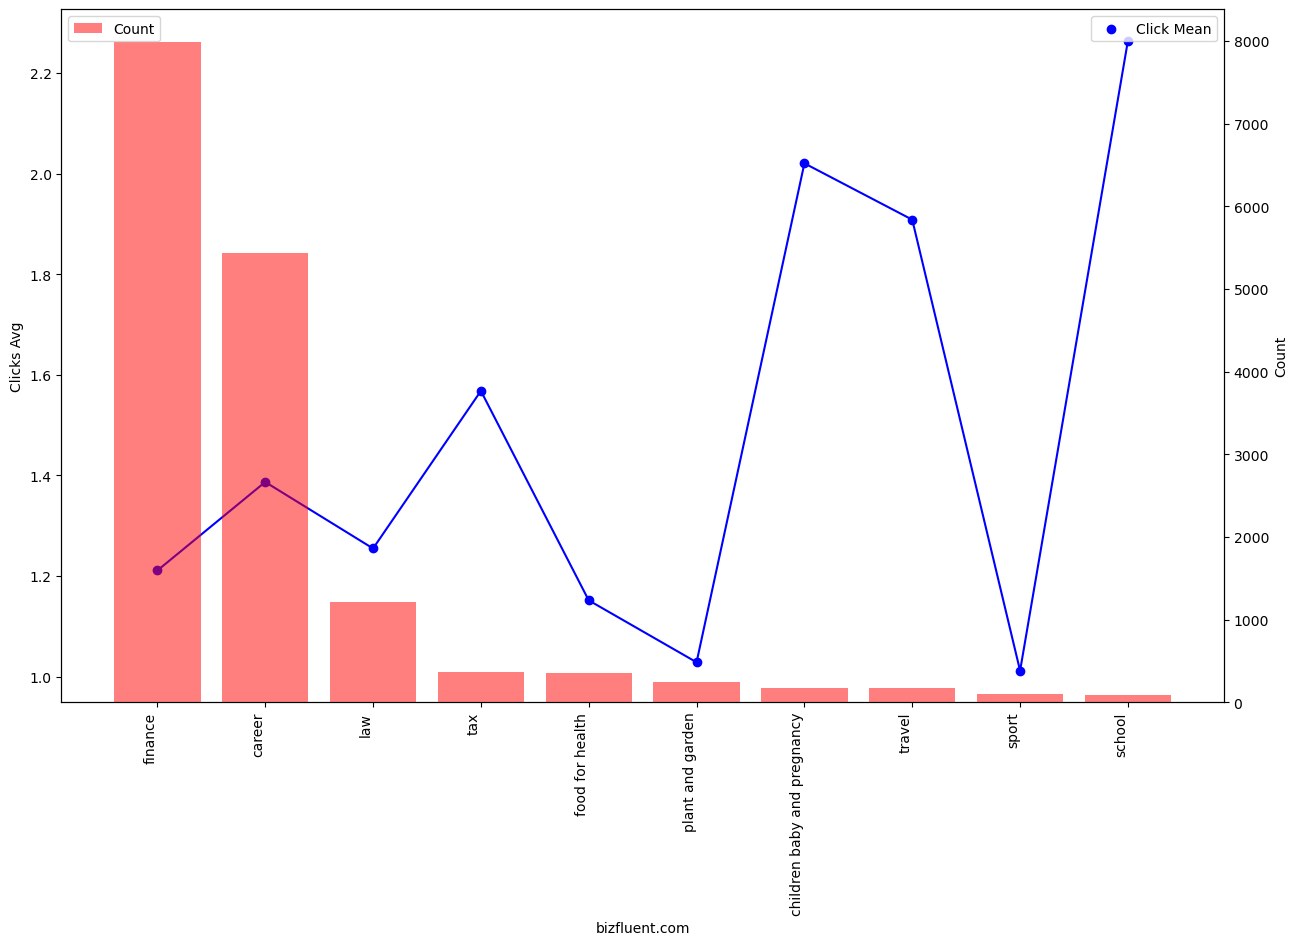

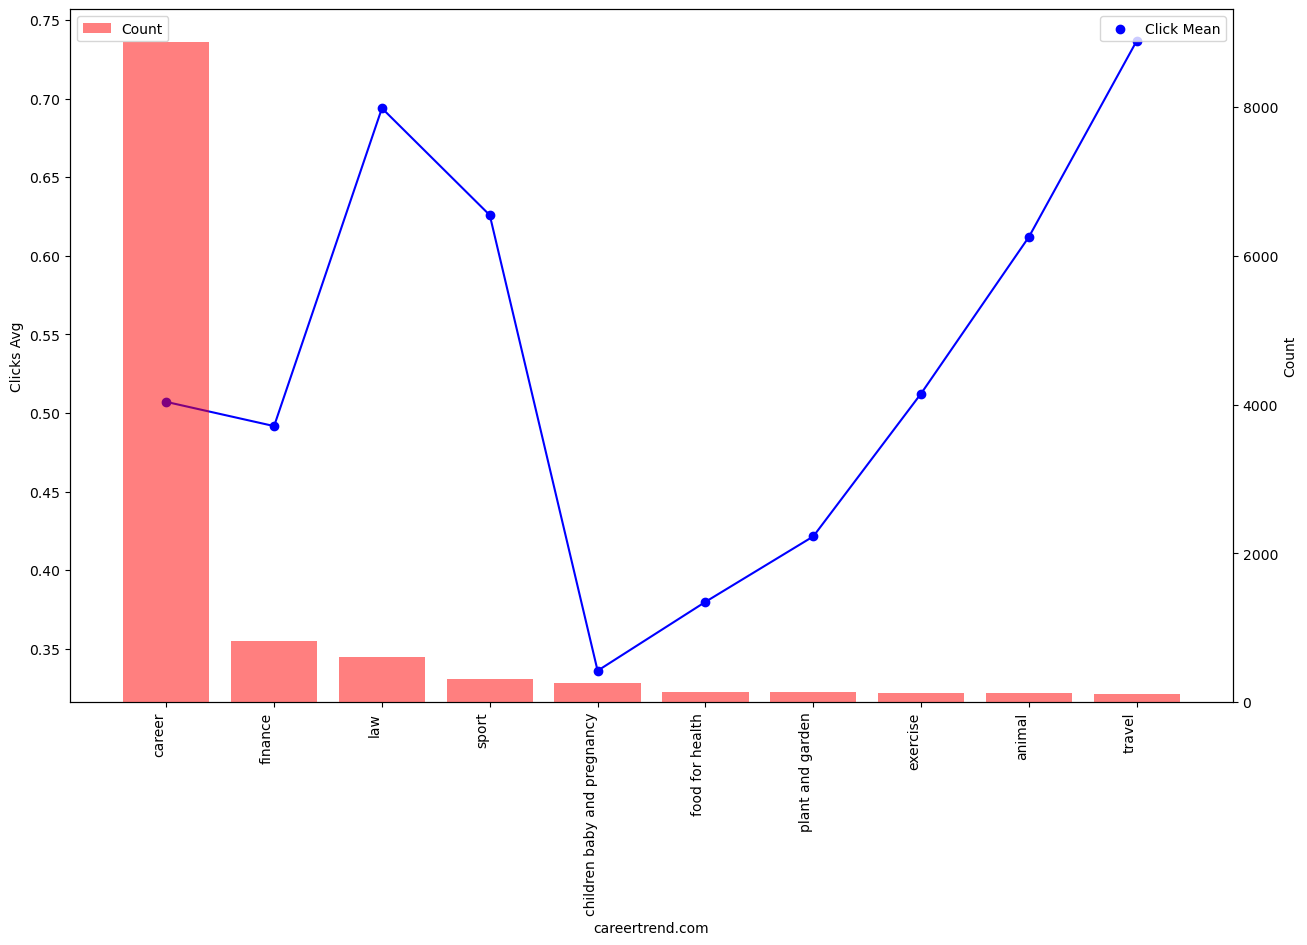

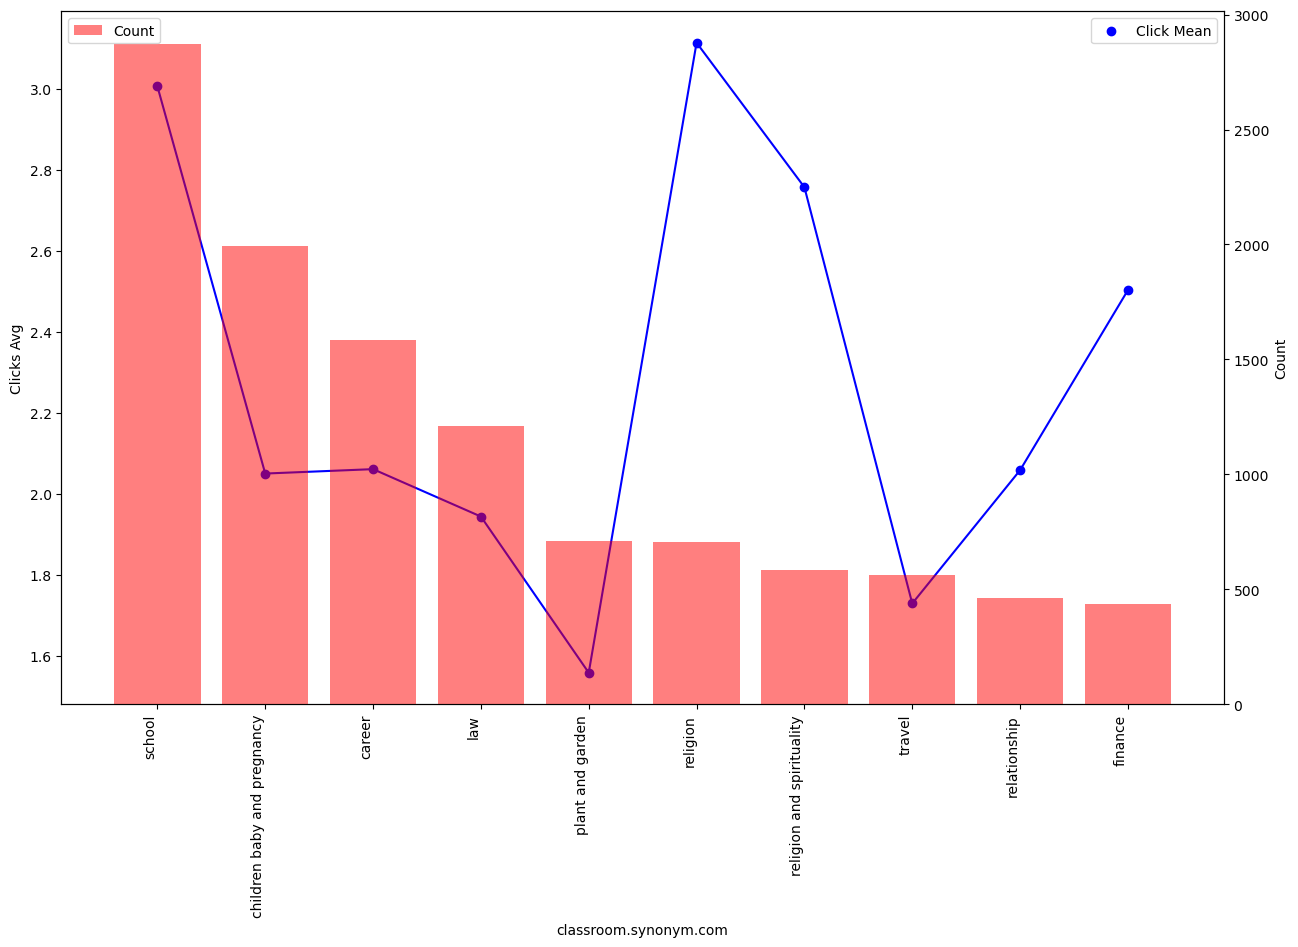

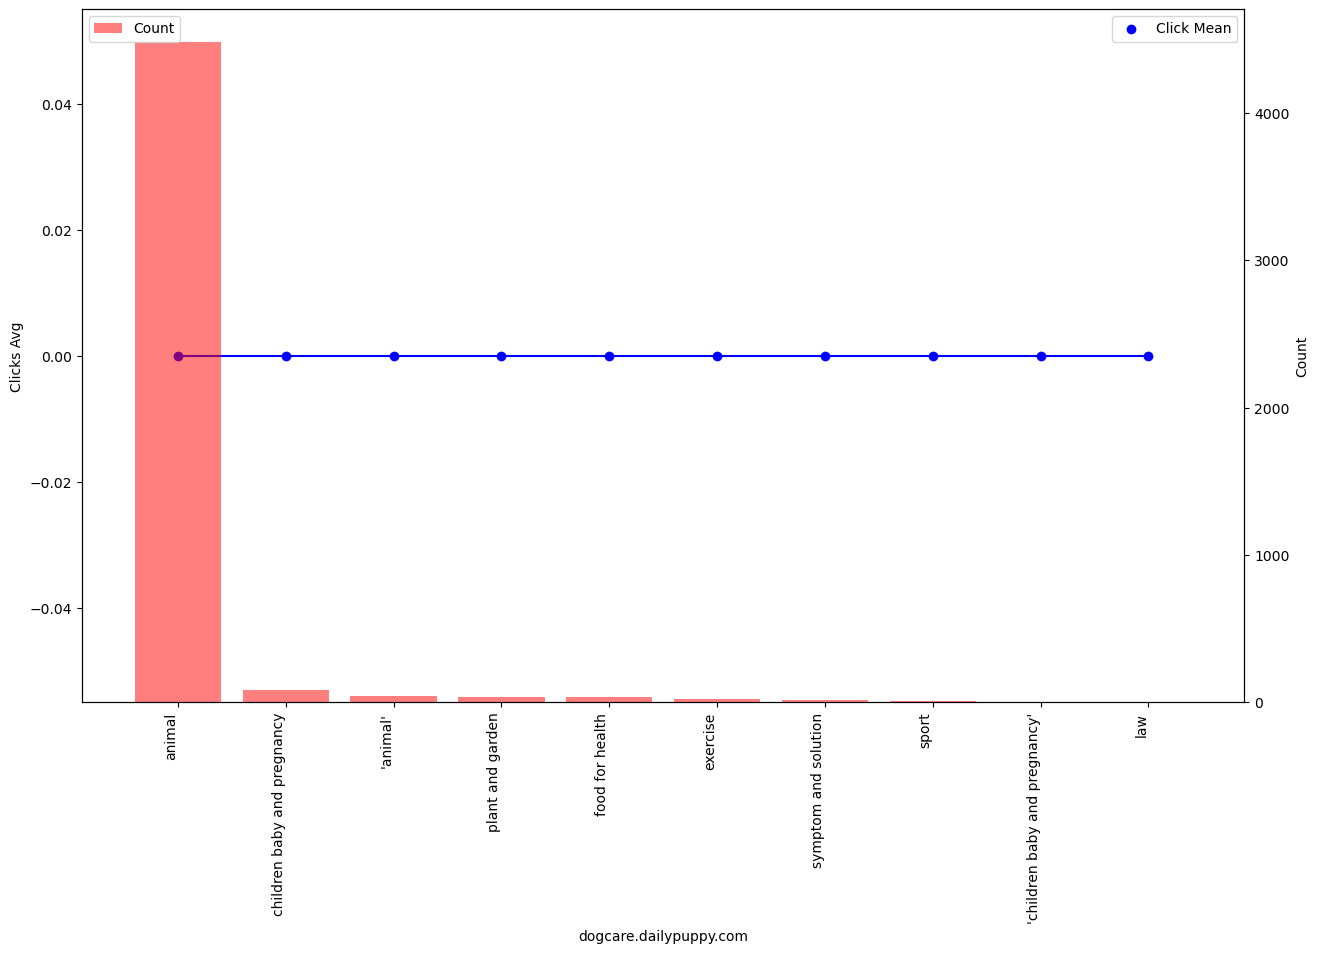

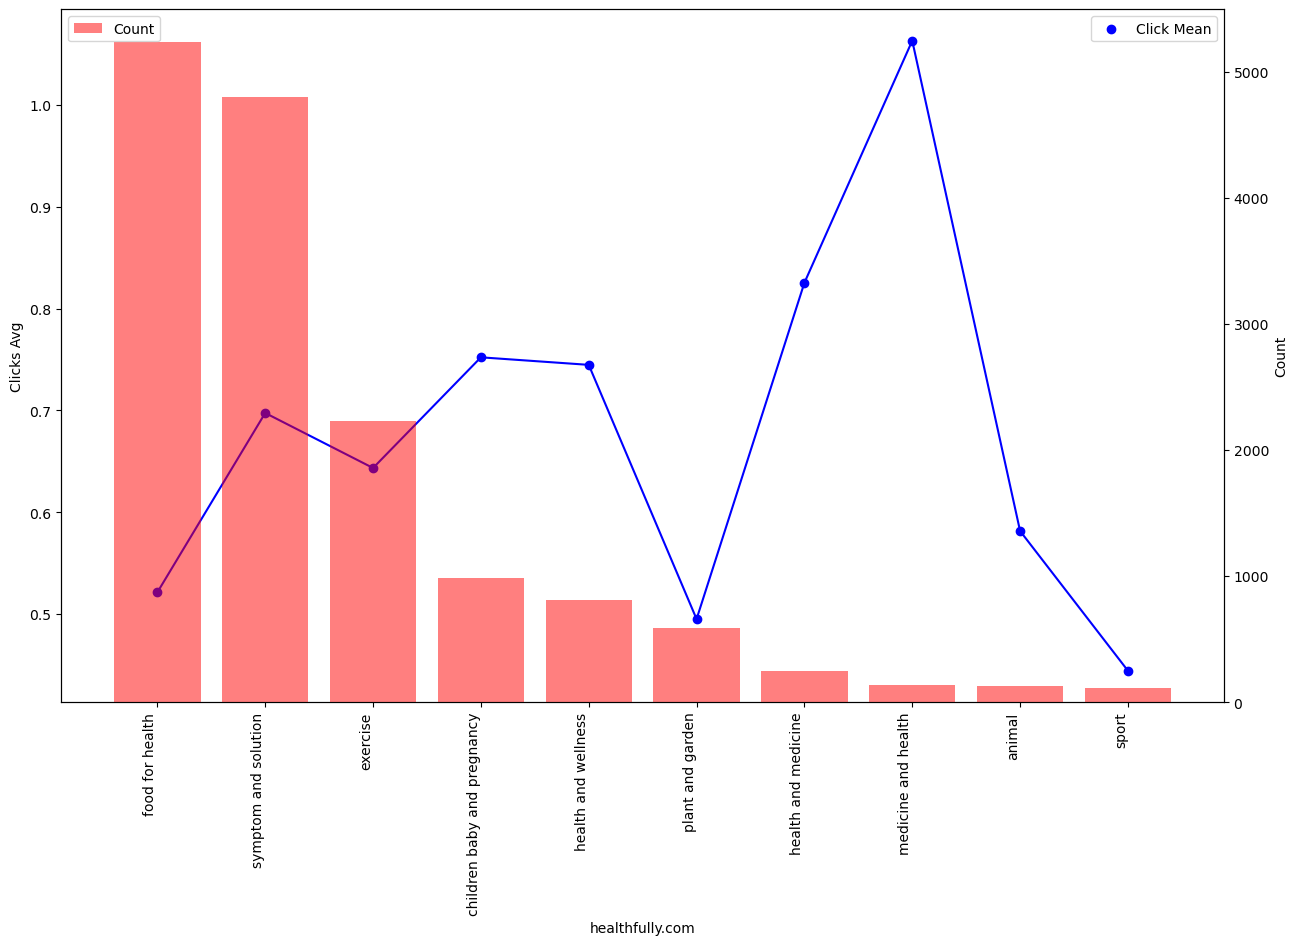

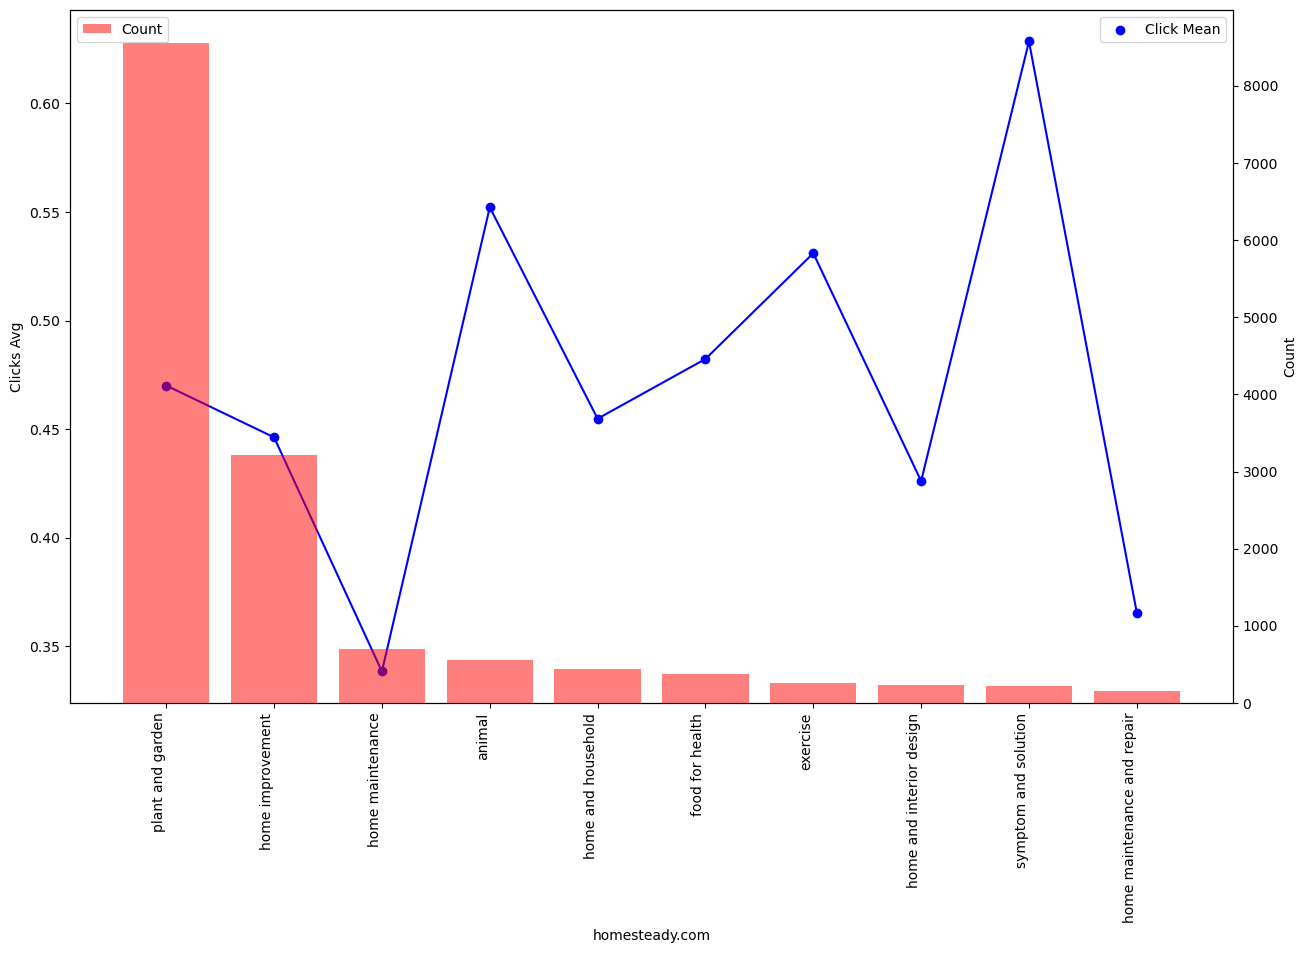

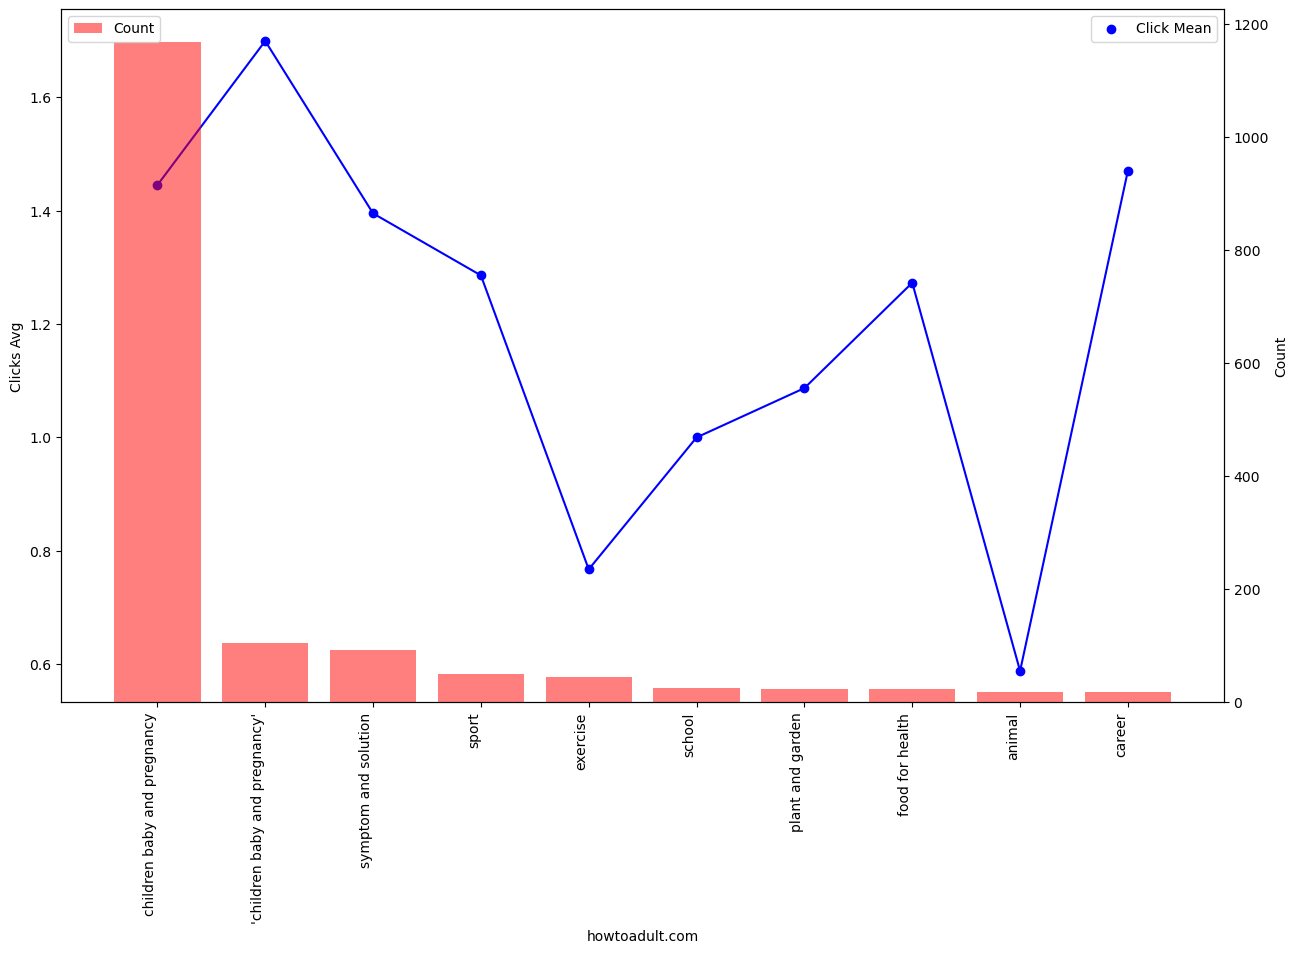

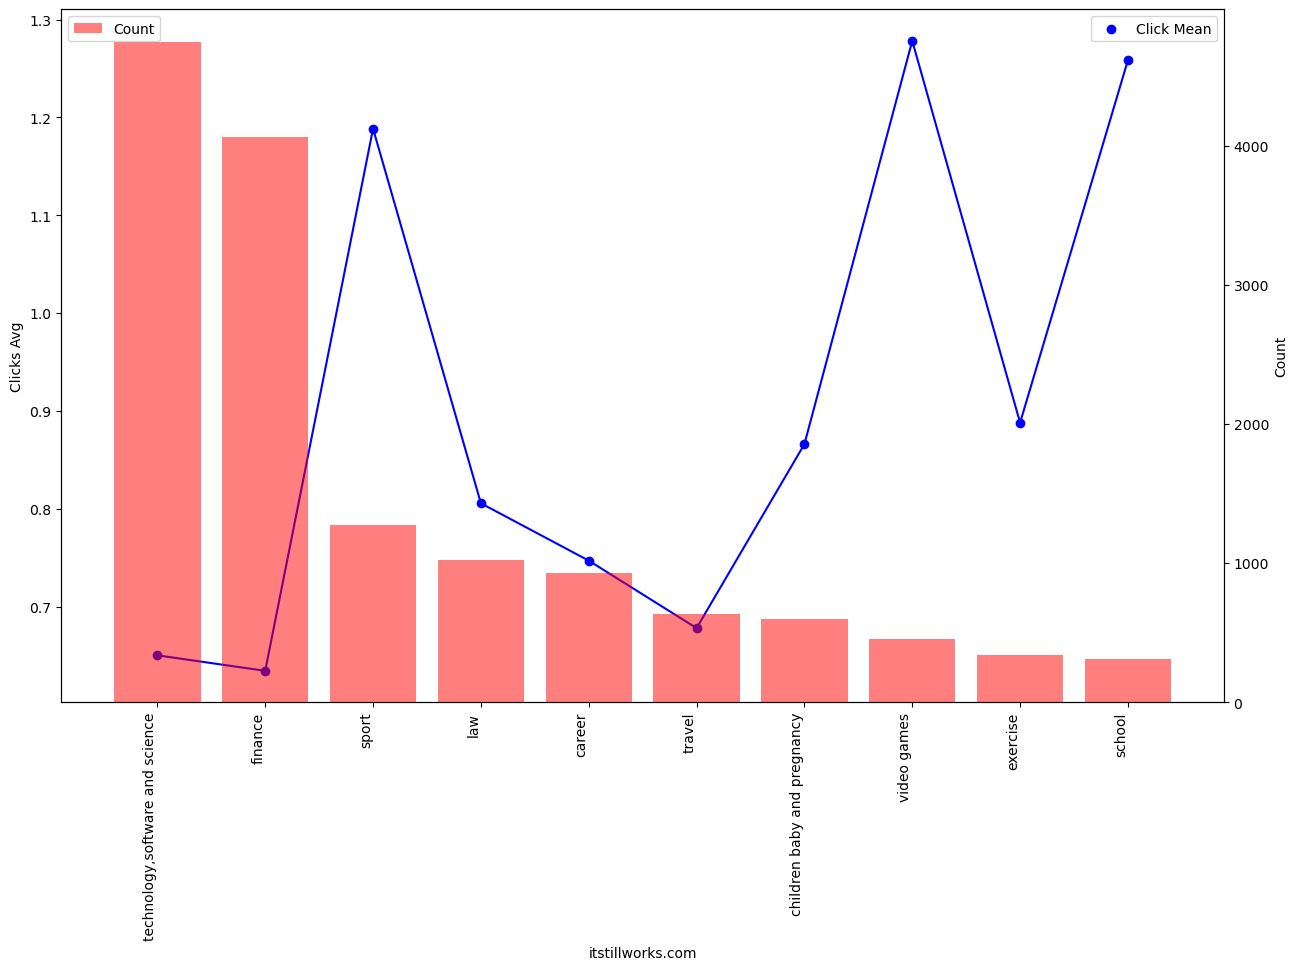

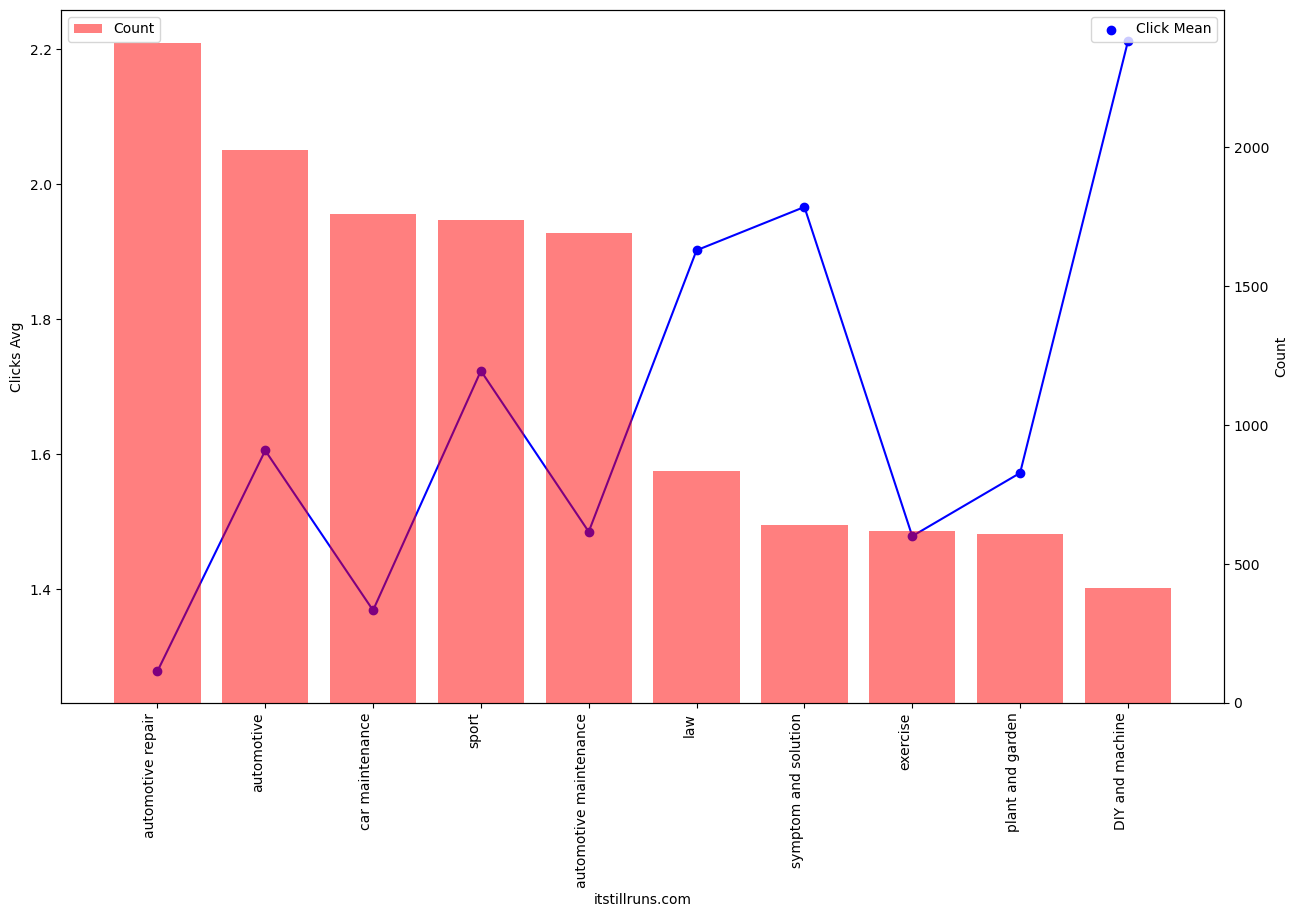

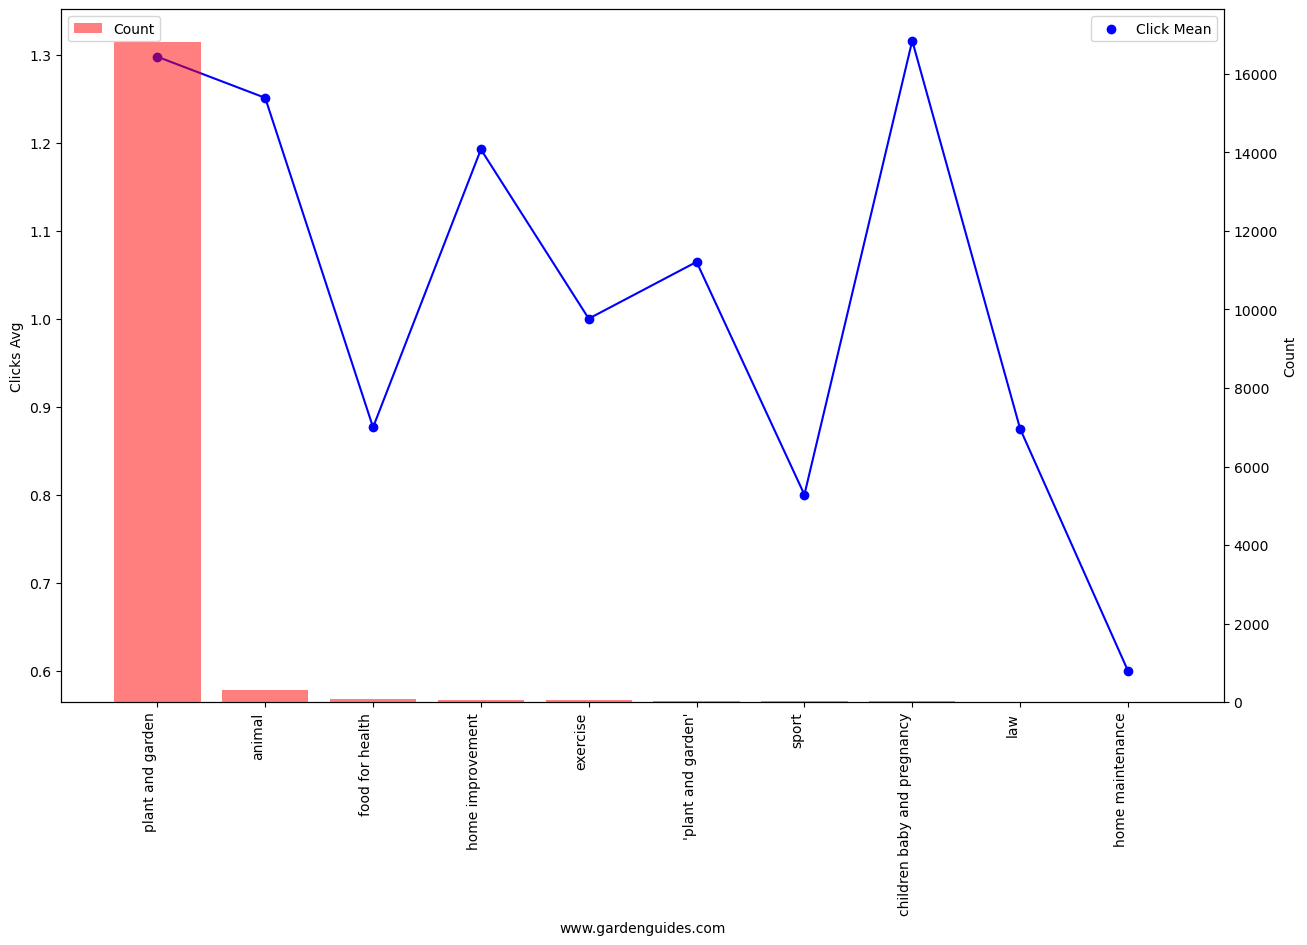

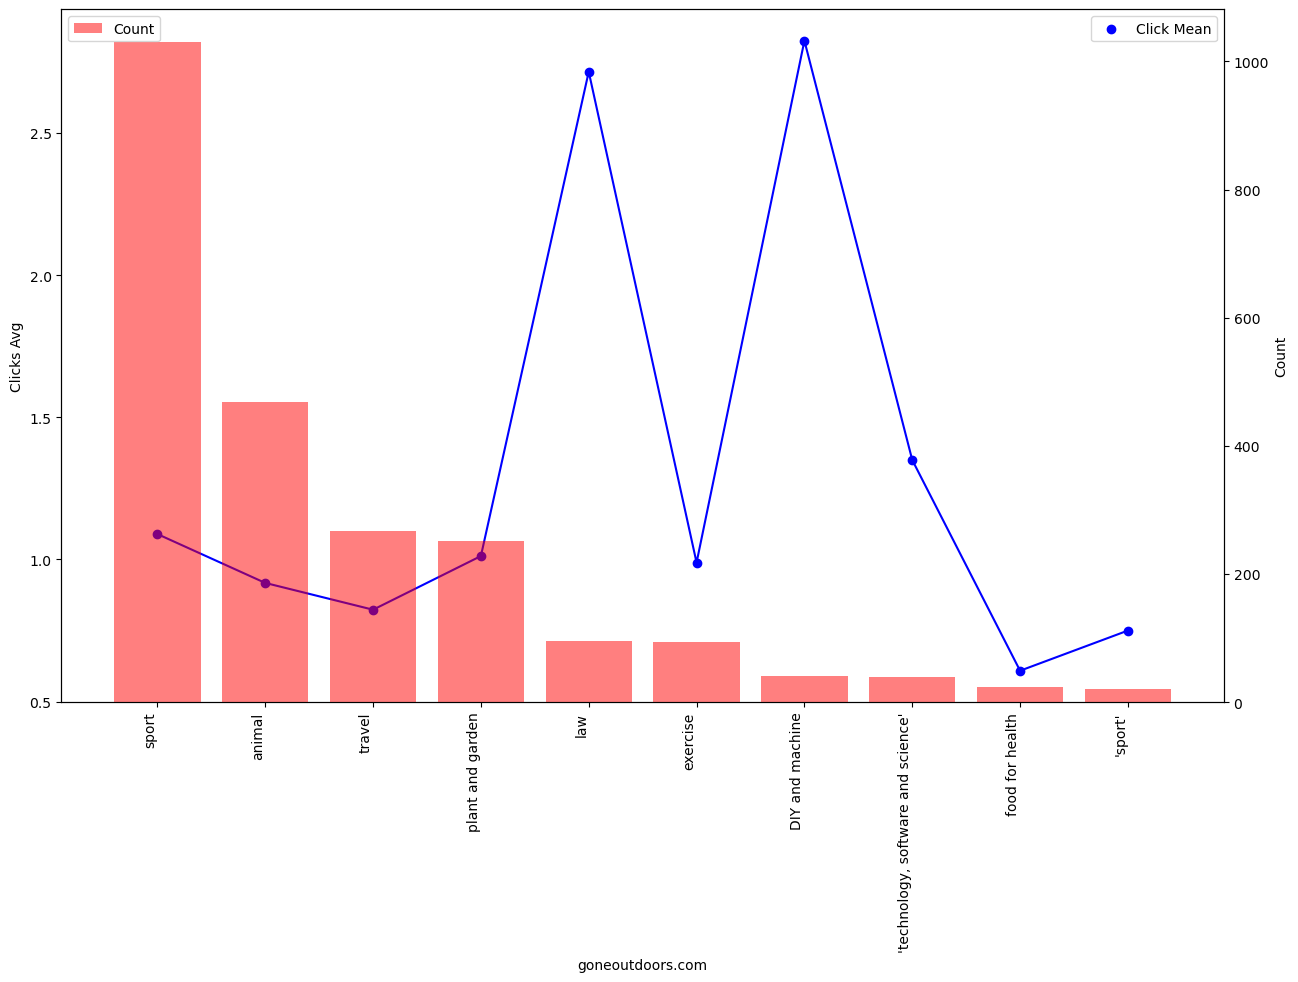

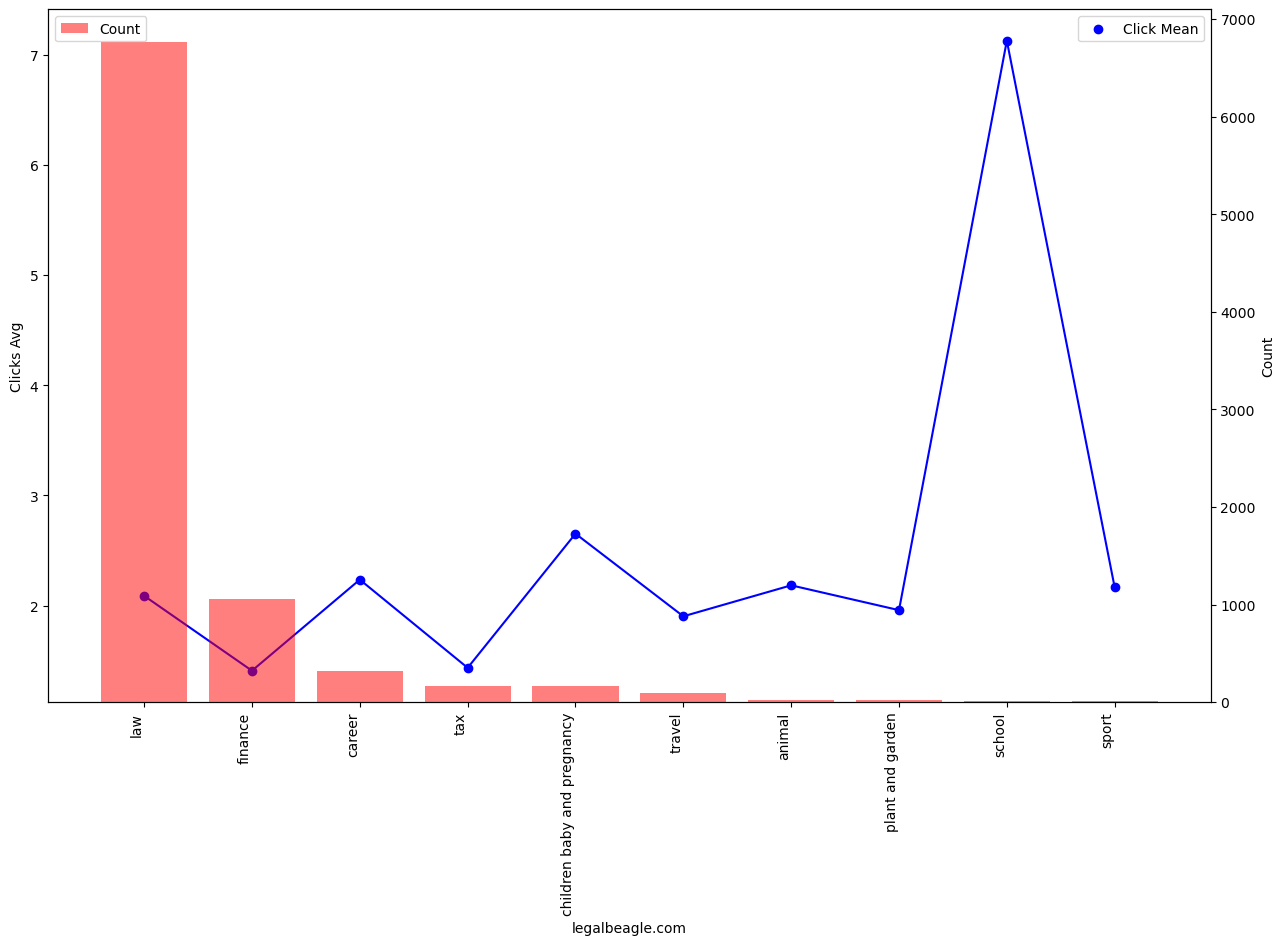

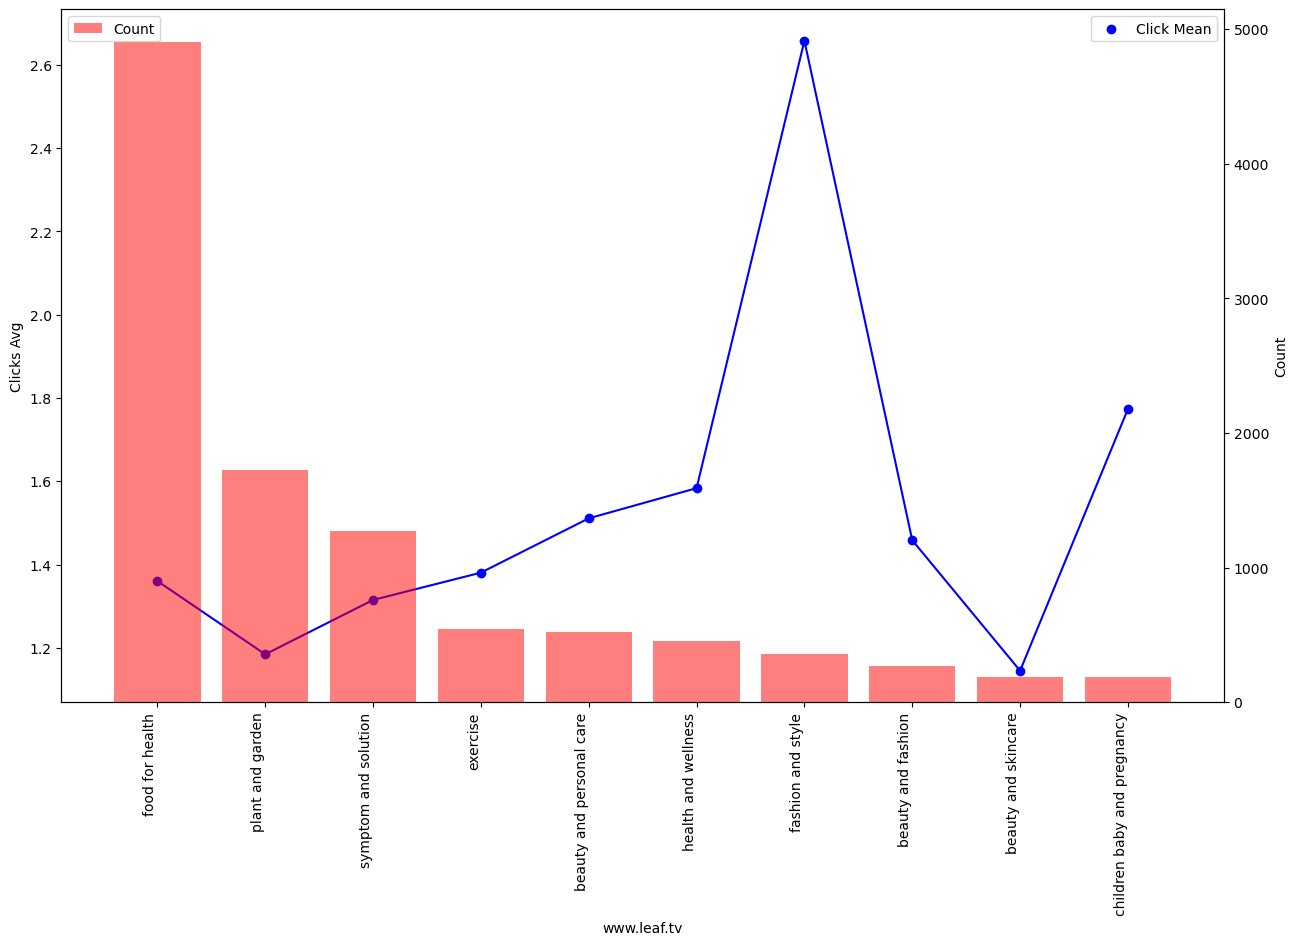

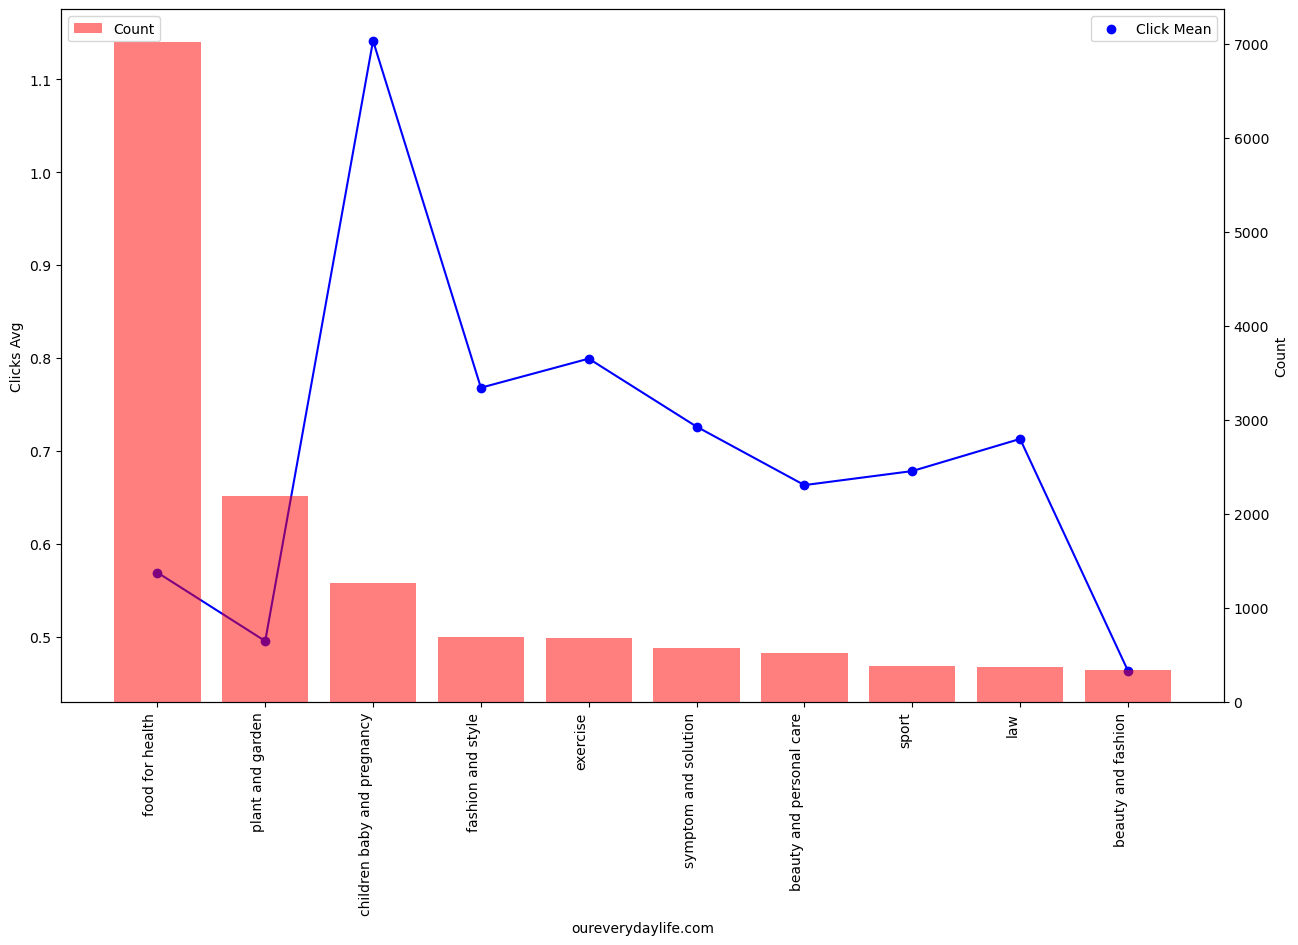

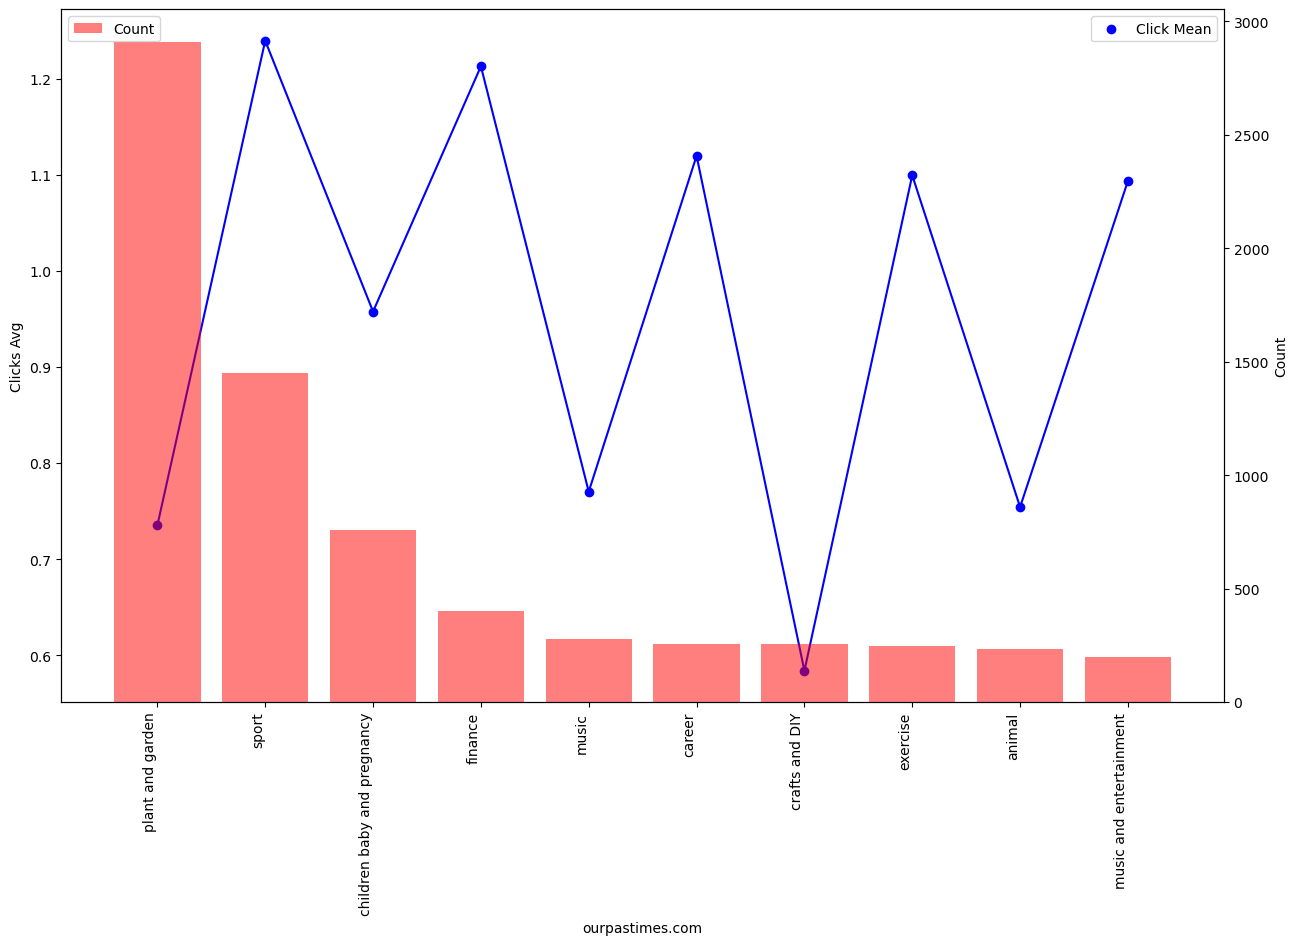

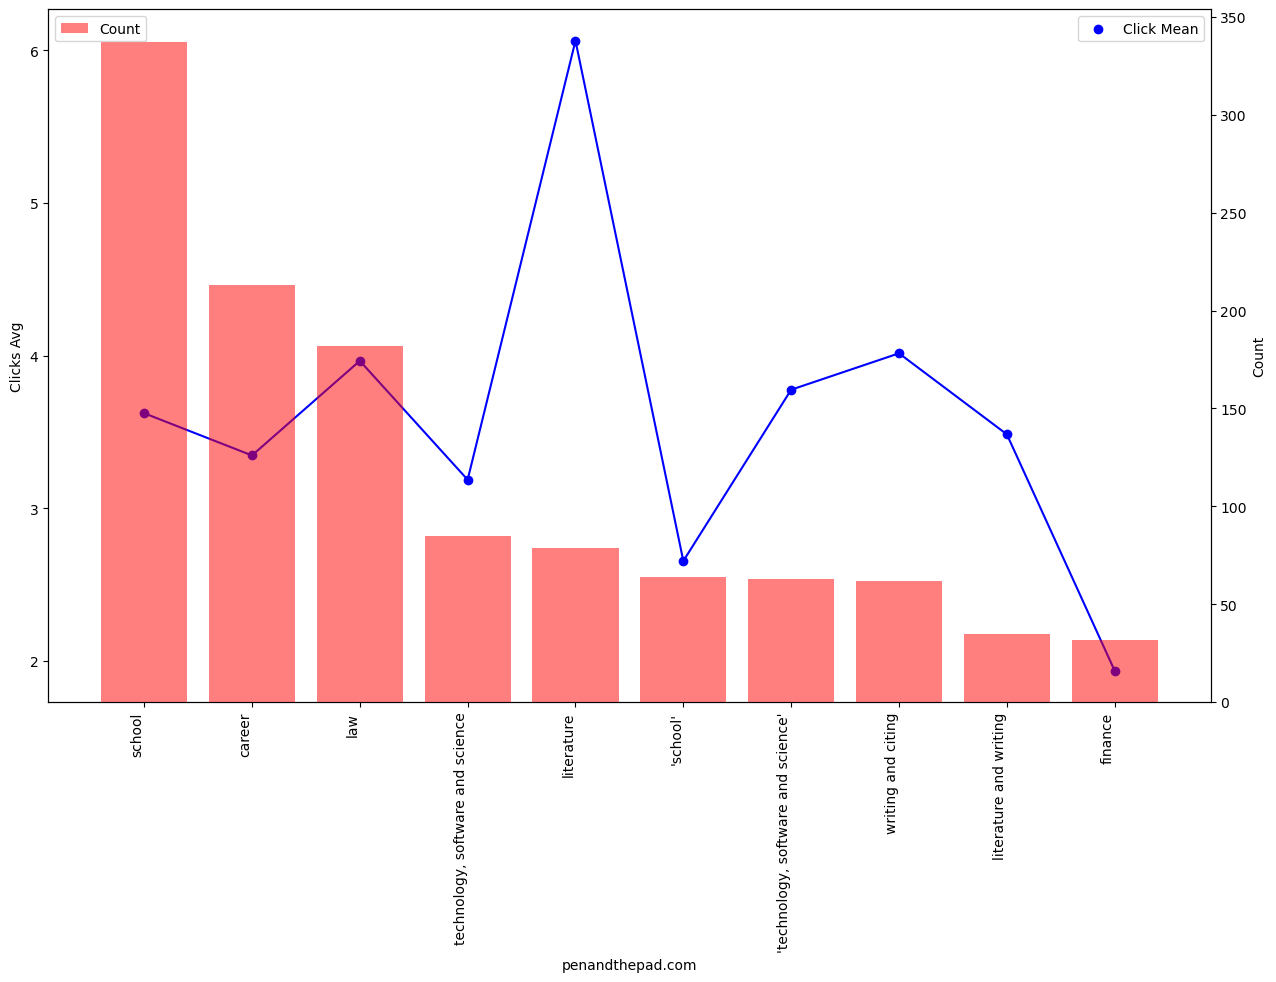

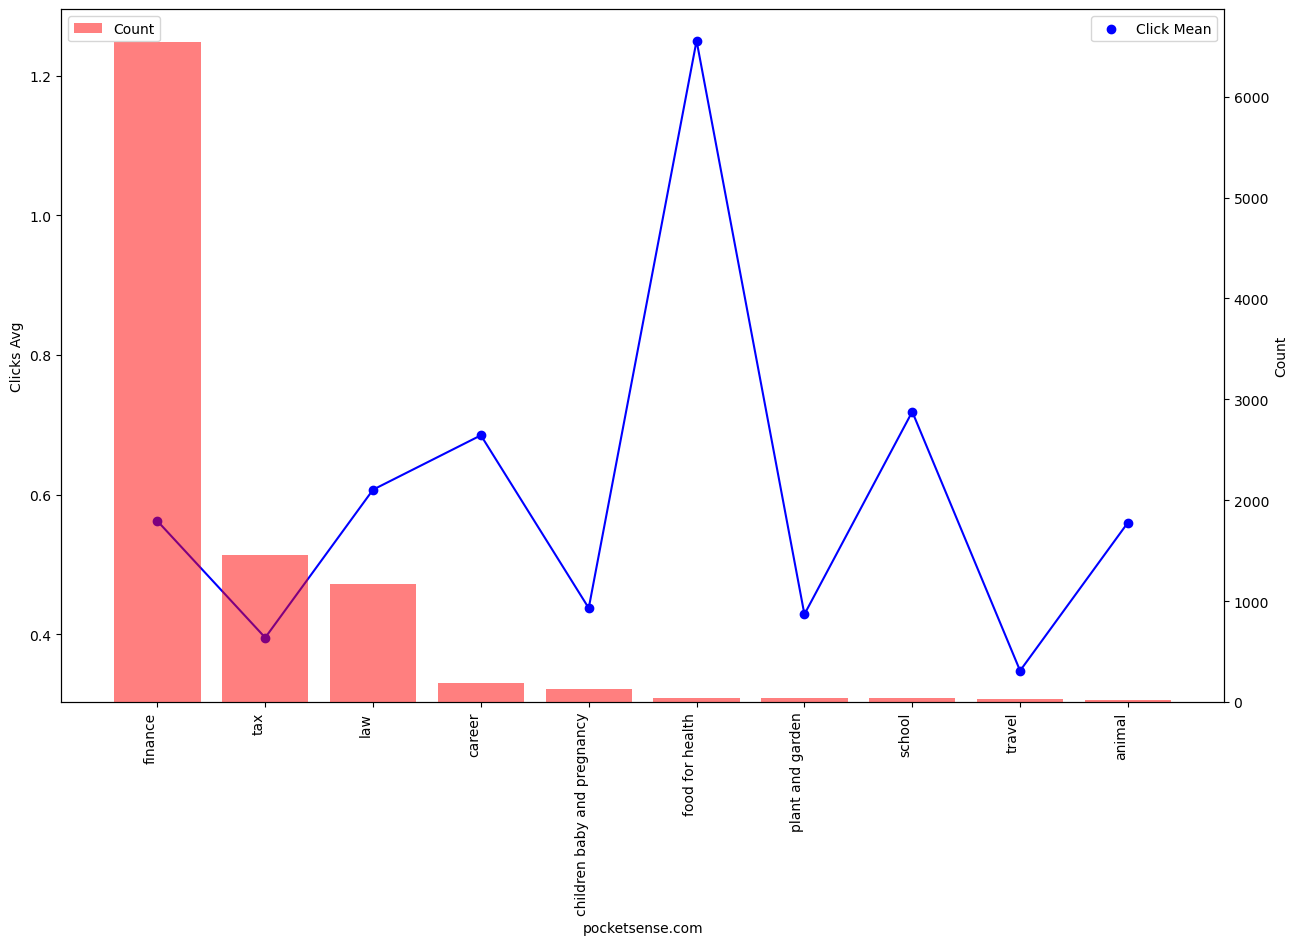

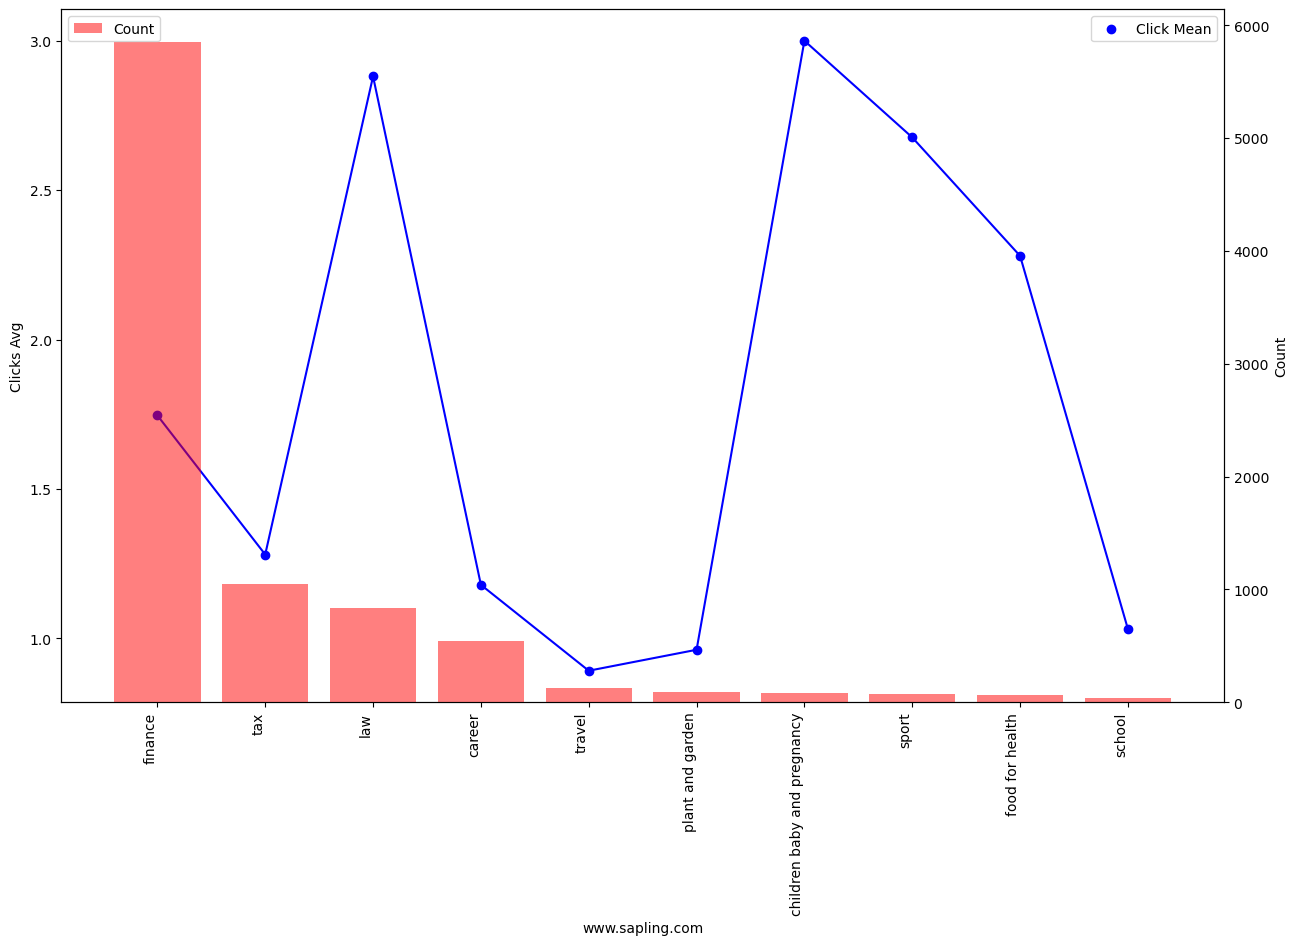

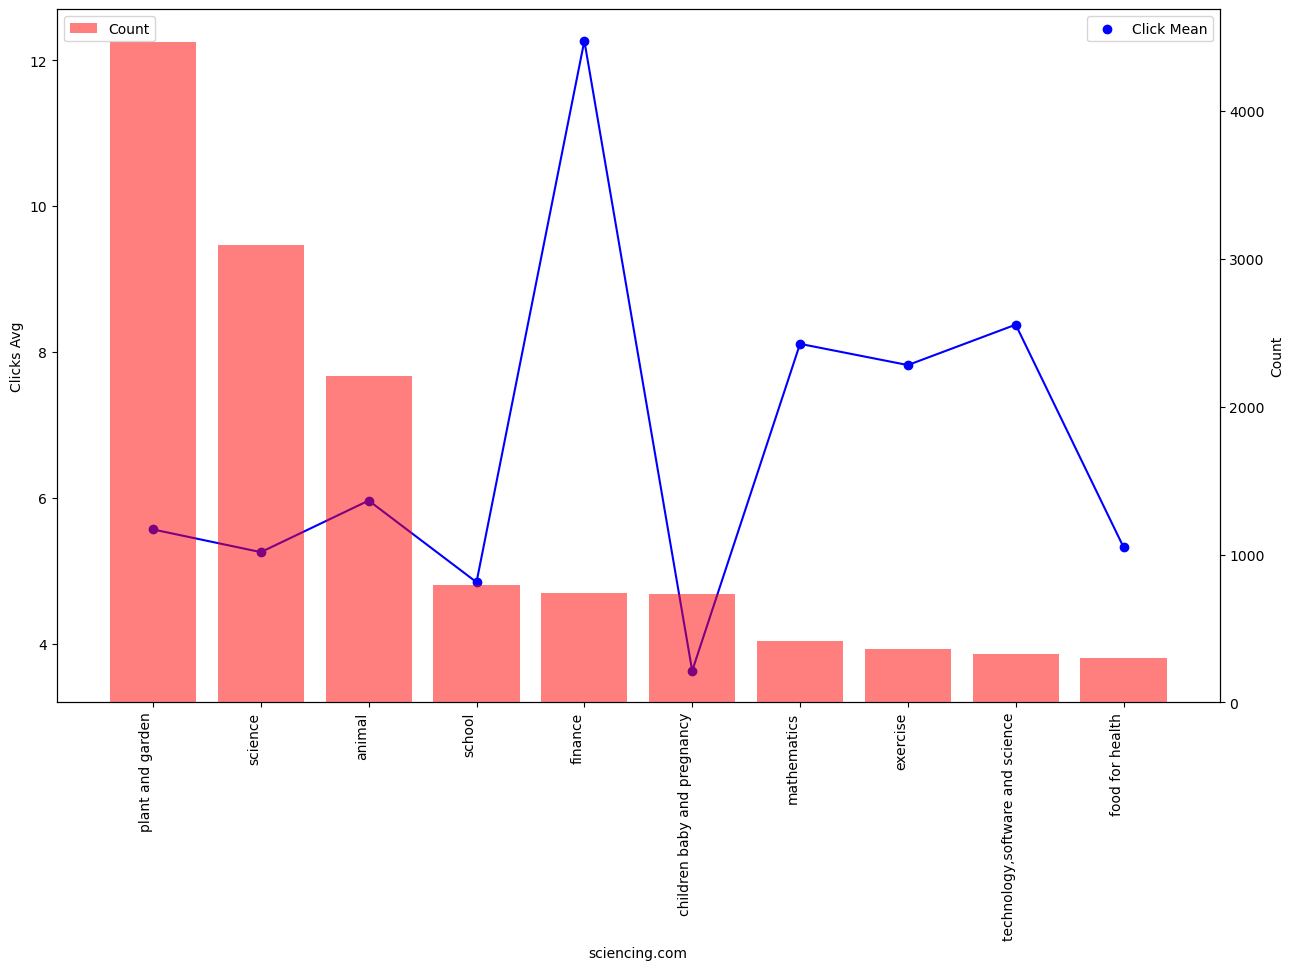

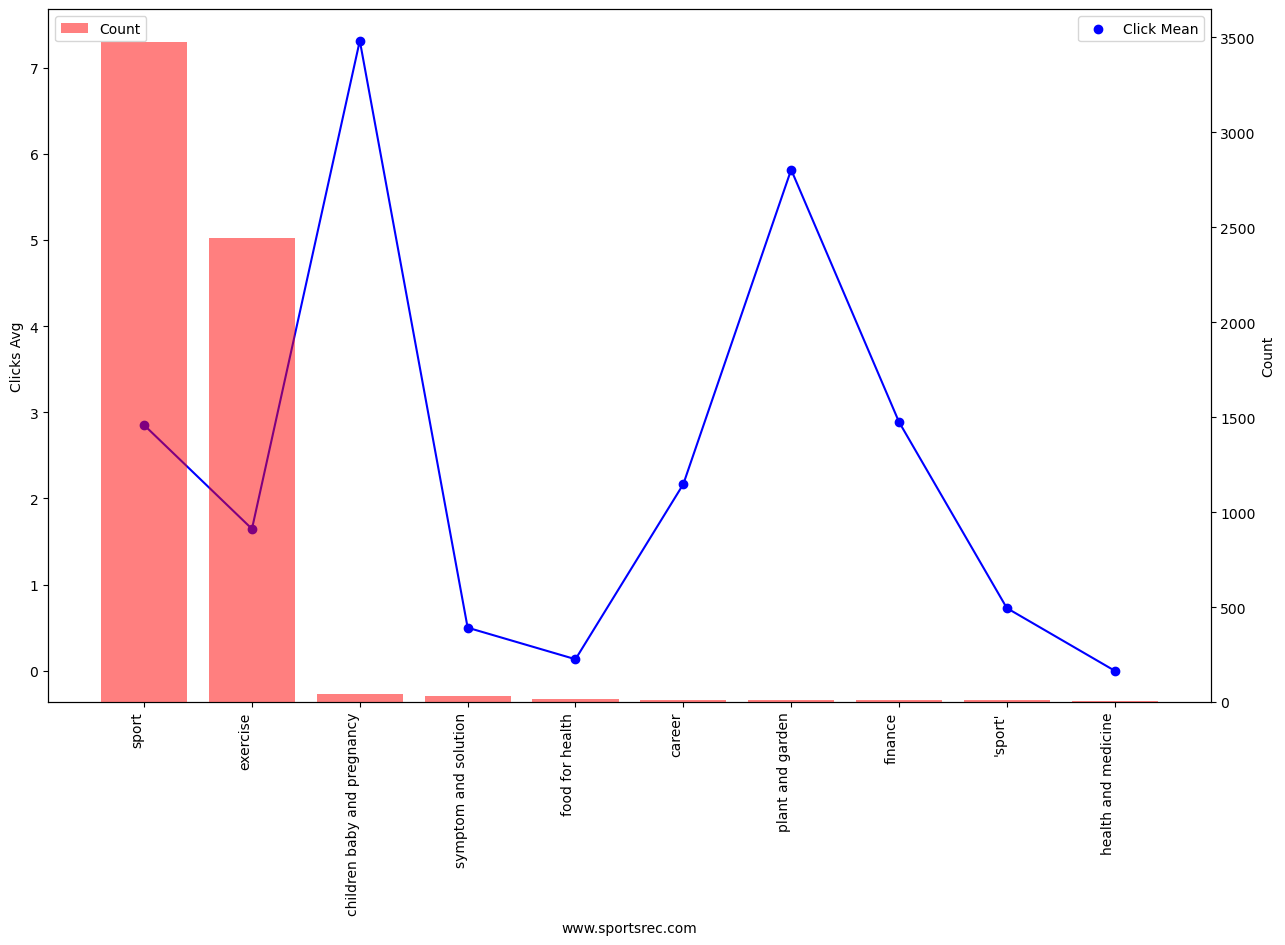

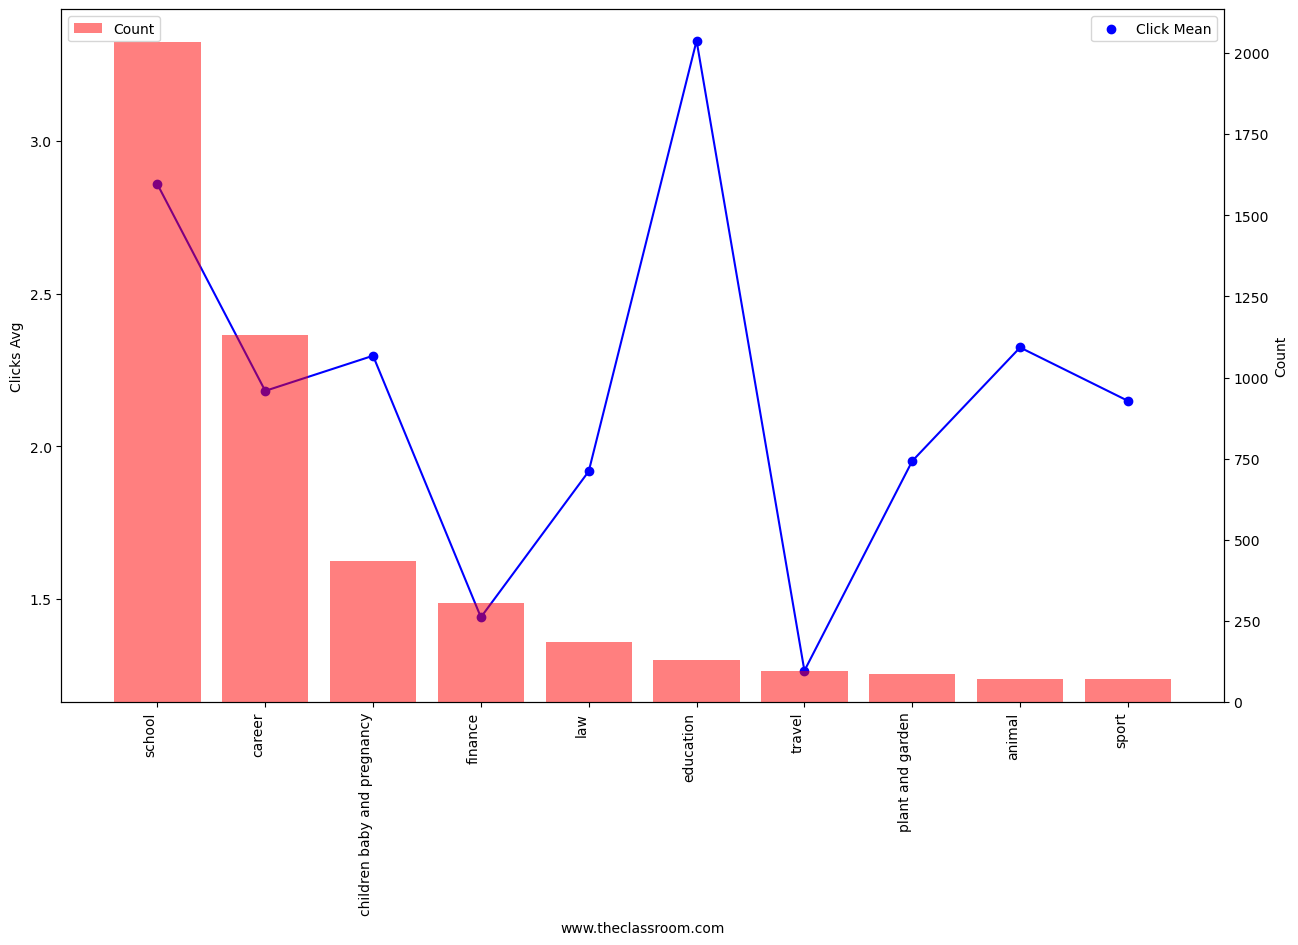

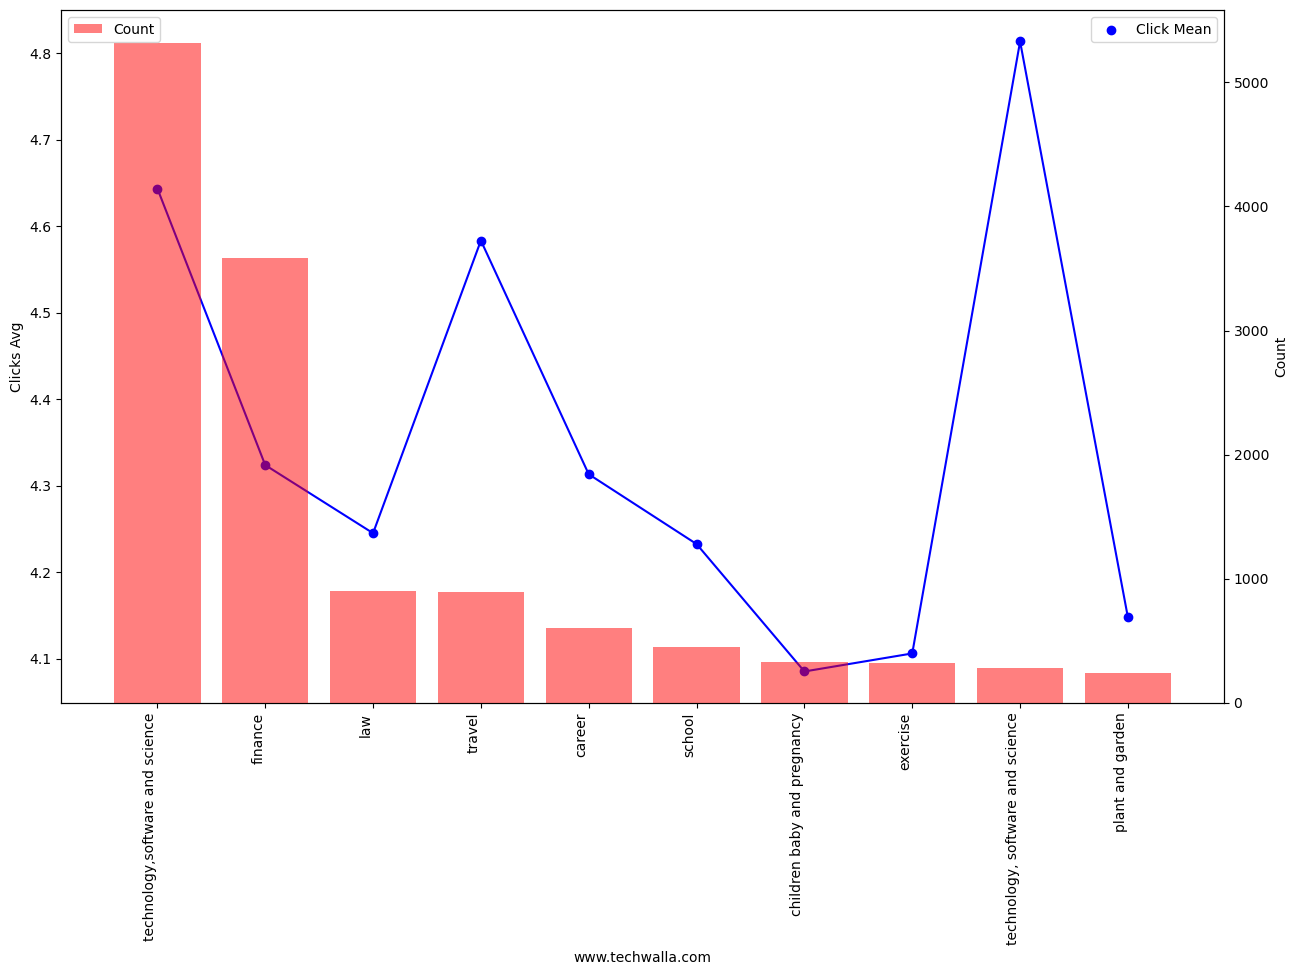

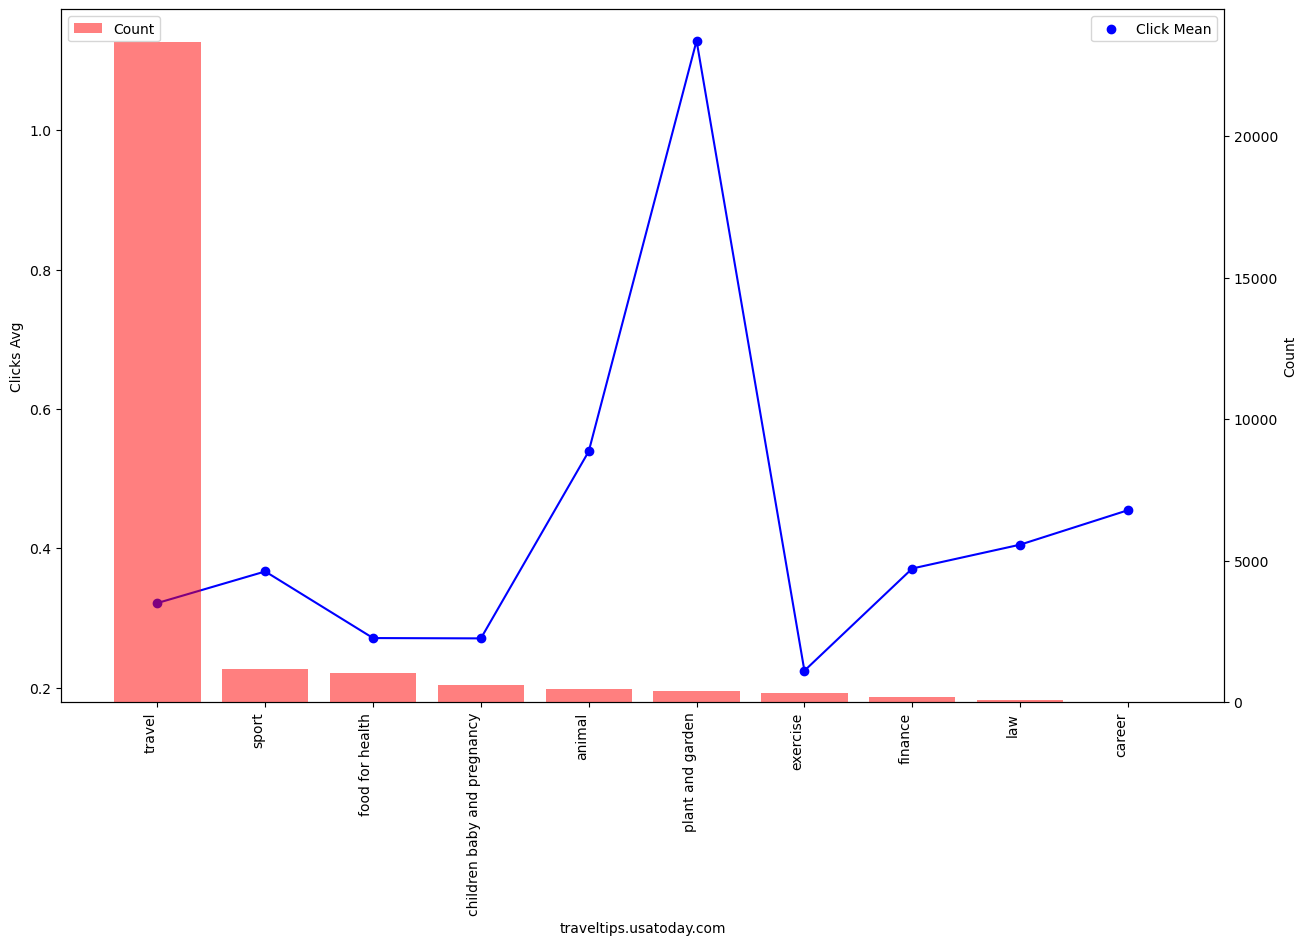

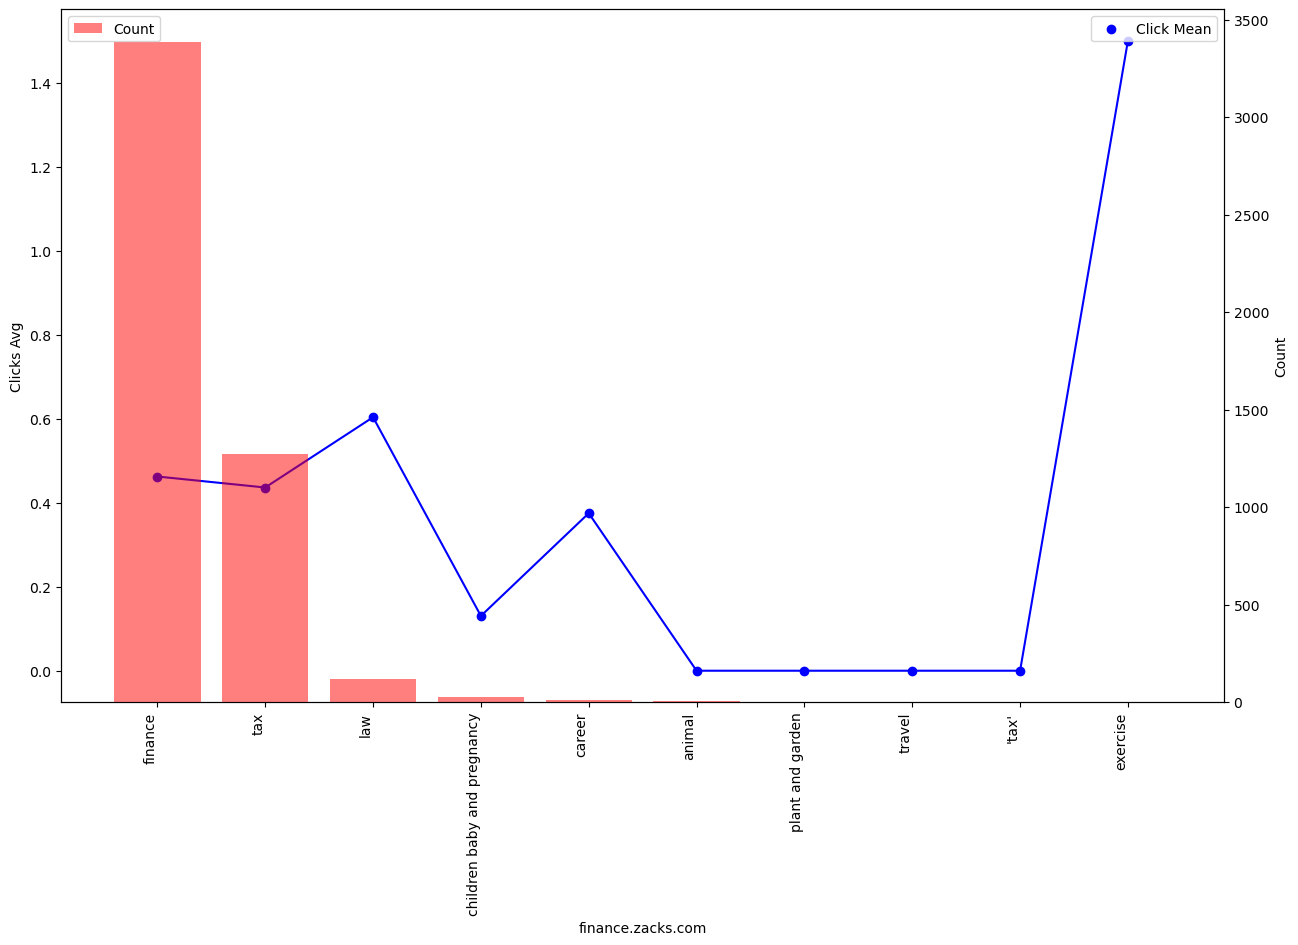

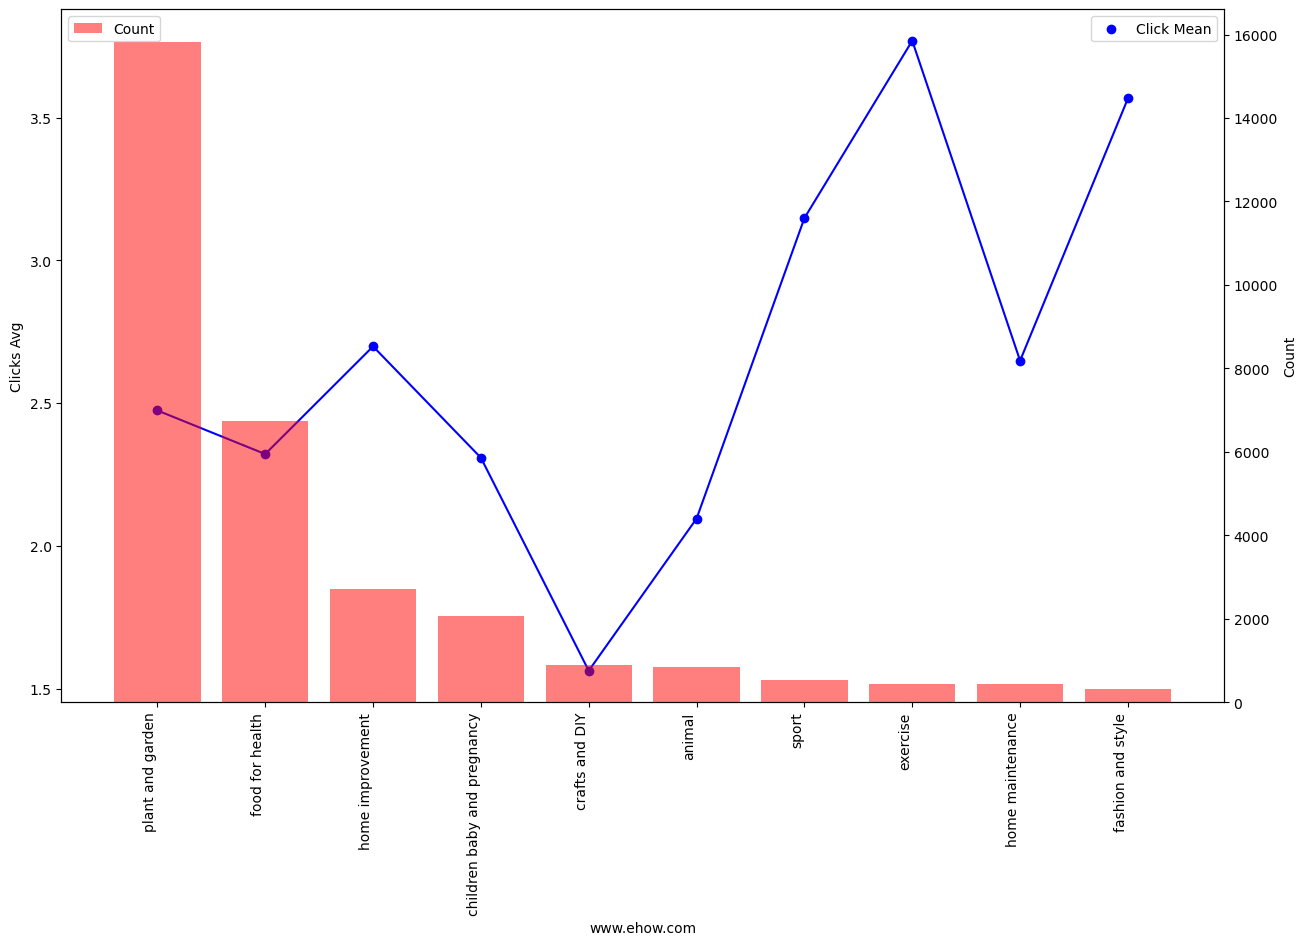

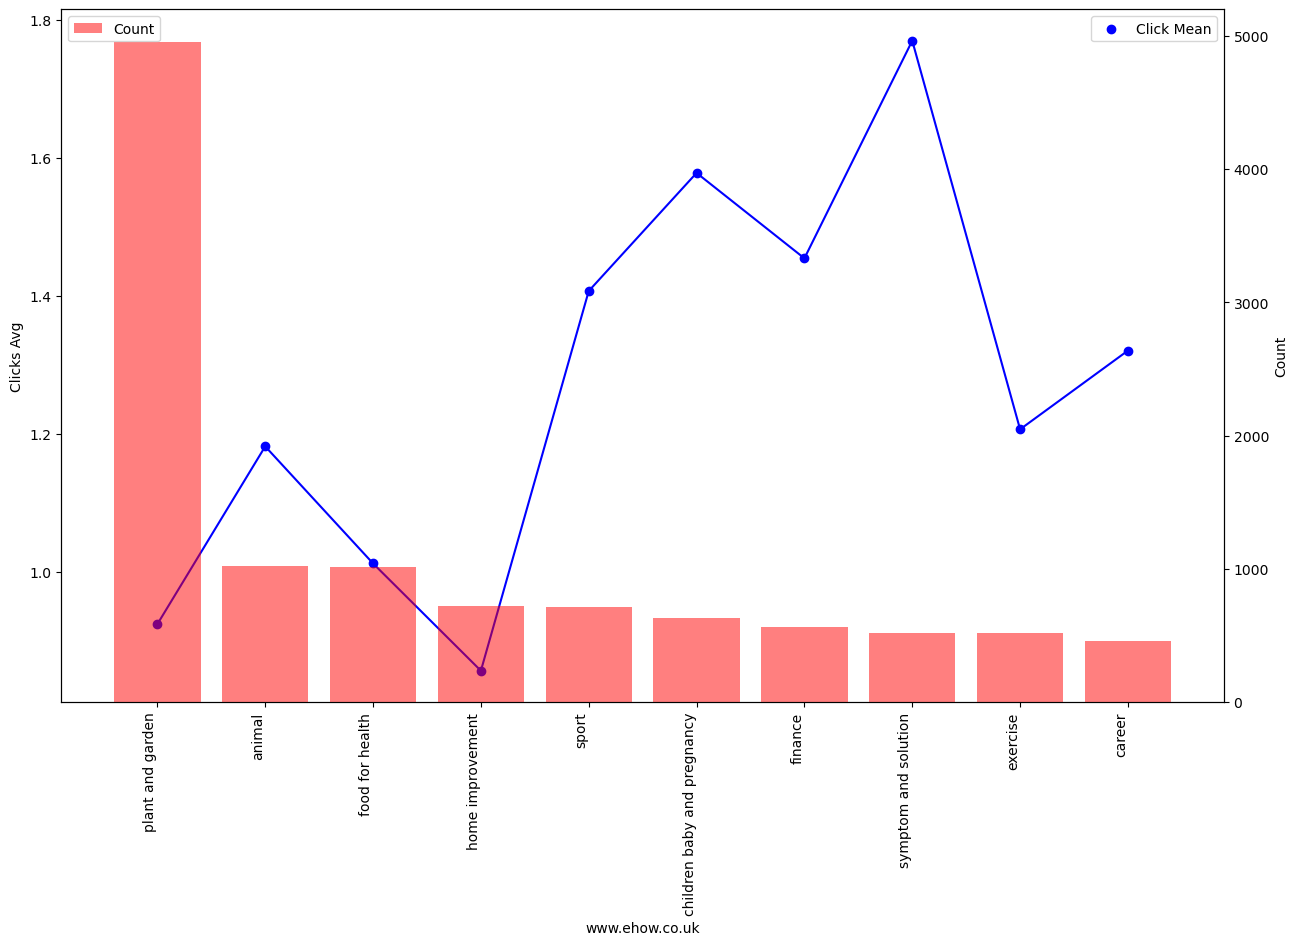

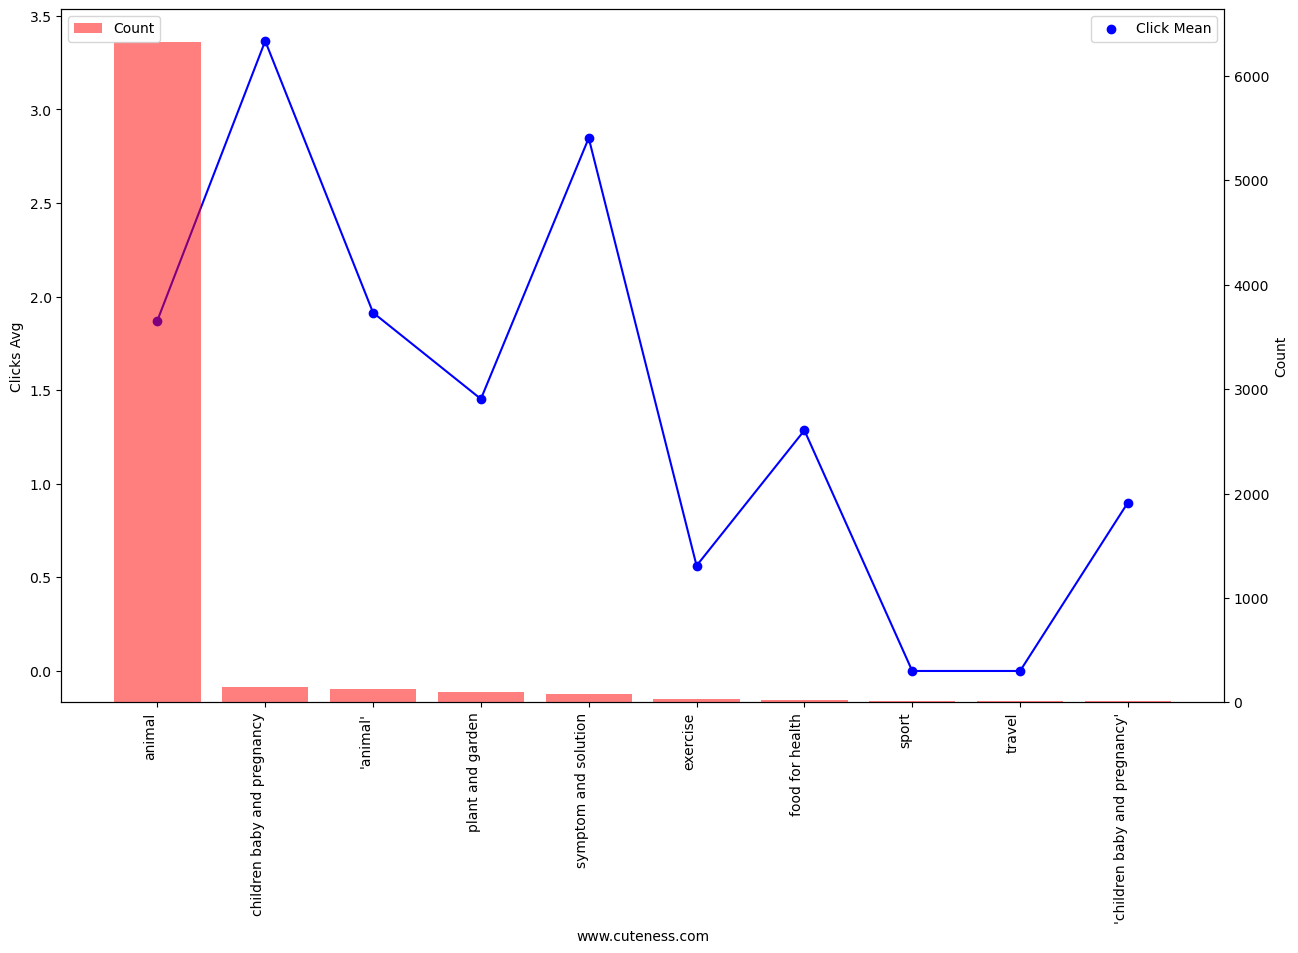

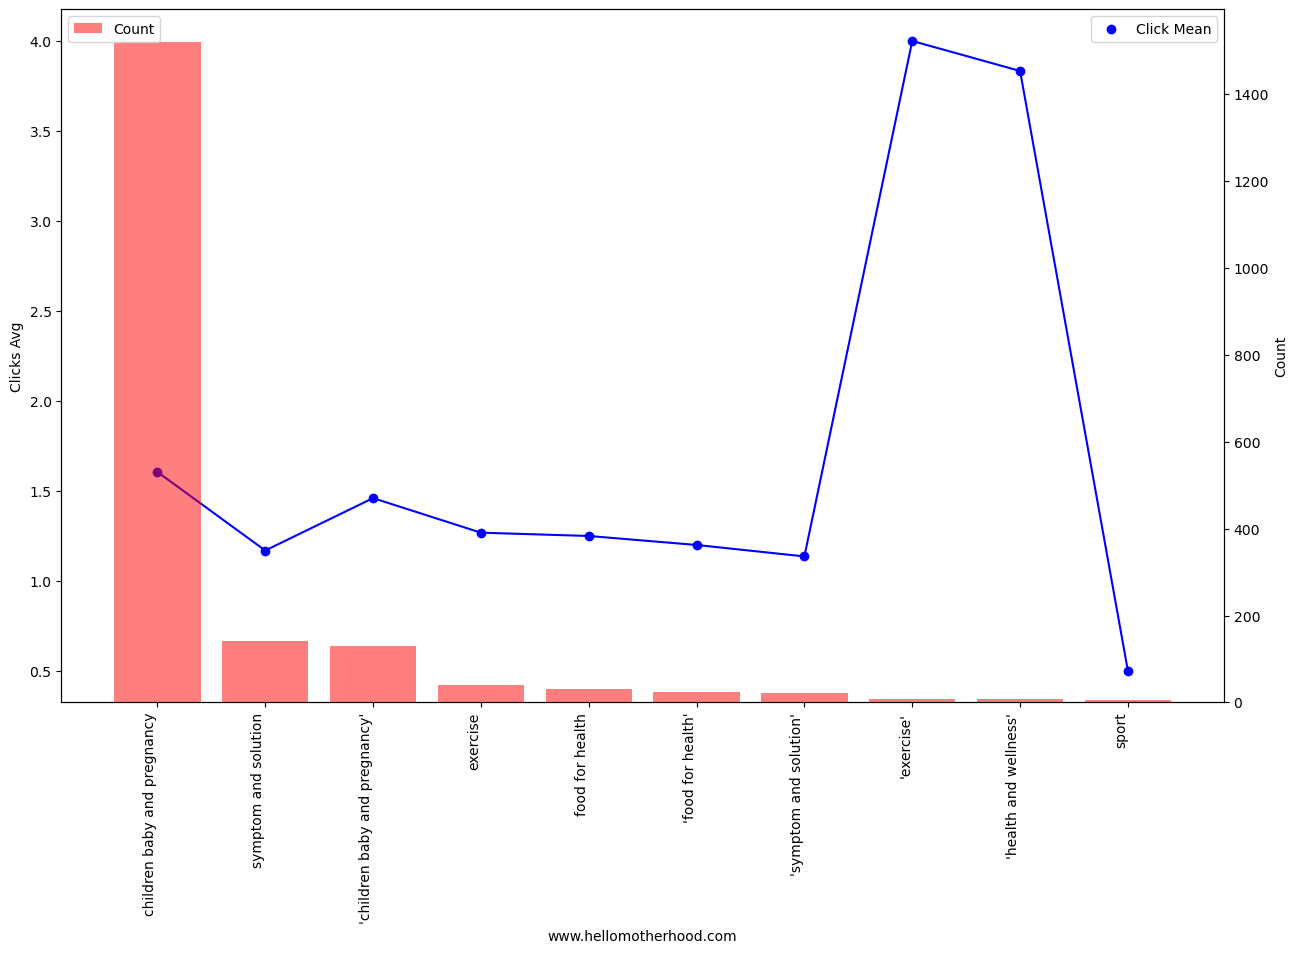

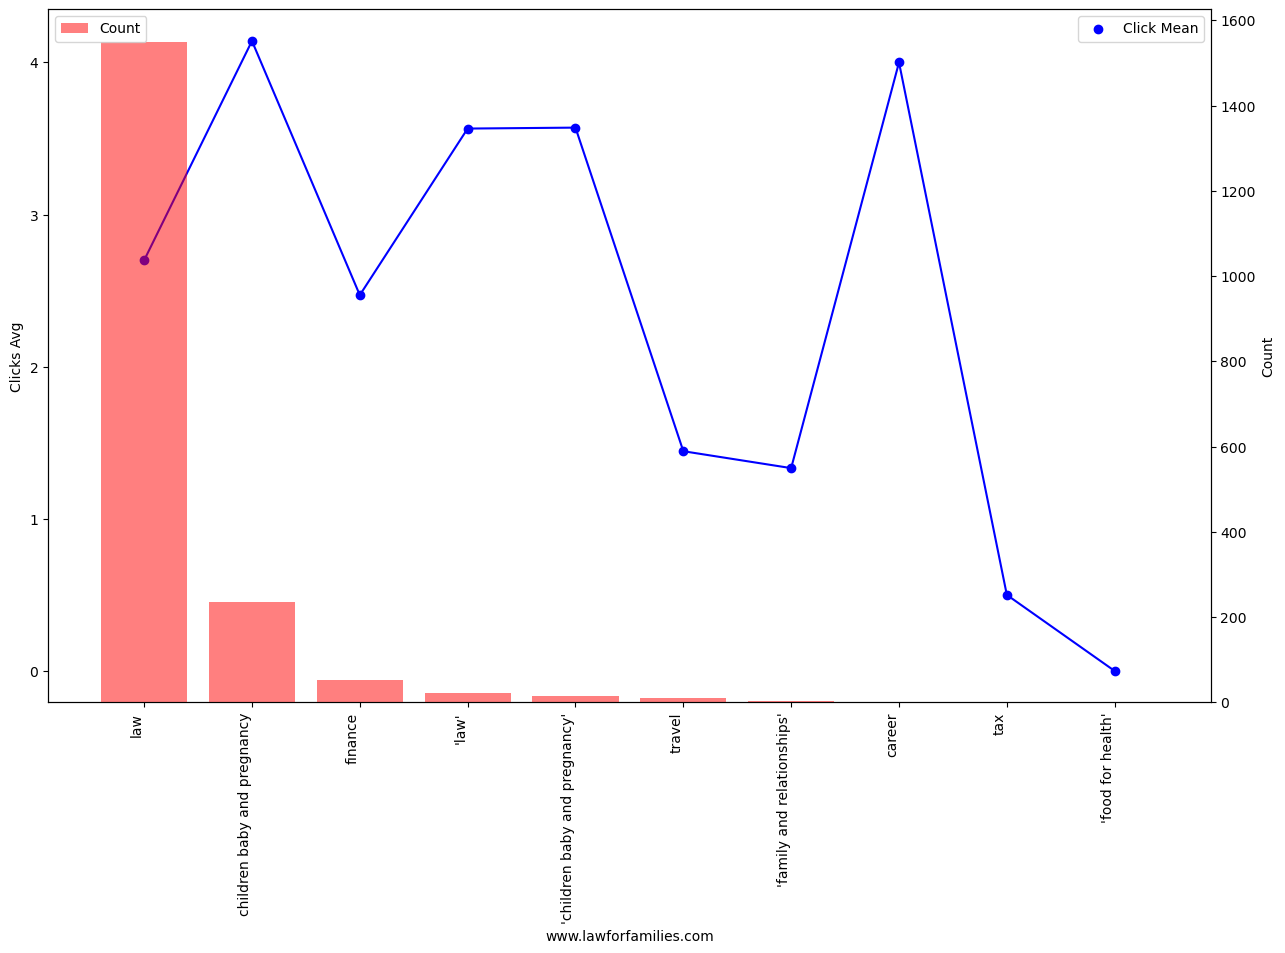

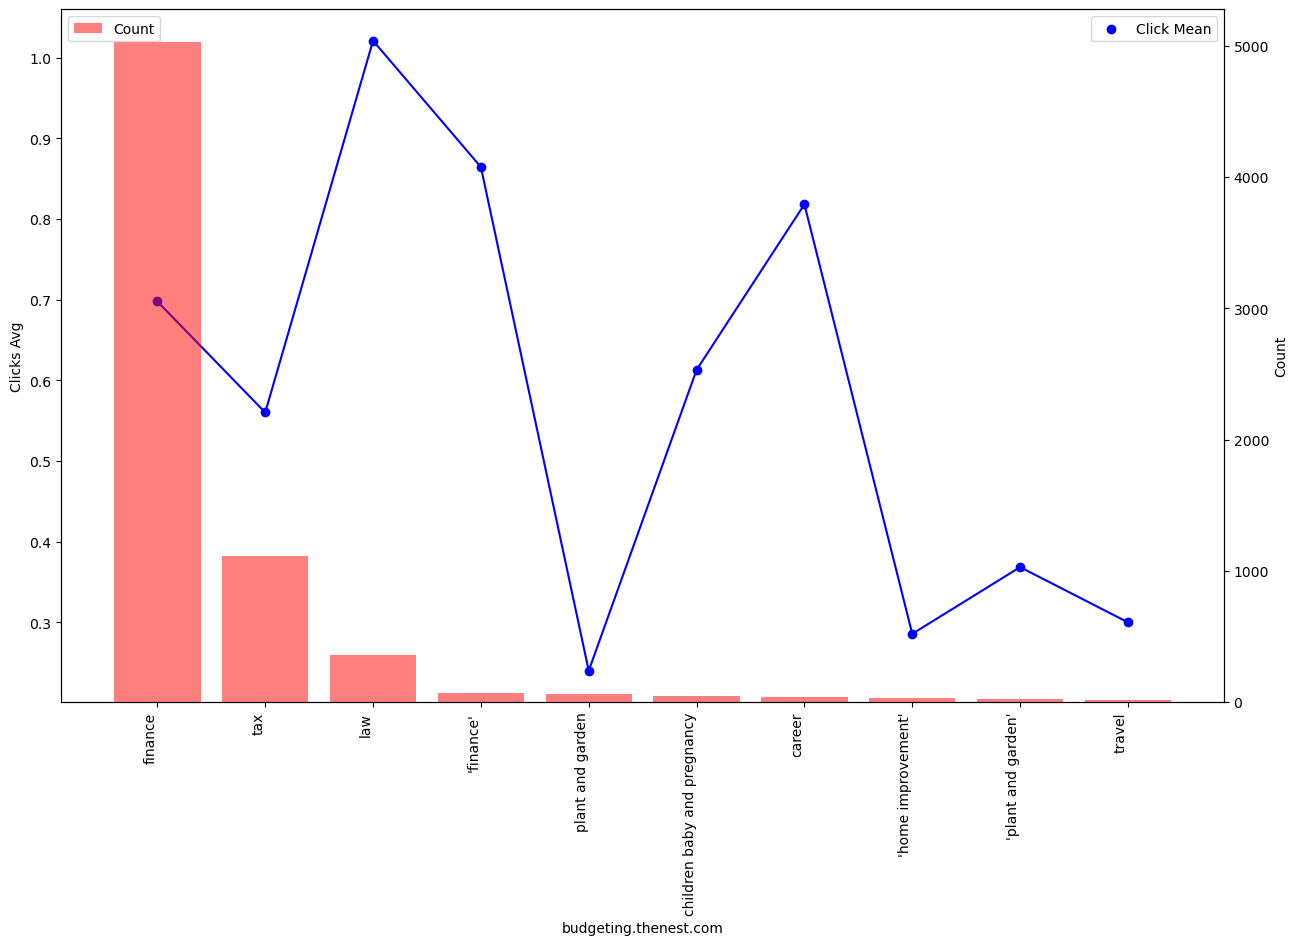

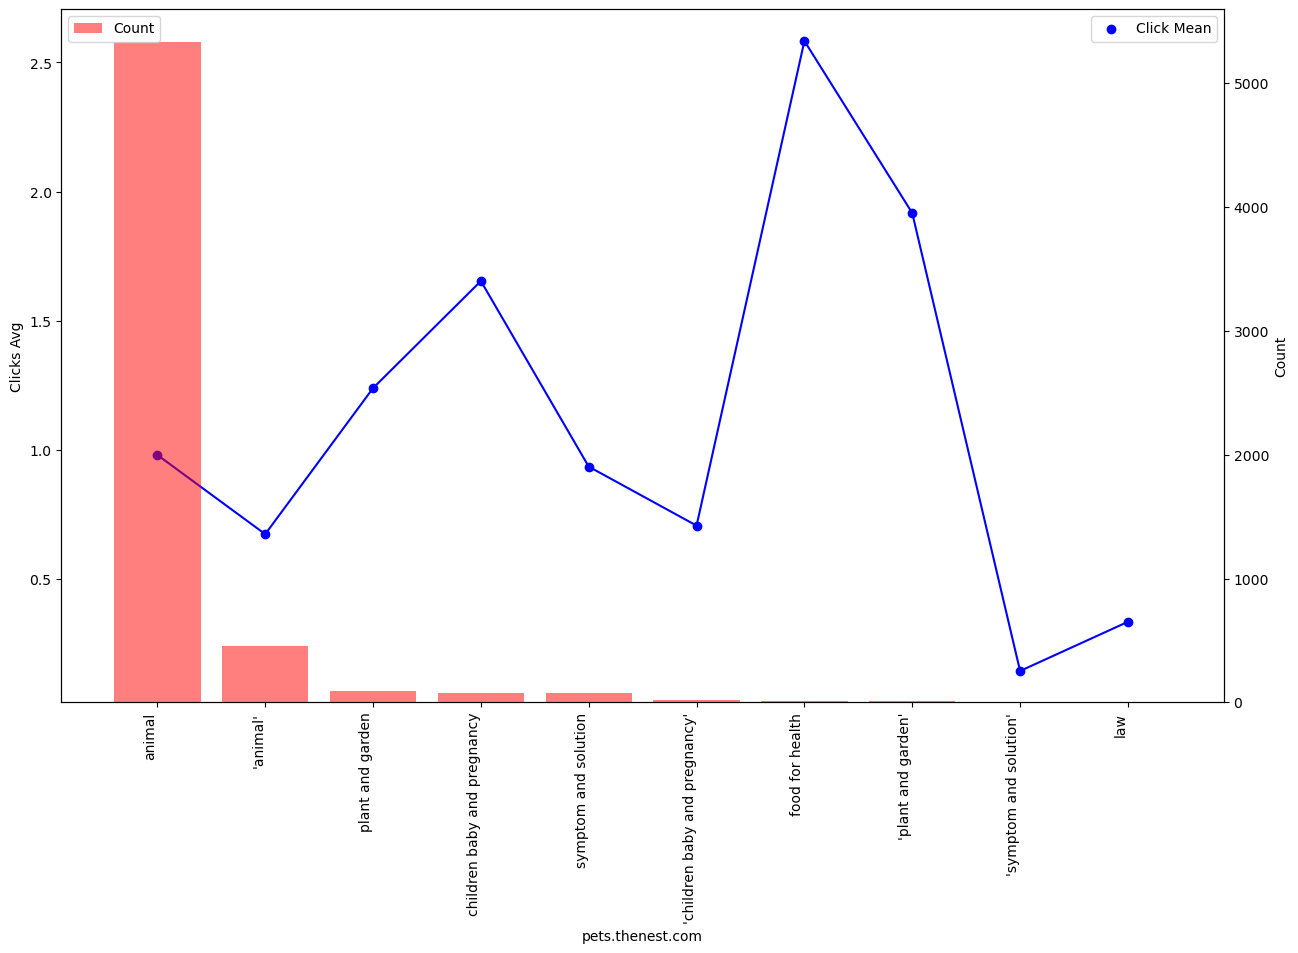

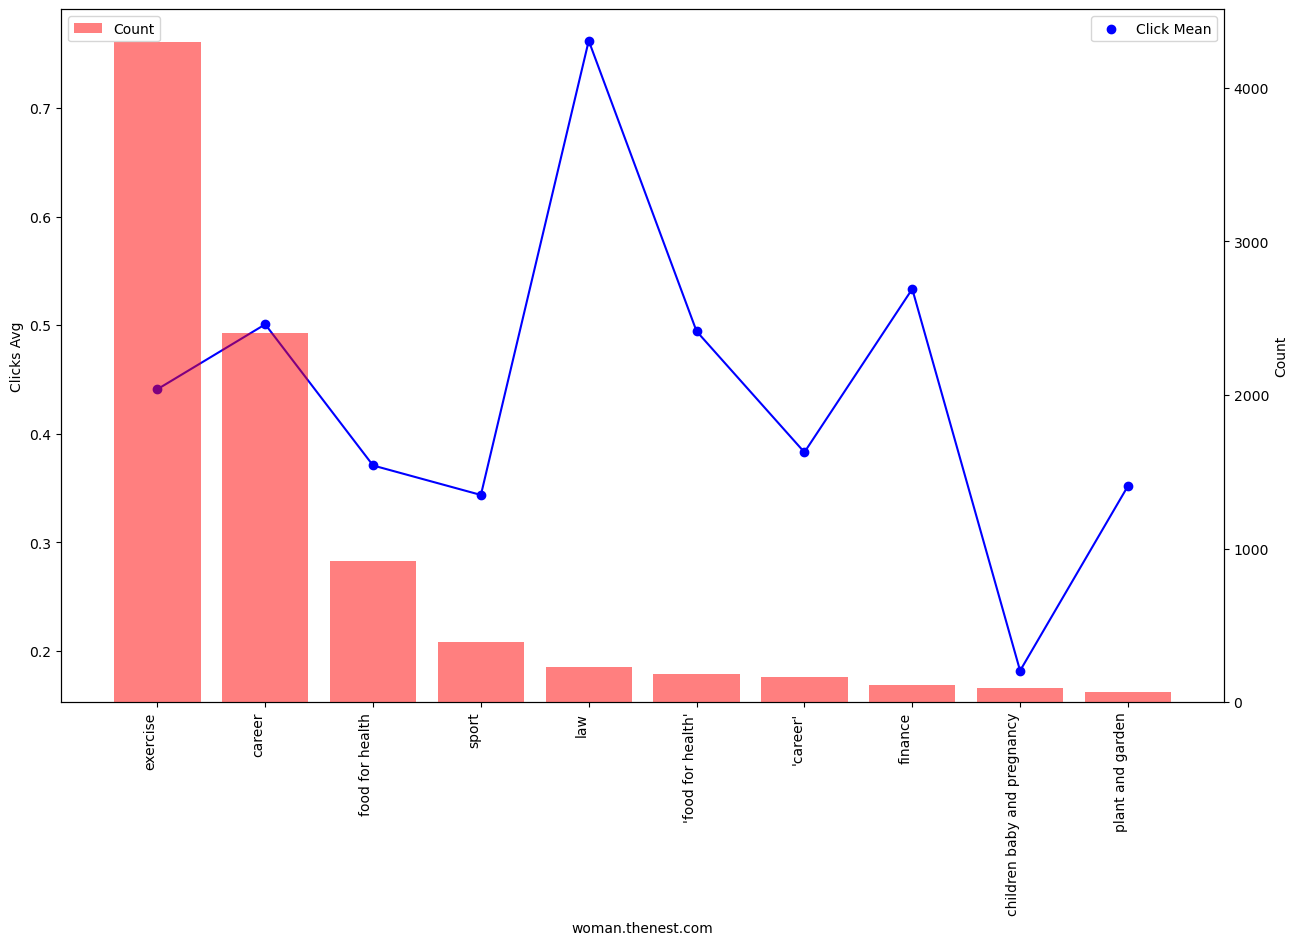

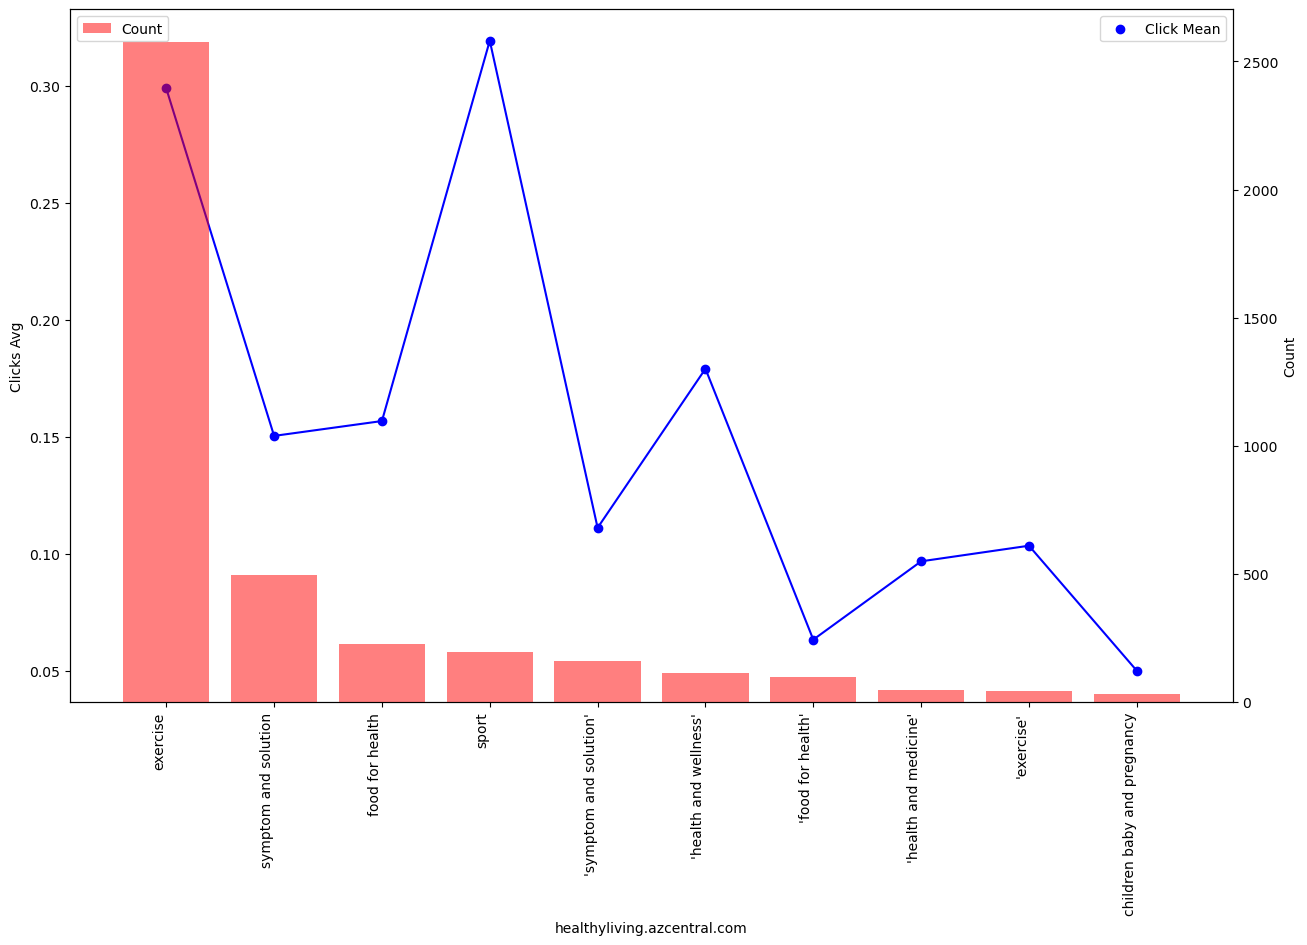

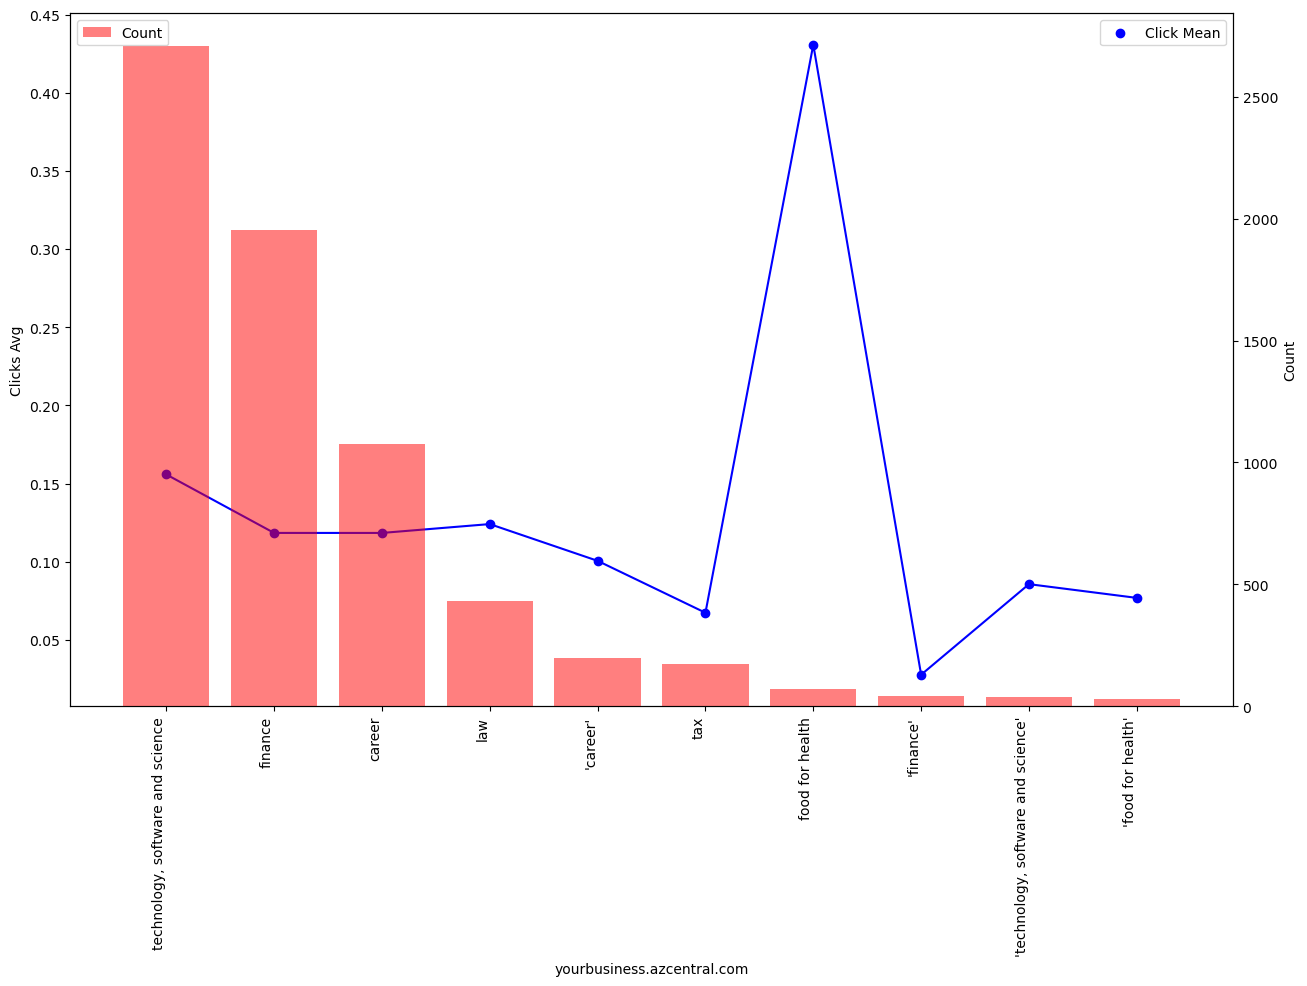

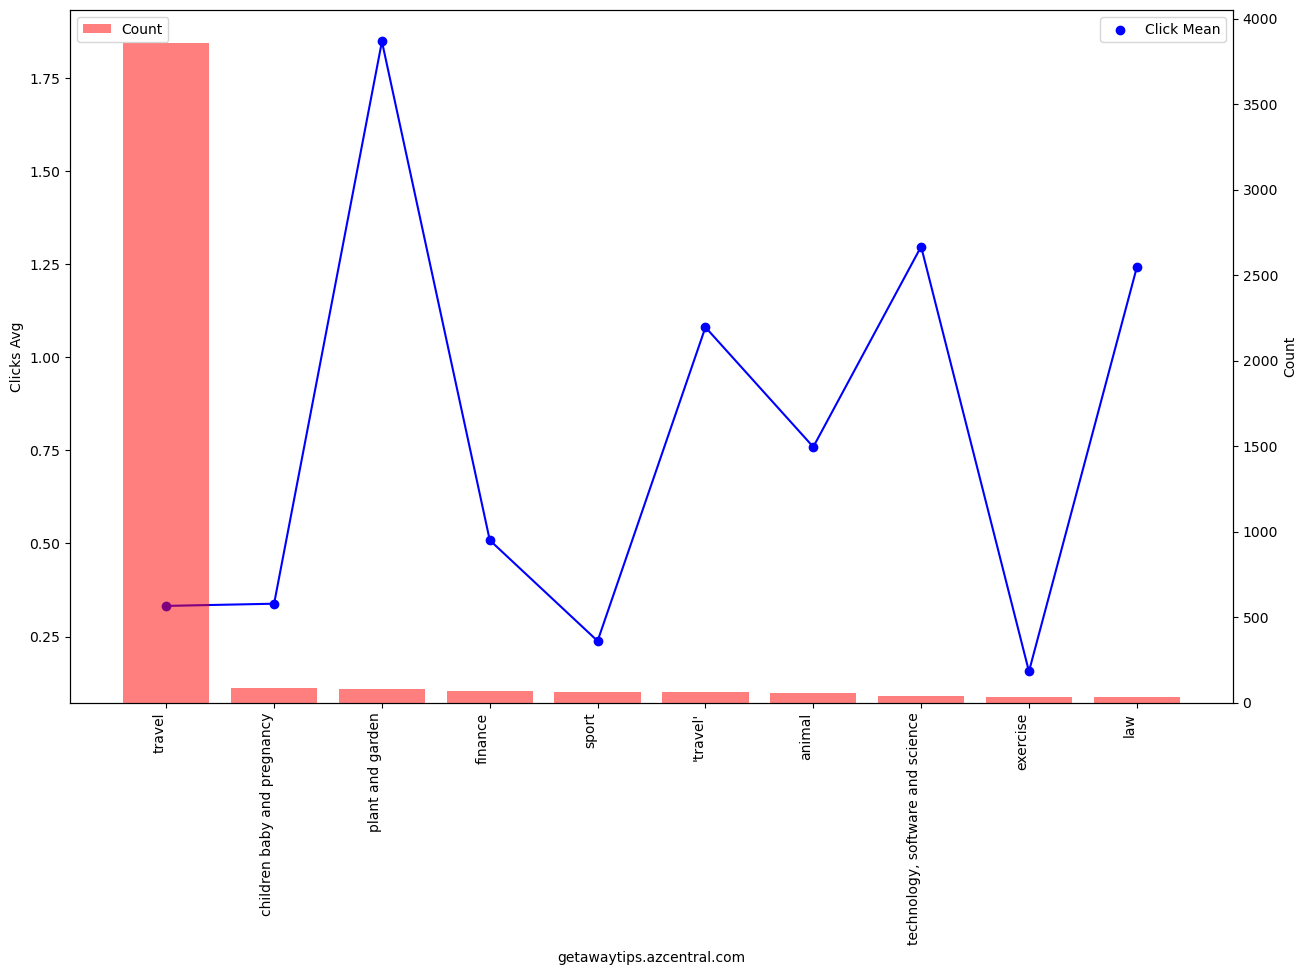

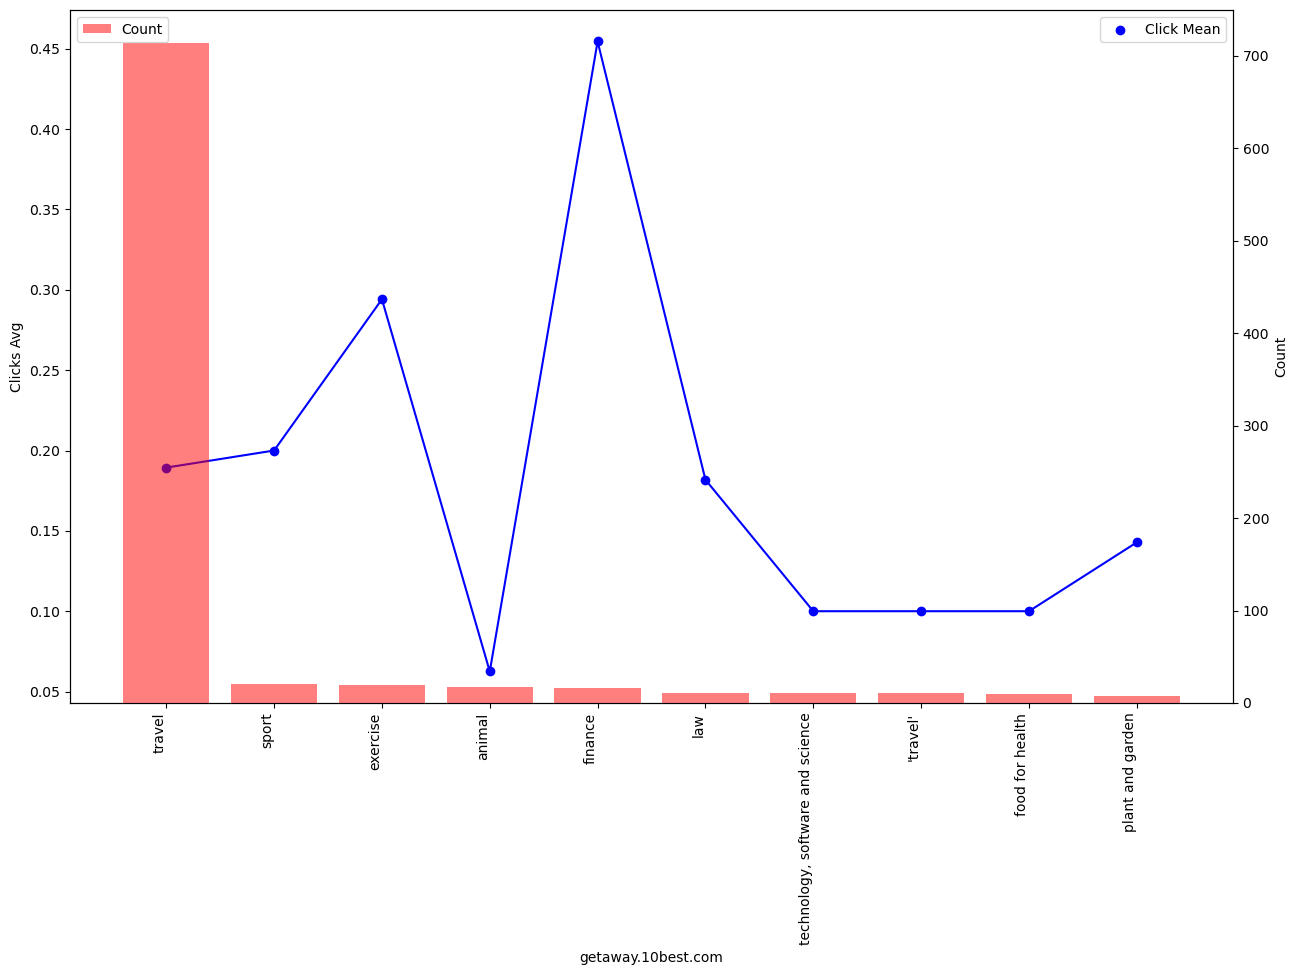

In [303]:
for domain in domain_dict:
    topic_distribution_within_domain(df,domain)

/var/folders/kl/d2c3nvkj5kxbxwd0q65sgs1r0000gp/T/ipykernel_1805/2491425948.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_domain['domain'], rotation=90, ha='right')


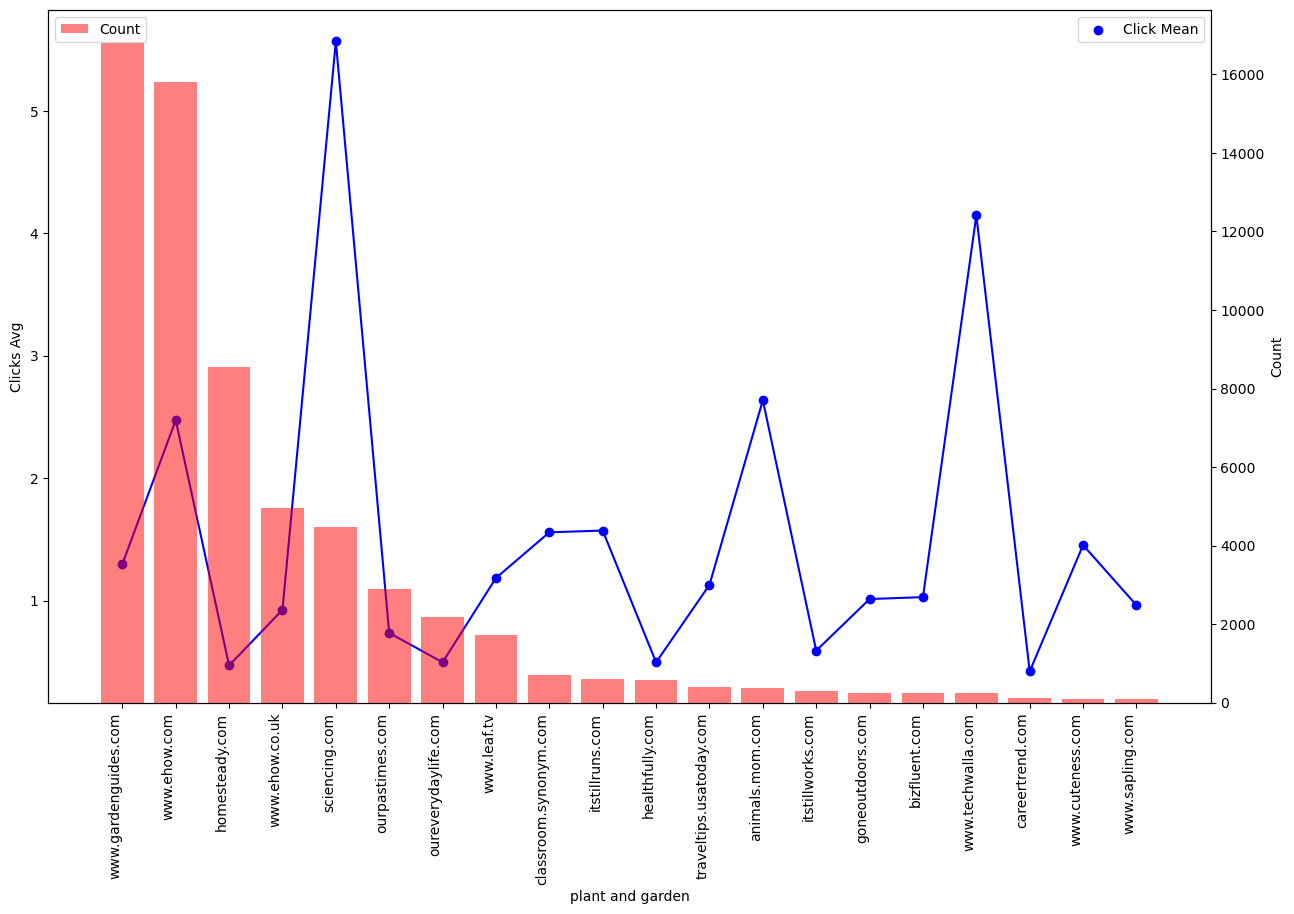

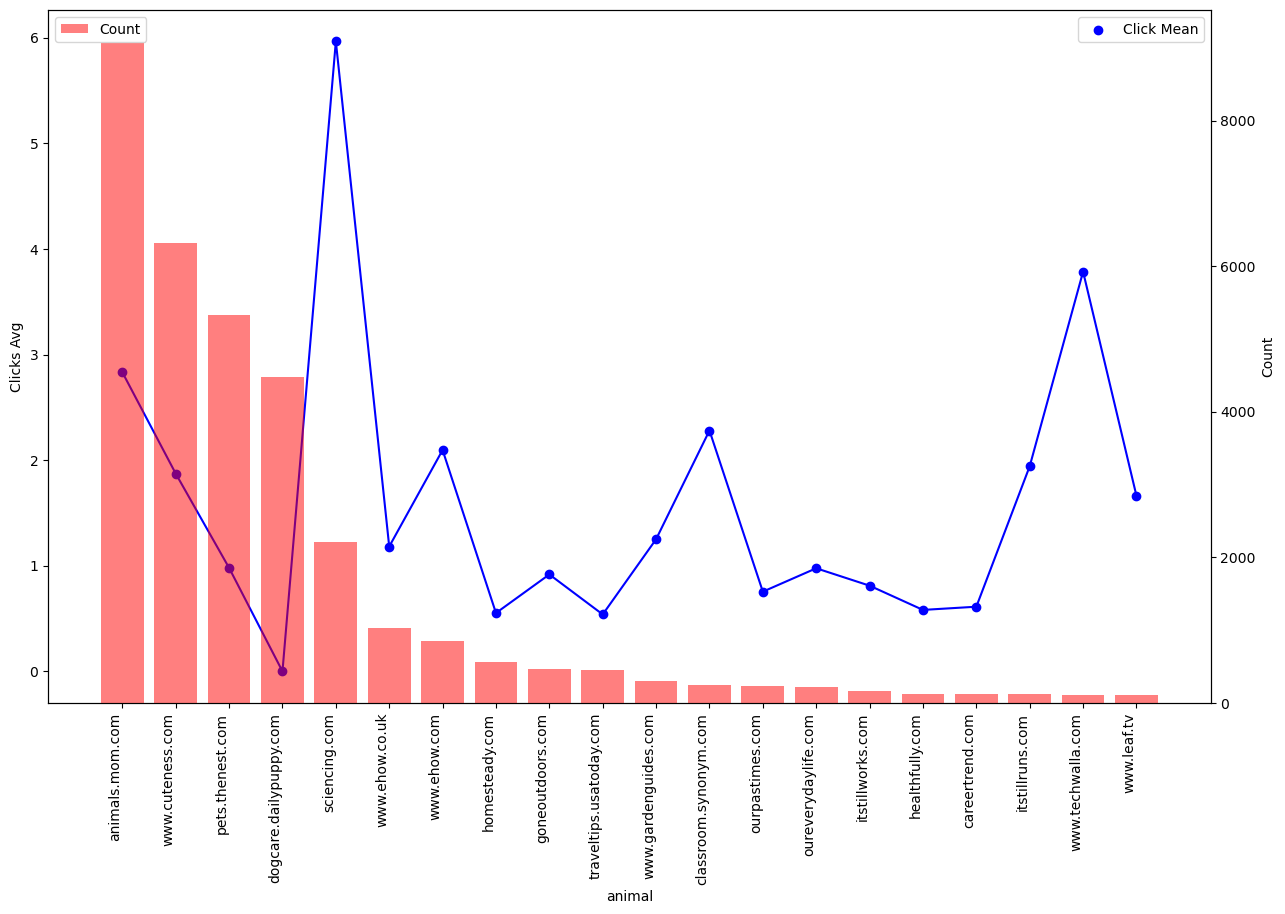

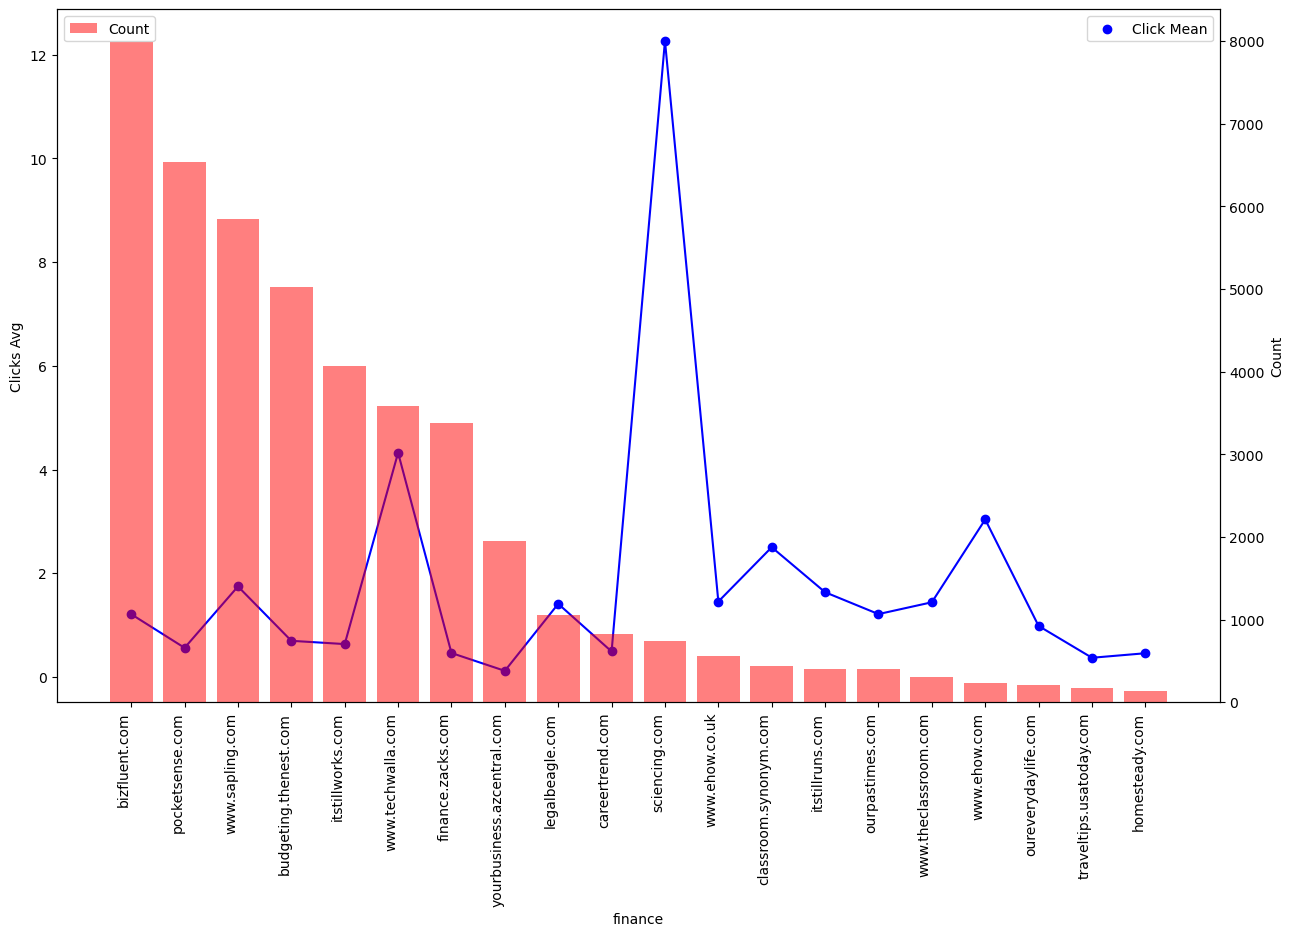

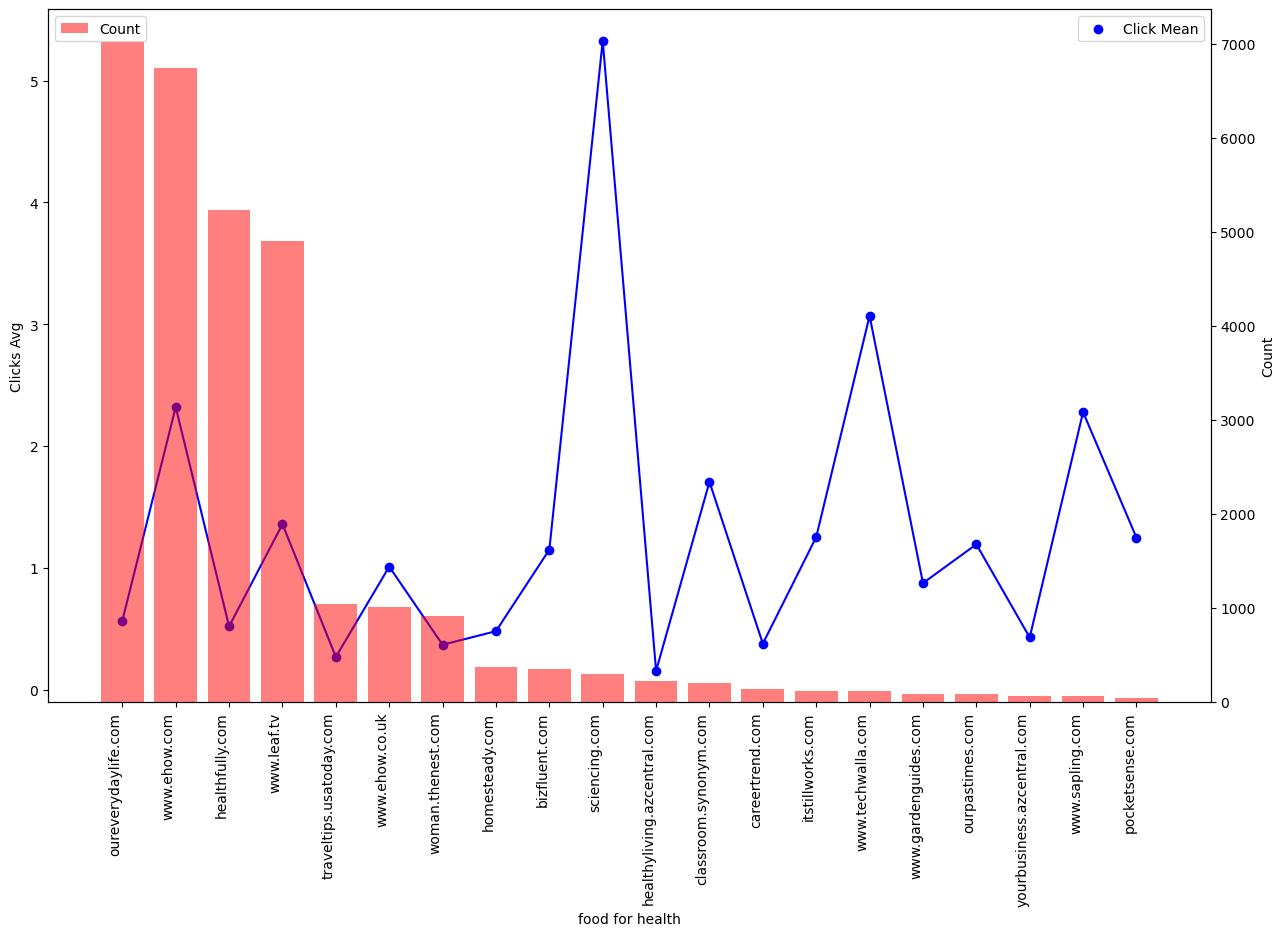

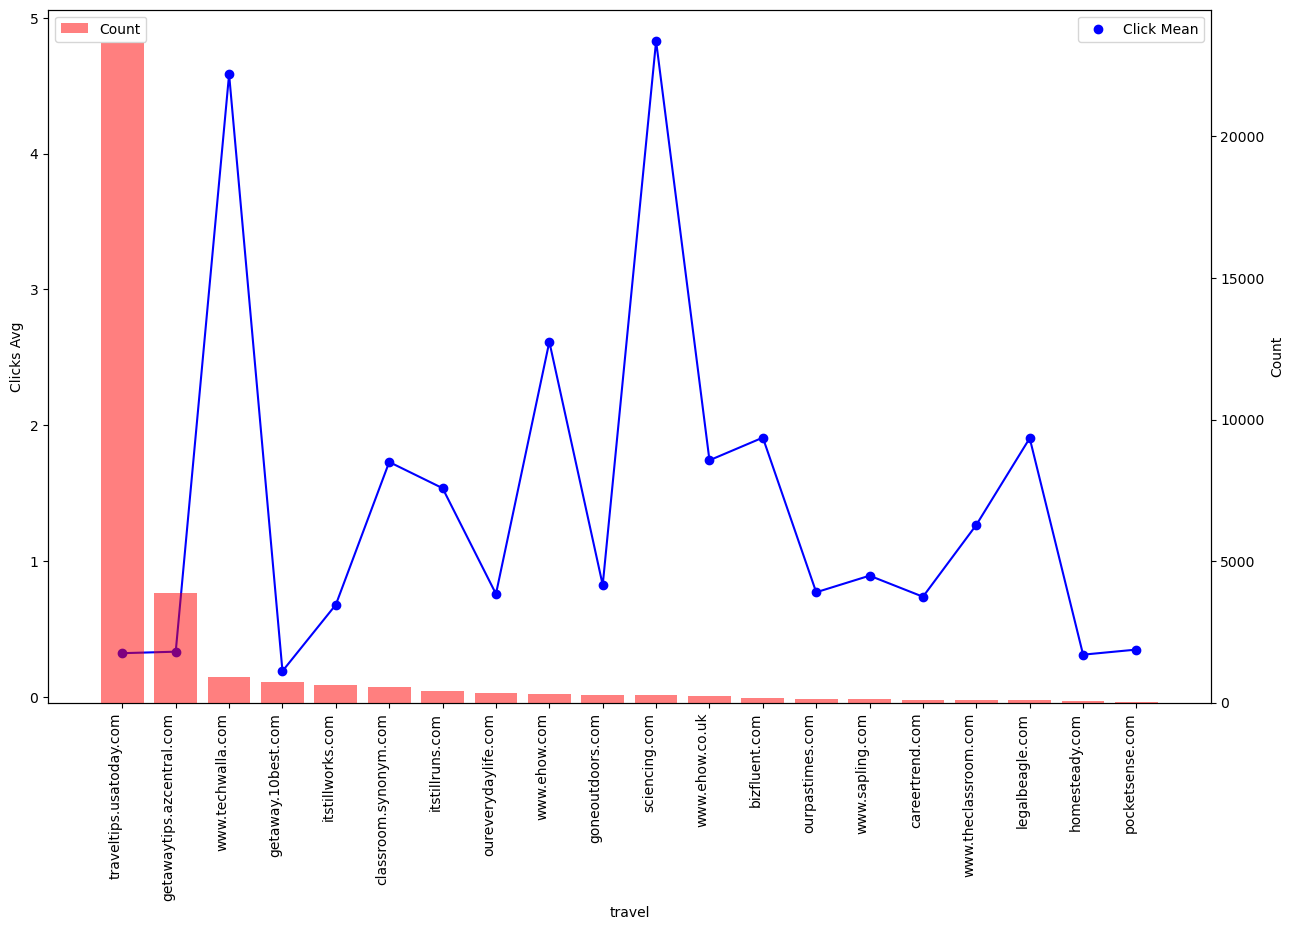

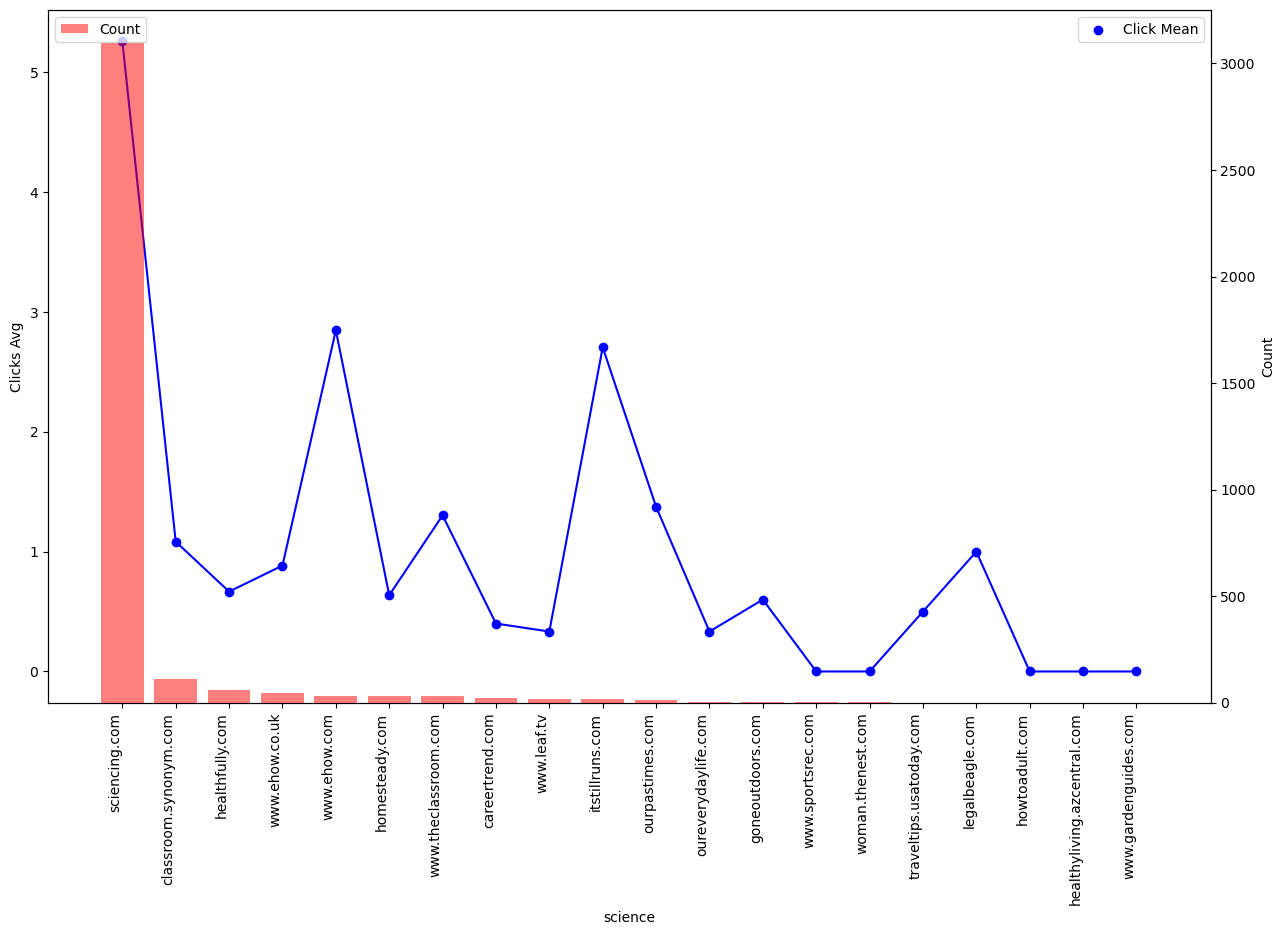

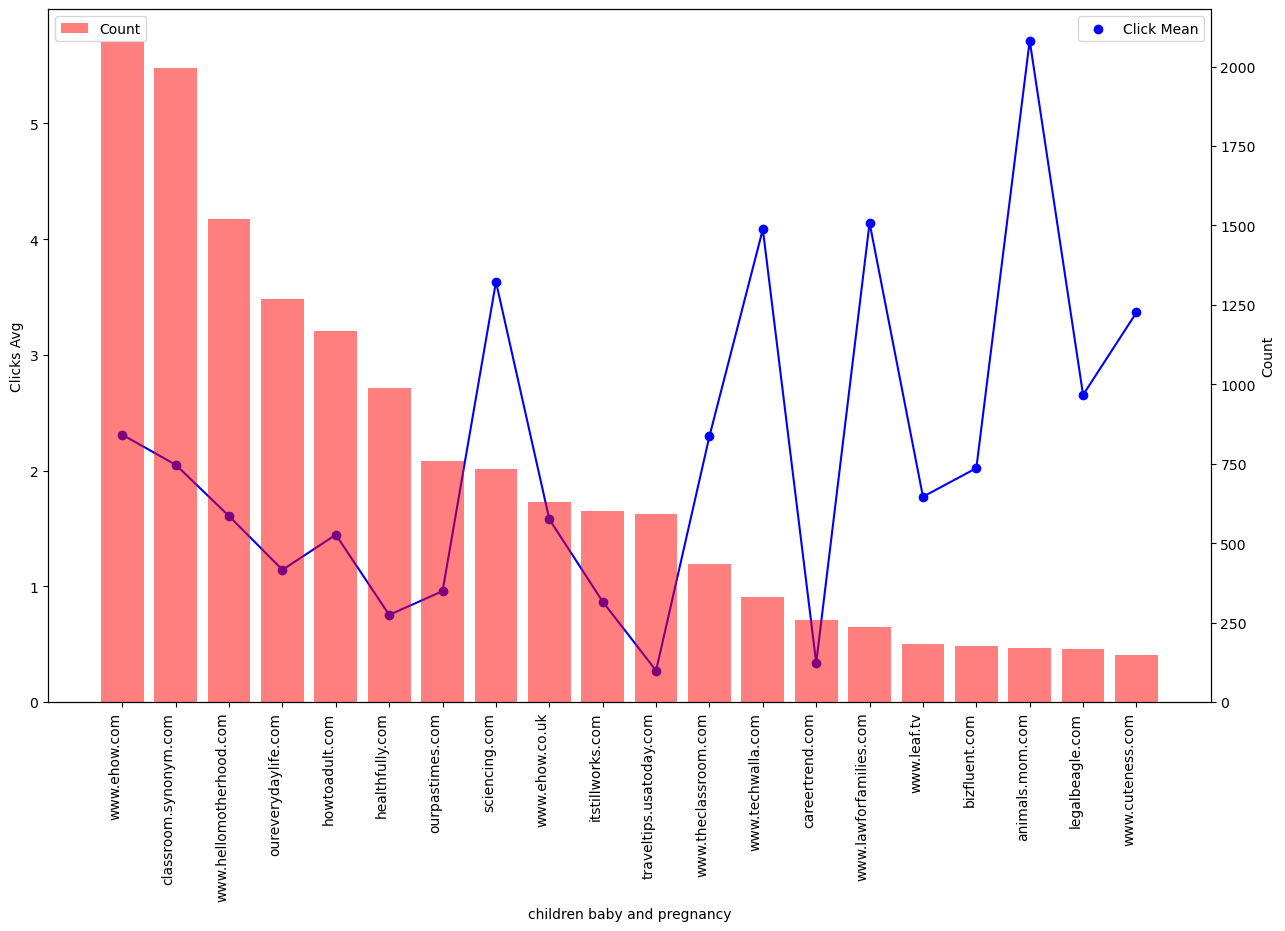

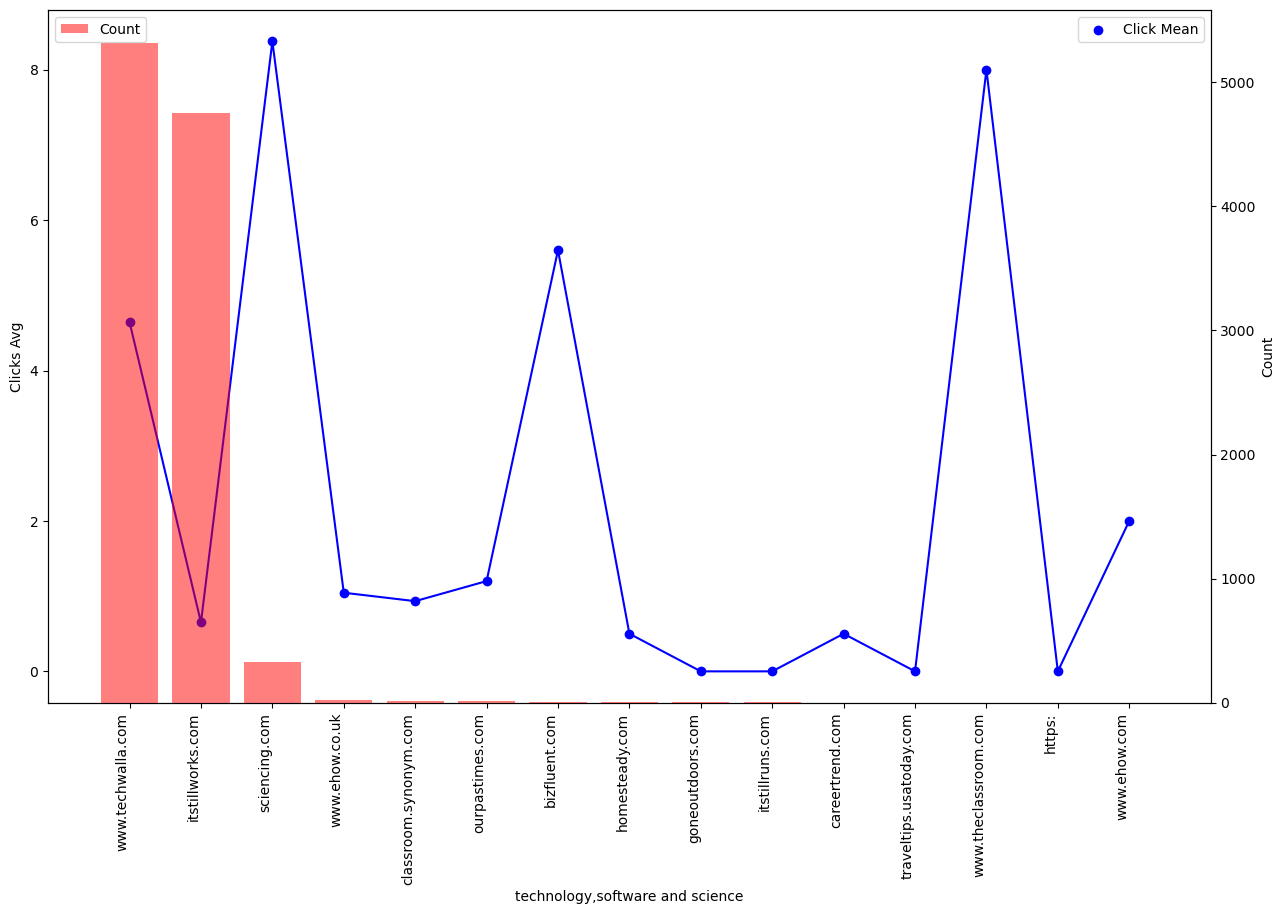

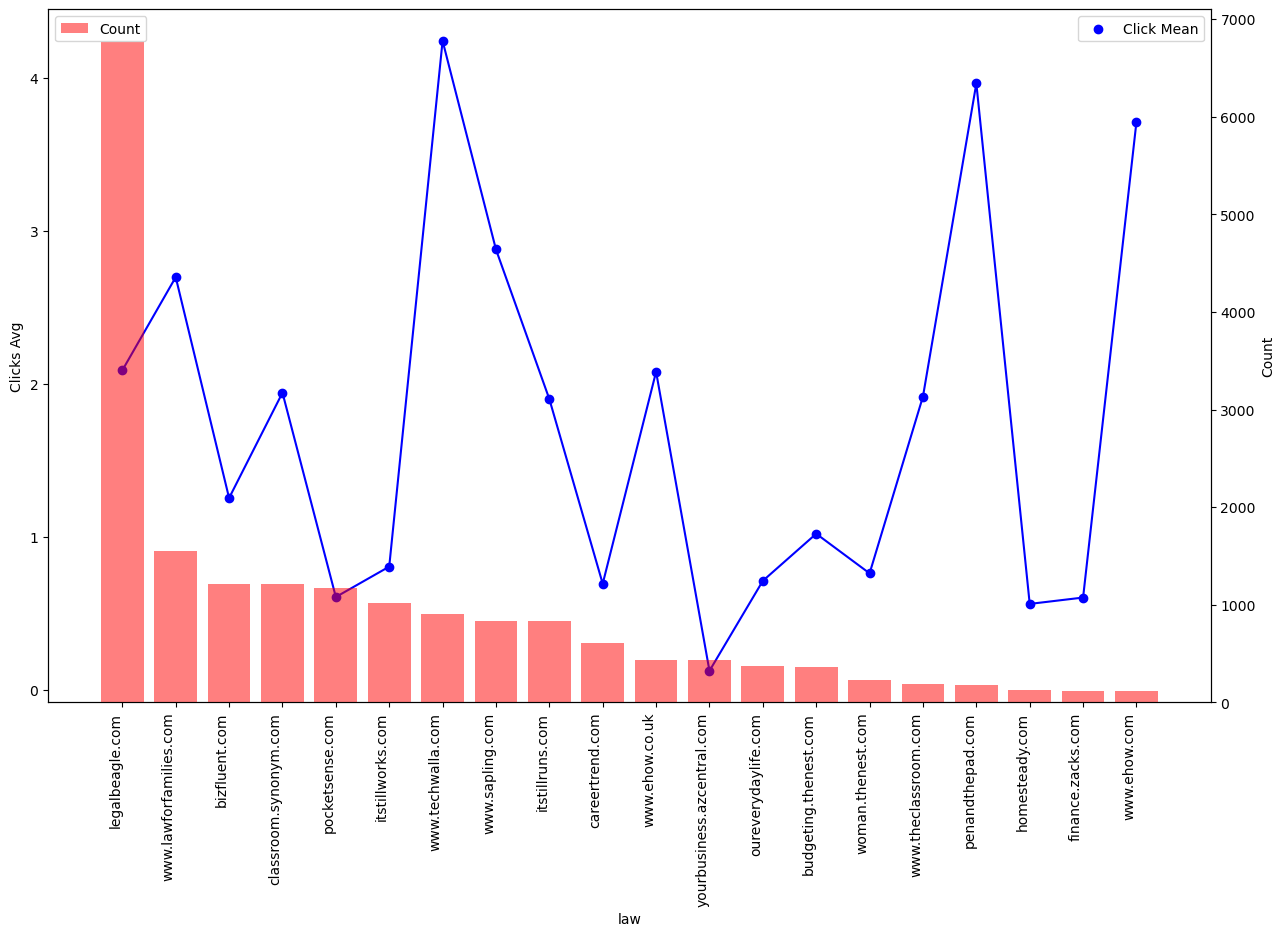

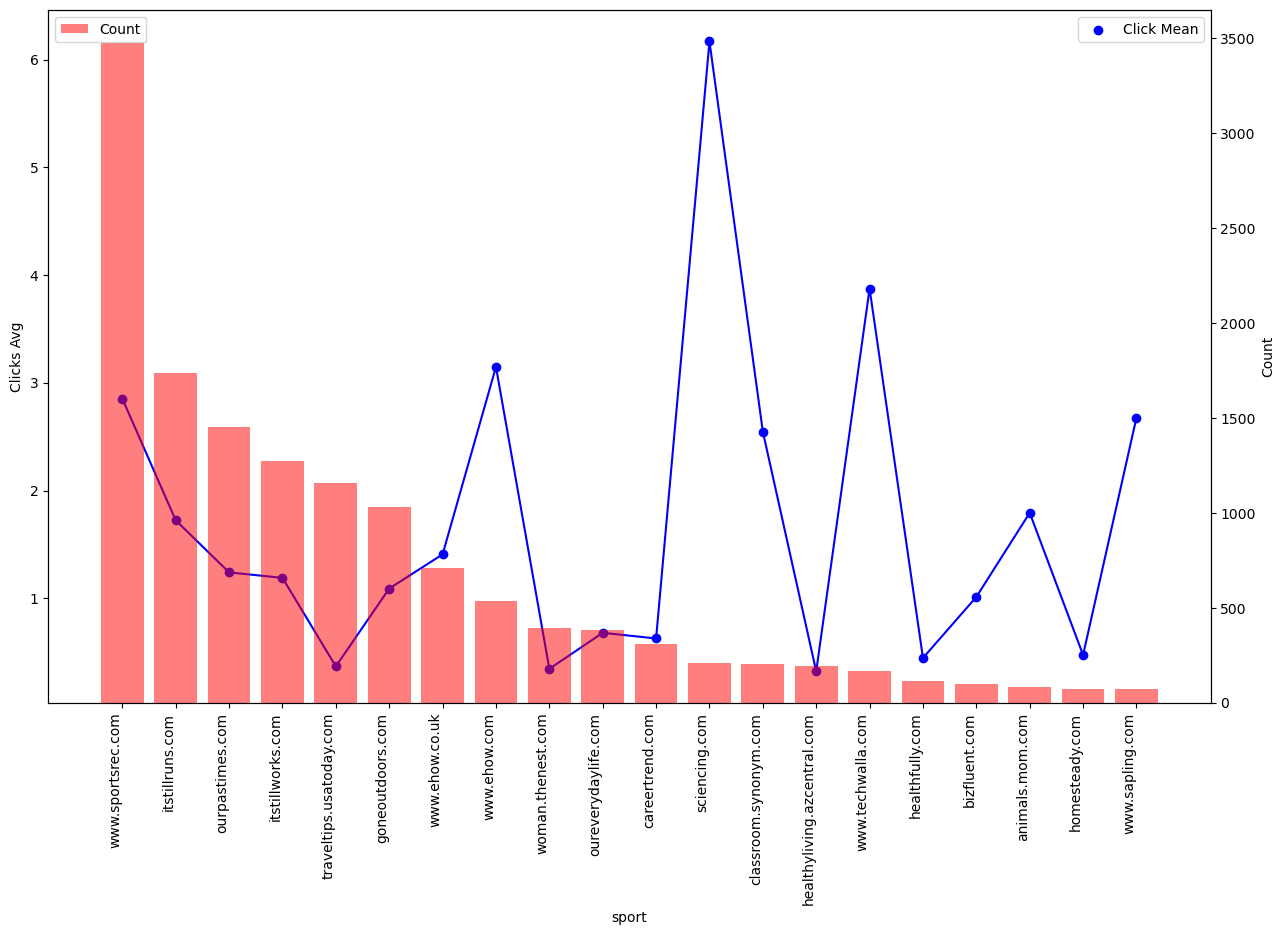

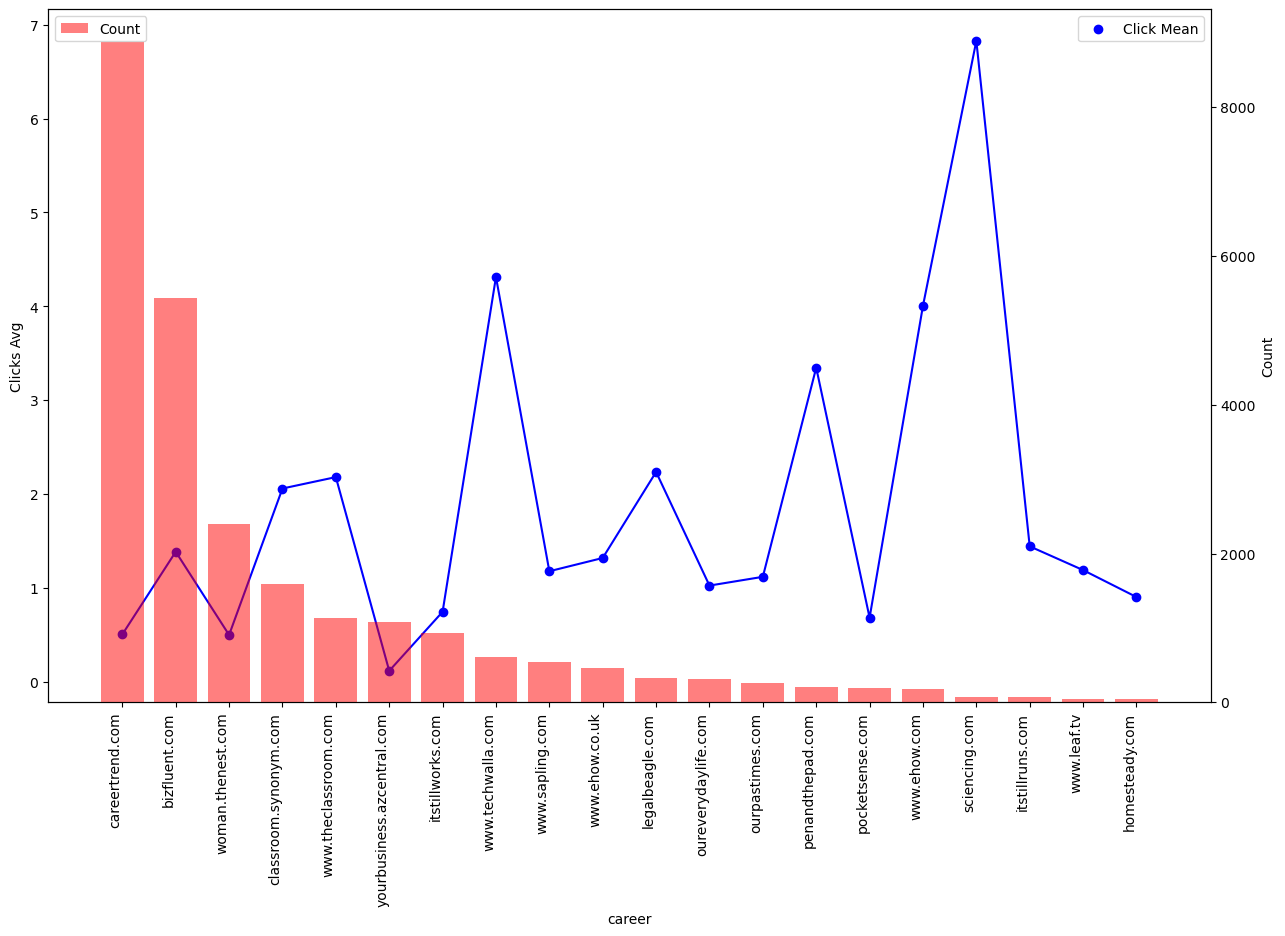

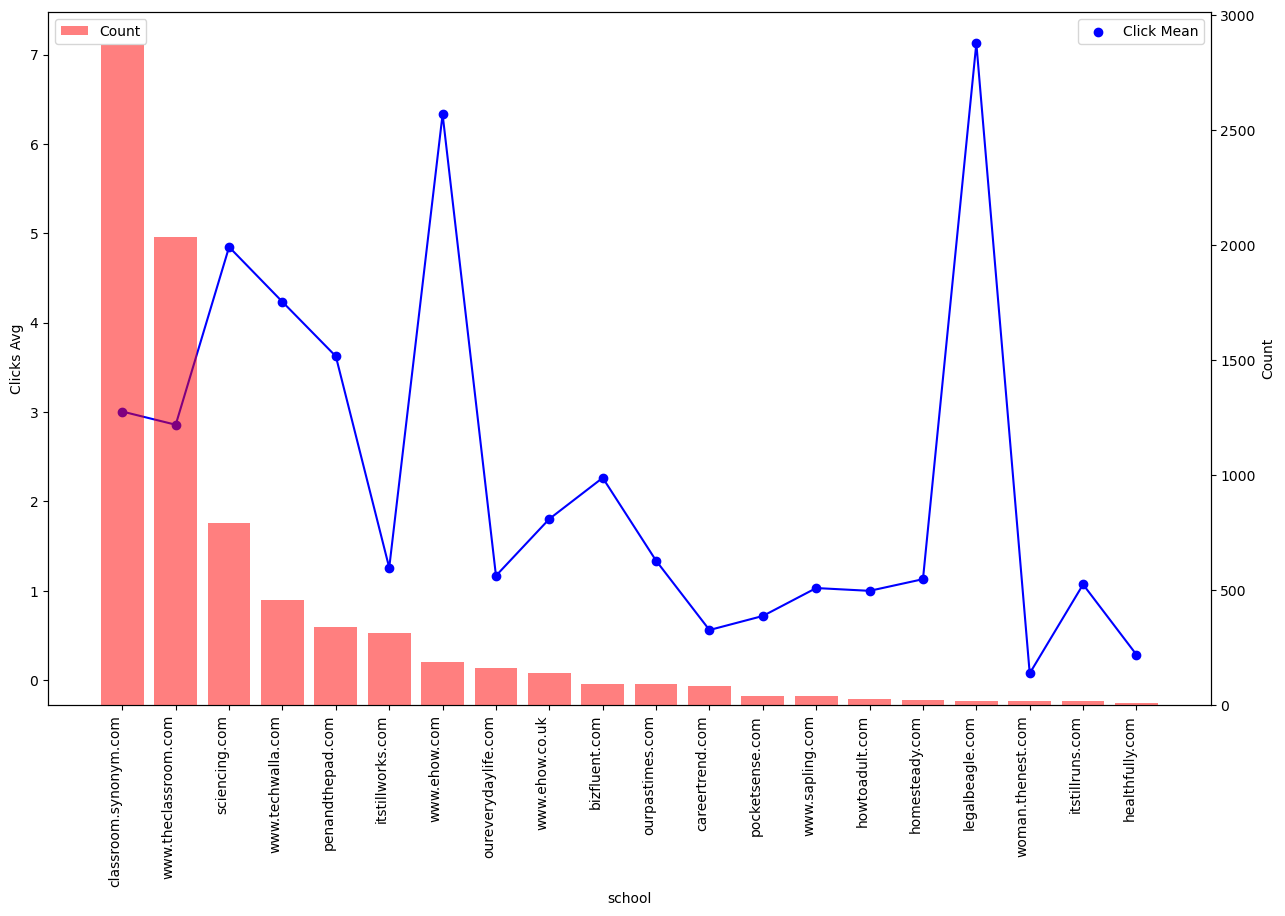

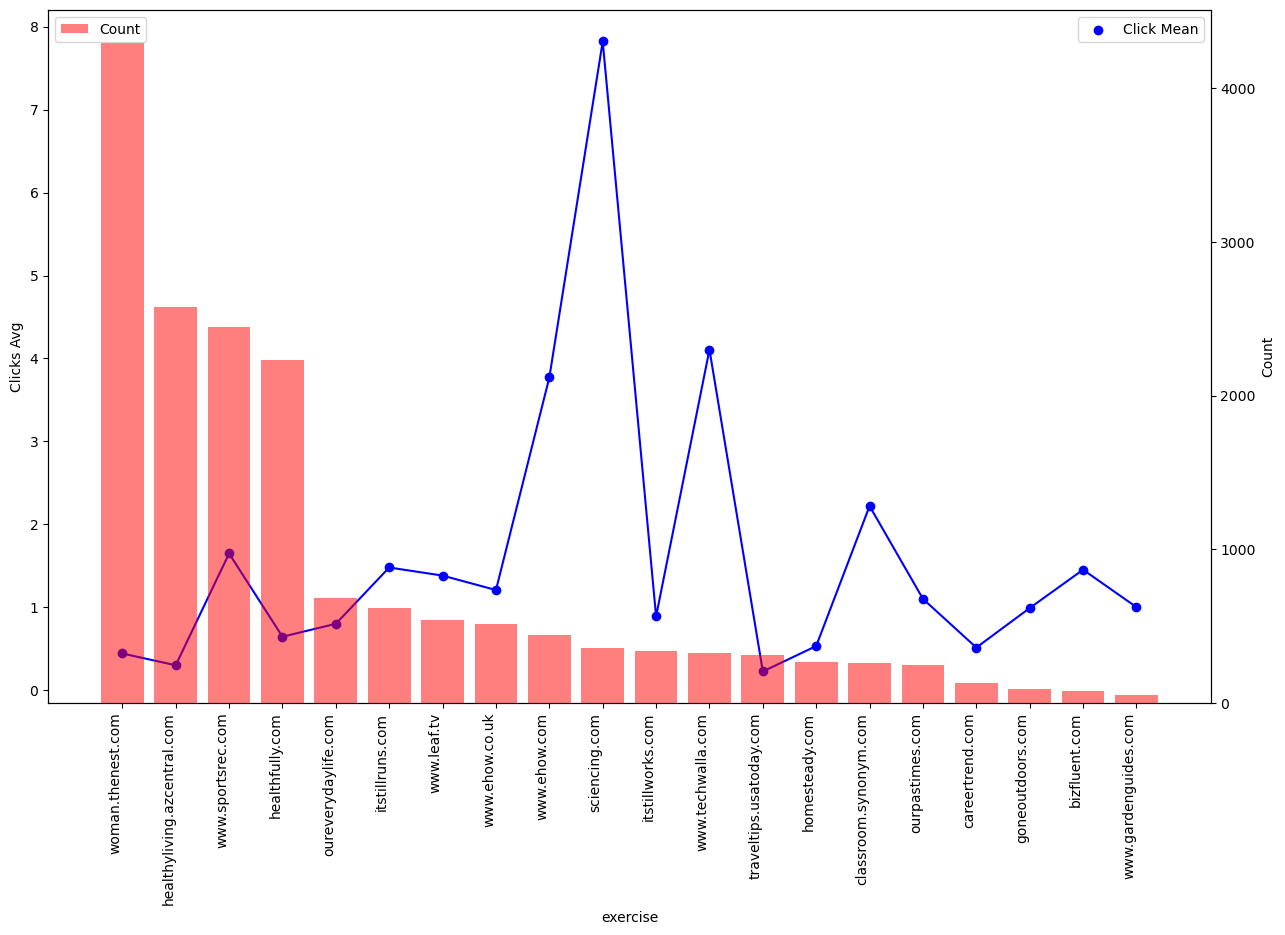

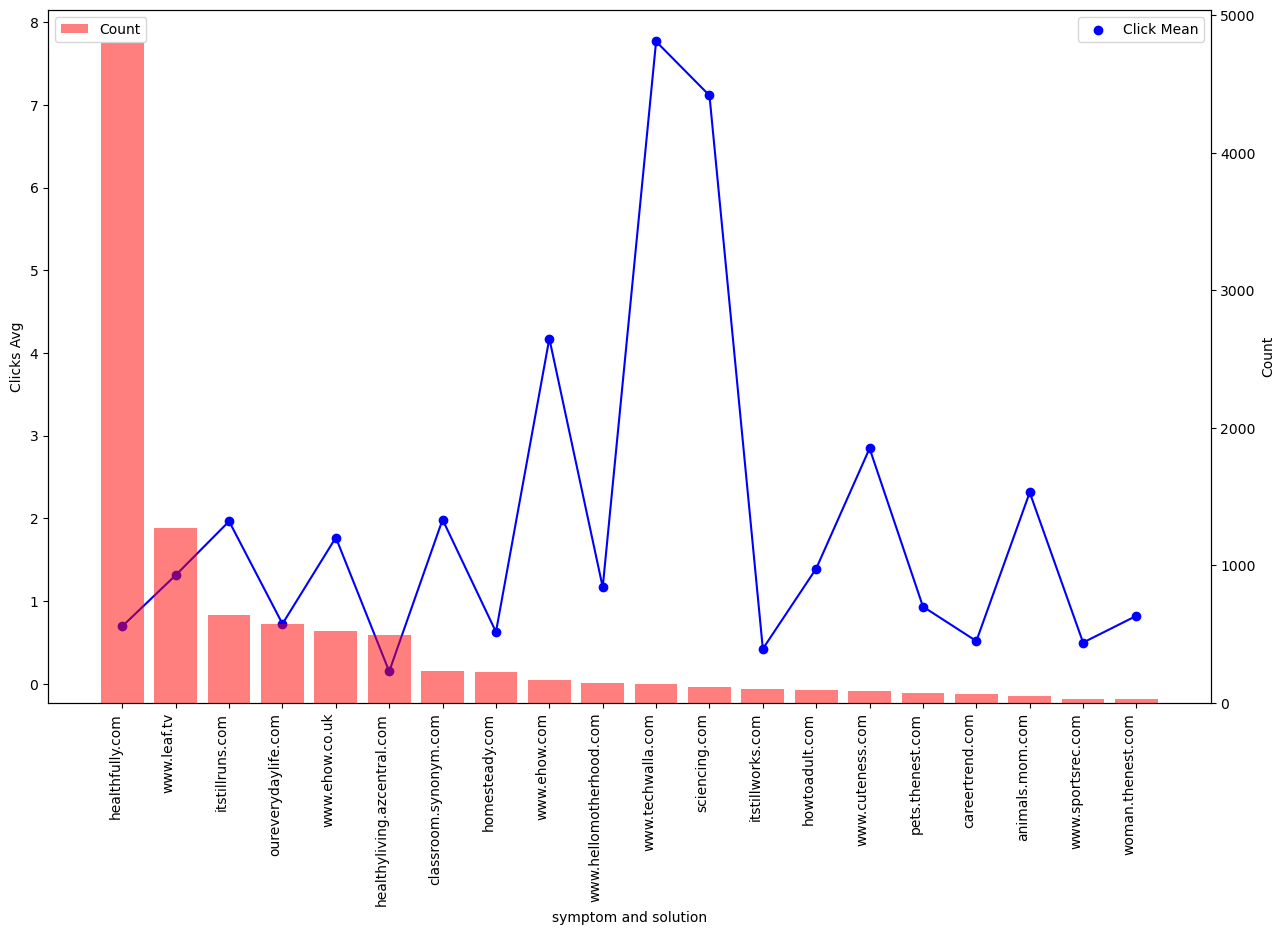

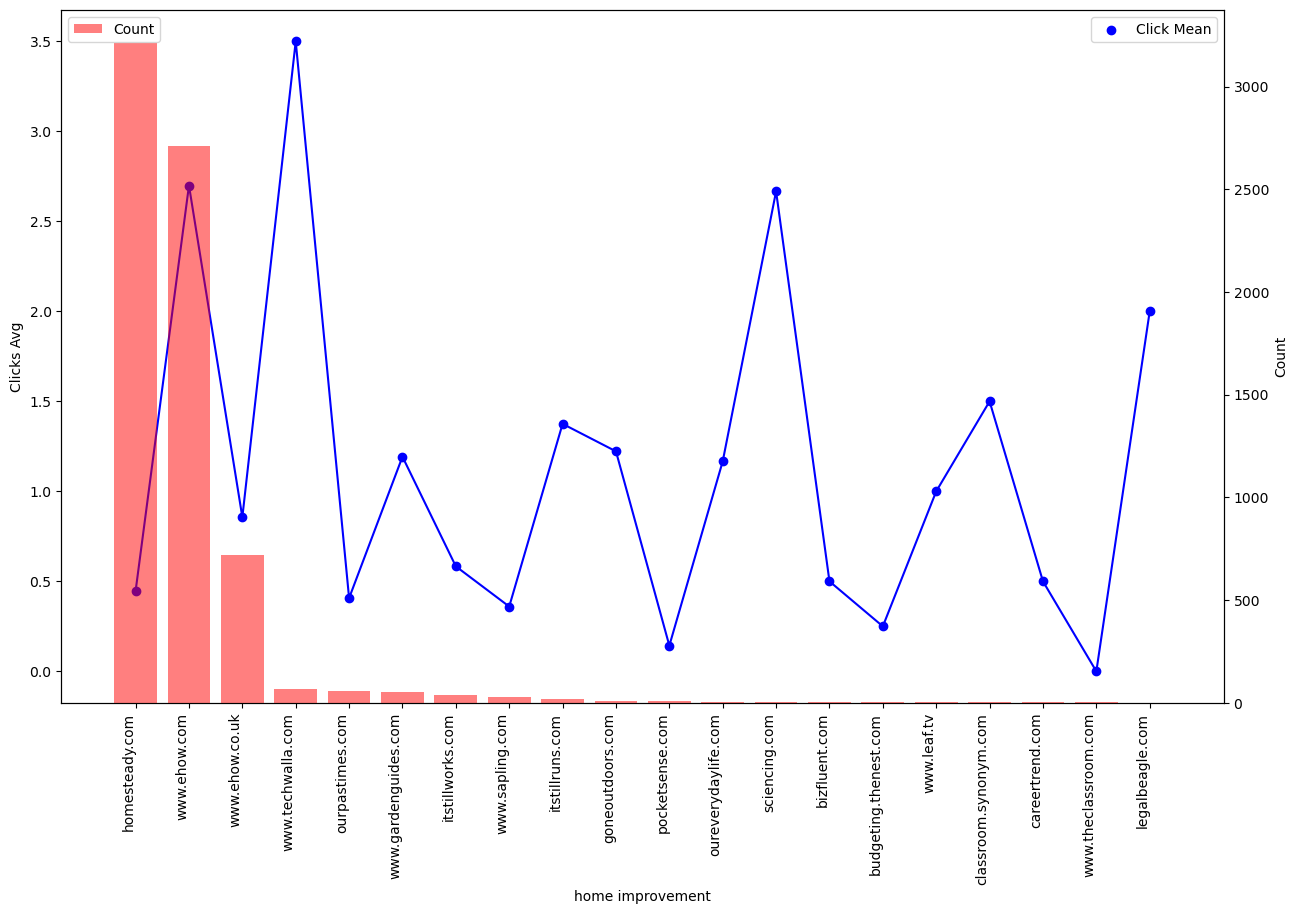

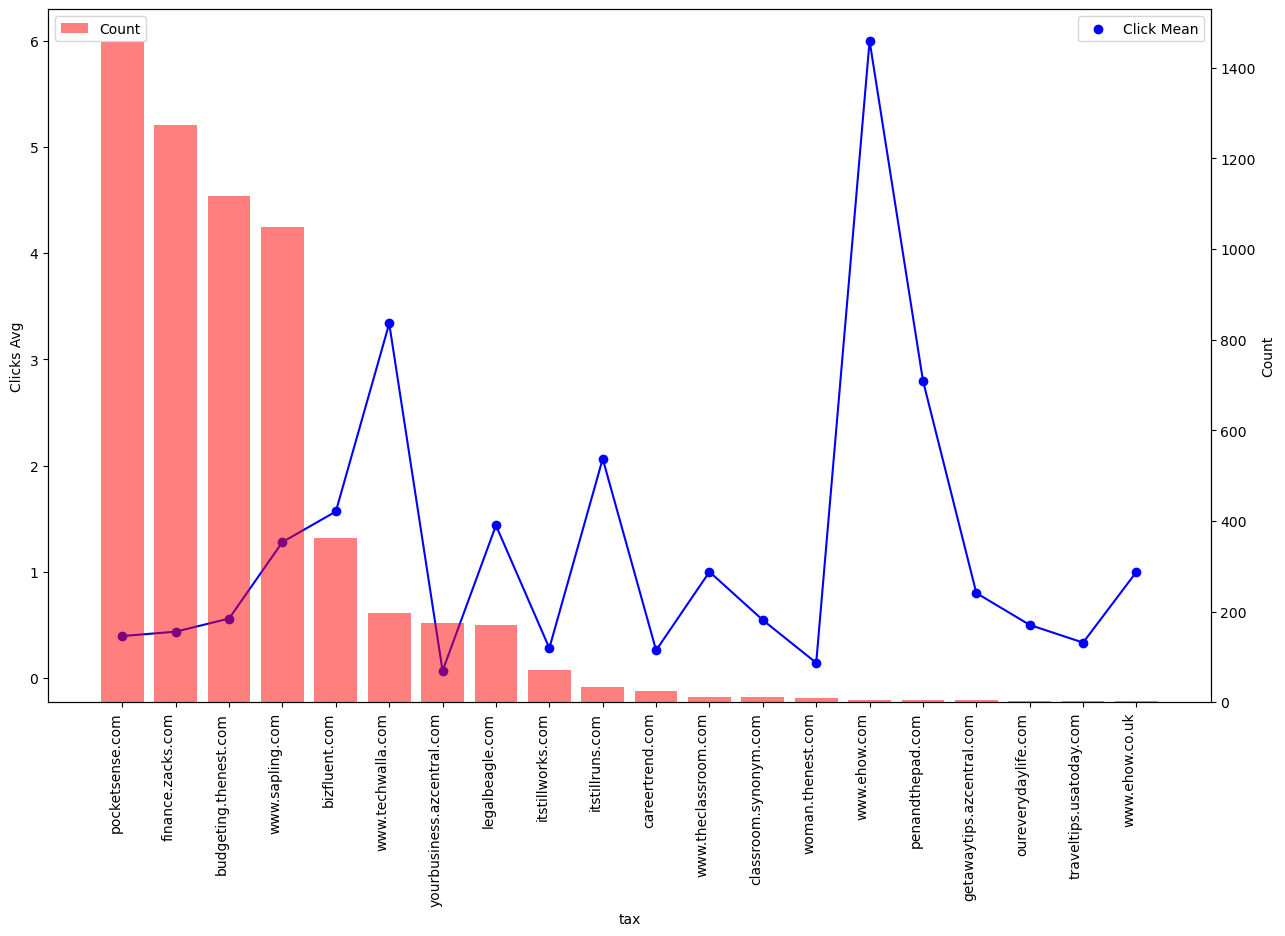

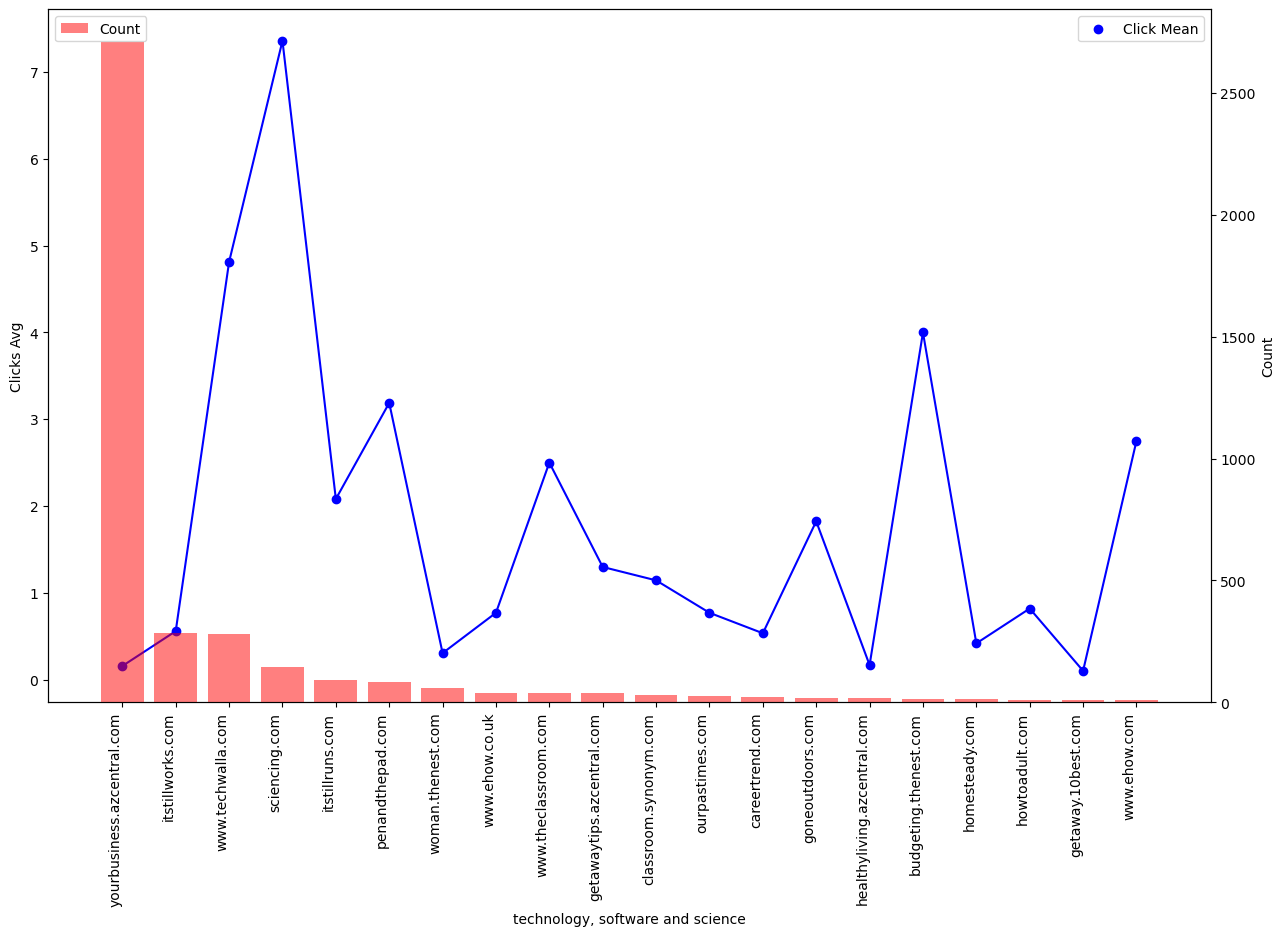

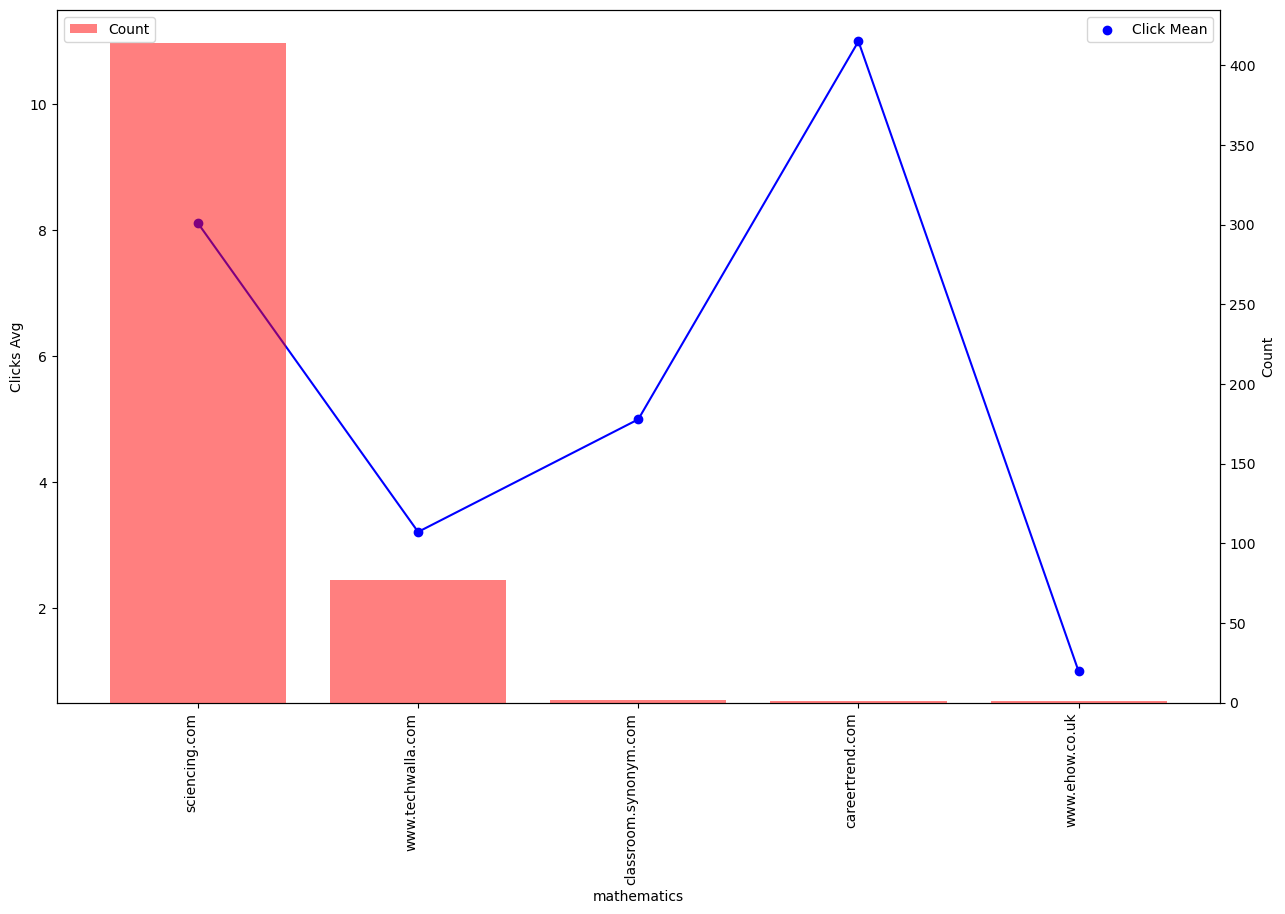

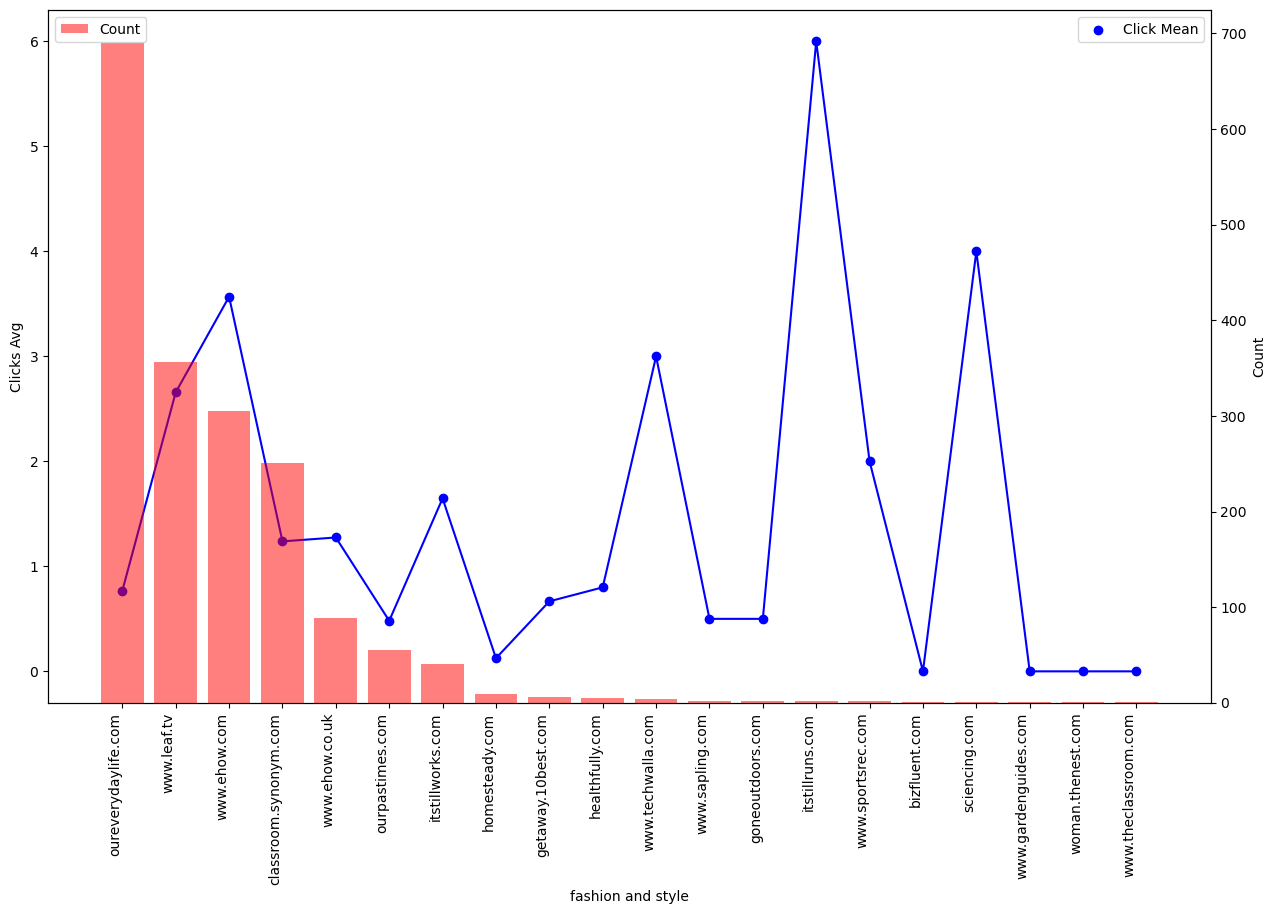

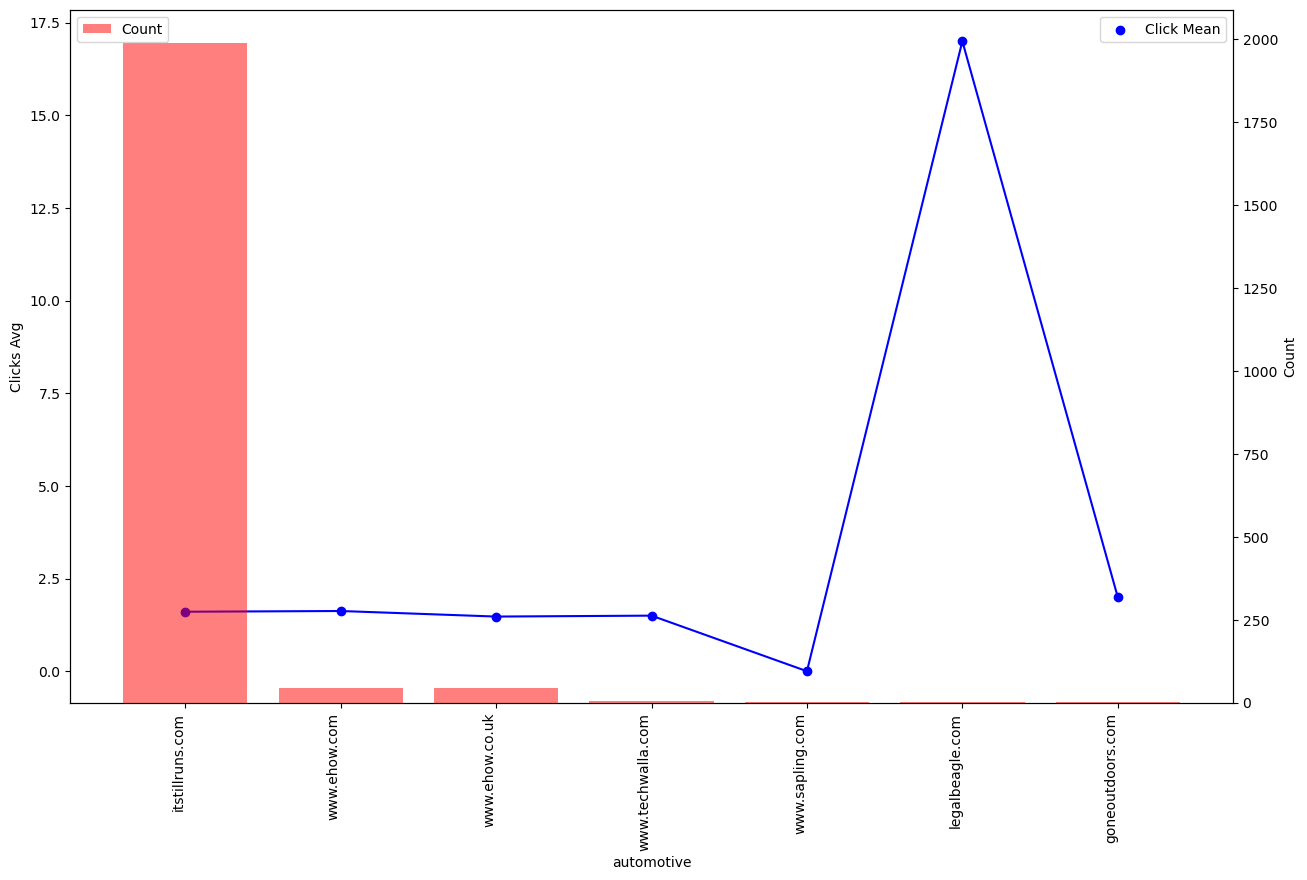

In [304]:
for topic in list(df_group_by_topic['topic'])[0:20]:
    domain_distribution_within_topic(df, topic)